# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Deep learning has applications in predictive tasks relating to unstructured data, for example, images, text, audio and video. Artificial emotional intelligence is the study and development of technologies that can read human emotions by analyzing body gestures, facial expressions, voice tone etc and can react appropriately to them. <br>
<br>
Facial expression recognition is critical in human-machine interactions. Research shows that 55% of communication is through facial expressions and other visual cues. Training a model to identify facial emotions accurately is an important step towards emotional intelligent behaviour in artificially intelligent machines.
<br>

Automatic facial expression recognition systems have applications in understanding human behavior, health care and wellbeing, creating higher quality virtual assistants for customer facing businesses.
<br>
**The objectives:** Use deep learning techniques to create a computer vision model that accurately detects facial emotions. The model should perform multi-class classification on images of facial expressions, classifying the expressions according to the associated emotion. <br>
**The key questions:** <br>
1. Can I build a deep learning model to classify human emotions?<br>
2. What data will be consumed by the model?<br>
3. What model architectures will be explored?<br>
4. What performance metrics will be used to gauge model effectiveness?<br>
5. What are the resource costs (time + compute) needed for the model?<br>
6. What are the potential risks (misclassification)?<br>
7. What is the recommendation?<br>
**The problem formulation:** Build an efficient deep learning model to accurately detect human emotions from images of people's faces. The model should perform multi-class classification.



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Importing the Libraries**

In [1]:
#Import required libraries
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
from PIL import Image
from collections import Counter
import hashlib
import json

#Import Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import (
    Dense, Input, Dropout, GlobalAveragePooling2D, LeakyReLU,
    Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D)
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.models import load_model
from tensorflow.keras.activations import swish
from tensorflow.keras import regularizers

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Store the path of the data file from Google Drive
path = '/content/drive/MyDrive/MachineLearningCourse/CapstoneProject/Facial_emotion_images.zip'

#The data is stored as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
  zip_ref.extractall()

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [4]:
#Loop through images in the training, and check image size
train_folder_path = "Facial_emotion_images/train/surprise"
val_folder_path = "Facial_emotion_images/validation/surprise"
test_folder_path = "Facial_emotion_images/test/surprise"

def determineImagePath(path):
  image_count = 0

  for file_name in os.listdir(path):
    image_path = os.path.join(path,file_name)
    with Image.open(image_path) as img:
      width, height = img.size
      num_pixels = width * height
      print(f"{file_name} at path {path} has size:{width}x{height}, Total pixels: {num_pixels}")

      #Increment the counter
      image_count+=1

      if image_count >= 5:
        break

determineImagePath(train_folder_path)
print()
determineImagePath(val_folder_path)
print()
determineImagePath(test_folder_path)

picture_size = 48

621.jpg at path Facial_emotion_images/train/surprise has size:48x48, Total pixels: 2304
8979.jpg at path Facial_emotion_images/train/surprise has size:48x48, Total pixels: 2304
19231.jpg at path Facial_emotion_images/train/surprise has size:48x48, Total pixels: 2304
19322.jpg at path Facial_emotion_images/train/surprise has size:48x48, Total pixels: 2304
24688.jpg at path Facial_emotion_images/train/surprise has size:48x48, Total pixels: 2304

21154.jpg at path Facial_emotion_images/validation/surprise has size:48x48, Total pixels: 2304
26102.jpg at path Facial_emotion_images/validation/surprise has size:48x48, Total pixels: 2304
20594.jpg at path Facial_emotion_images/validation/surprise has size:48x48, Total pixels: 2304
17027.jpg at path Facial_emotion_images/validation/surprise has size:48x48, Total pixels: 2304
7874.jpg at path Facial_emotion_images/validation/surprise has size:48x48, Total pixels: 2304

88.jpg at path Facial_emotion_images/test/surprise has size:48x48, Total pixe

####Observation:
Train, validation, and test images are 48 x 48 pixels and are stored in jpg format

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

In [5]:
def visualizeFaces(theemotion, folder_path):

  plt.figure(figsize = (12,12))

  for i in range(1,10,1):
    plt.subplot(3,3,i)
    img = load_img(folder_path + theemotion + "/" +
                  os.listdir(folder_path + theemotion)[i], target_size = (picture_size,picture_size))

    plt.imshow(img)

  plt.show()

### **Happy**

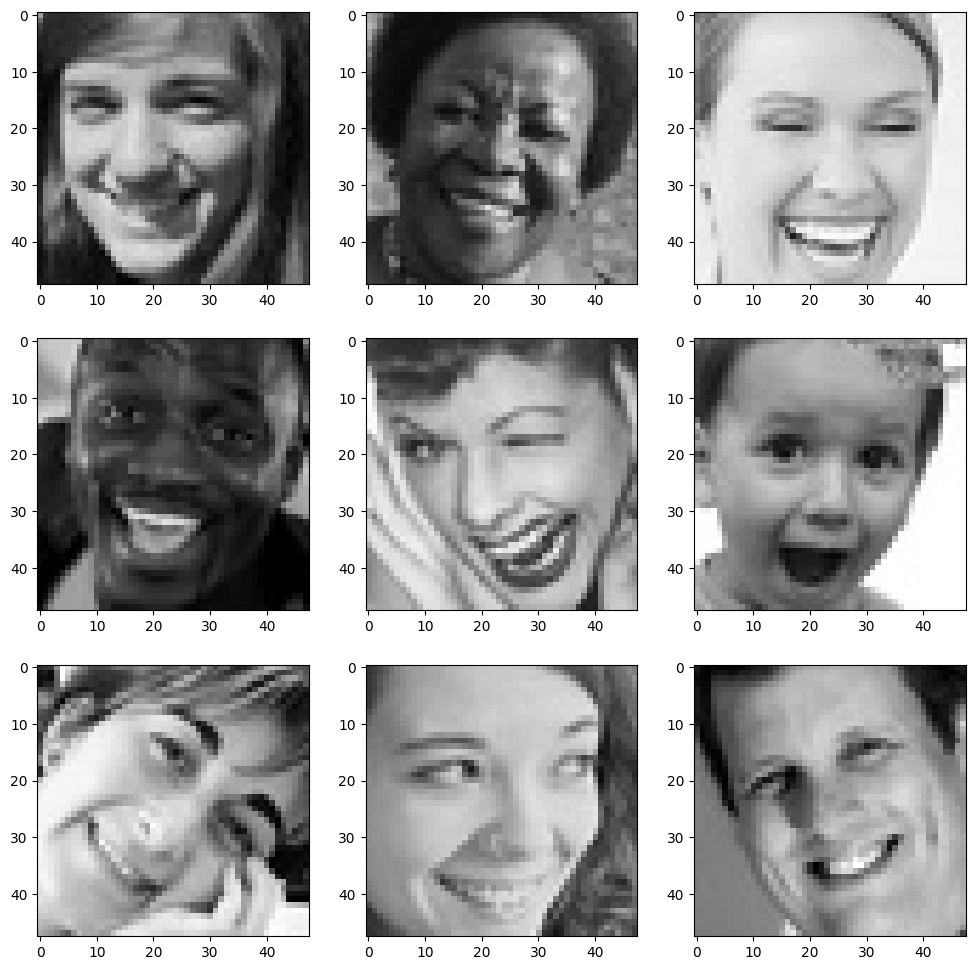

In [6]:
# Visualizing happy faces
train_folder_path = "Facial_emotion_images/train/"
emotion = 'happy'
visualizeFaces(emotion, train_folder_path)

**Observations and Insights:__**

1. The images are pictures of people smiling that are cropped to focus on the face
2. Happy faces often show the person's teeth
3. Happy faces show a triangle shape from the nose to the mouth as the mouth stretches into a smile
4. Eye brows can often be curved as a person smiles
6. Eyes can become narrow as a person smiles
7. In some of the images, the head is slightly tilted and this will help with data augmentation




### **Sad**

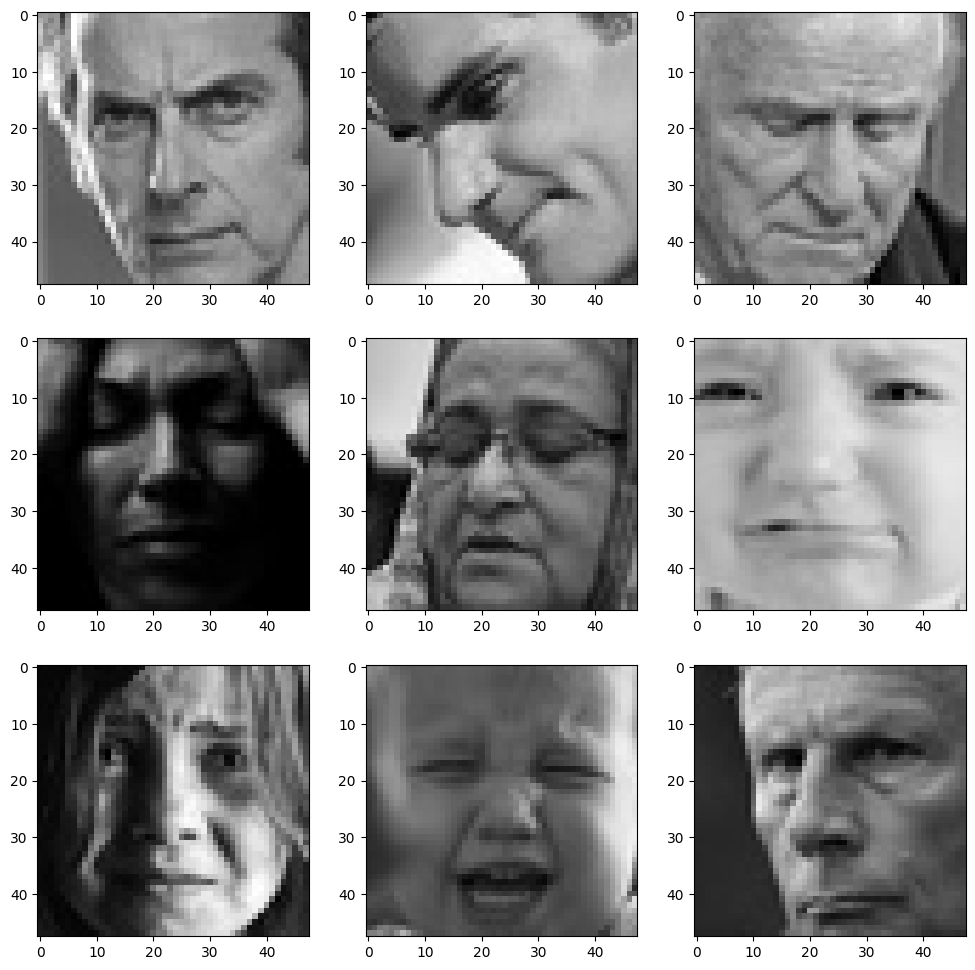

In [7]:
# Visualizing sad faces
train_folder_path = "Facial_emotion_images/train/"
emotion = 'sad'
visualizeFaces(emotion, train_folder_path)

**Observations and Insights:__**
1. The images are pictures of sad people that are cropped to focus on the face
2. When people are sad, they often place hands on their cheeks probably as a supportive gesture
3. In sad faces, the mouth often is in a straight line shape
4. In sad faces, the eyes are very expressive and open wide

### **Neutral**

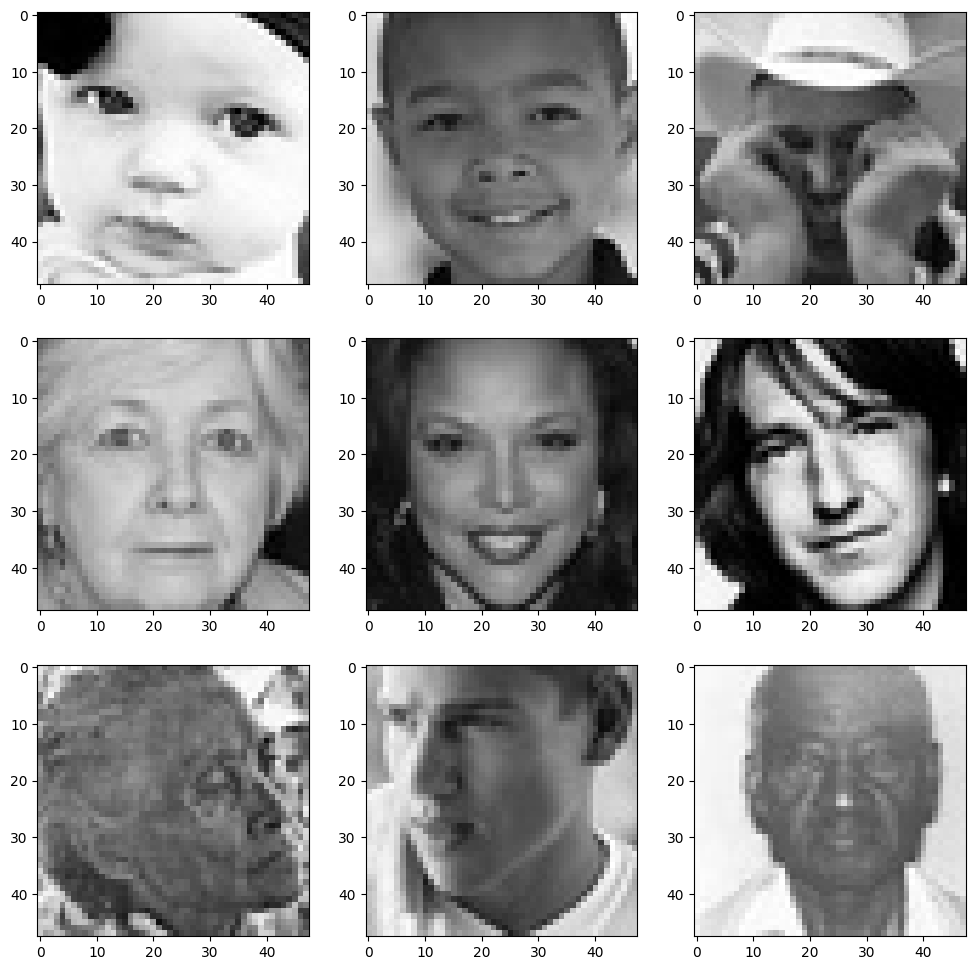

In [8]:
# Visualizing neutral faces
train_folder_path = "Facial_emotion_images/train/"
emotion = 'neutral'
visualizeFaces(emotion, train_folder_path)

**Observations and Insights:__**
1. The images are pictures of neutral faces that are cropped to focus on the face
2. When people are neutral, the facial features are not stretched. For example, the mouth may be in the neutral position
3. Sometimes neutral faces look like sad faces. It will be interesting to see if the neural networks are able to distinguish sad verses neutral faces.
4. The eyes are also very expressive in neutral faces.


### **Surprised**

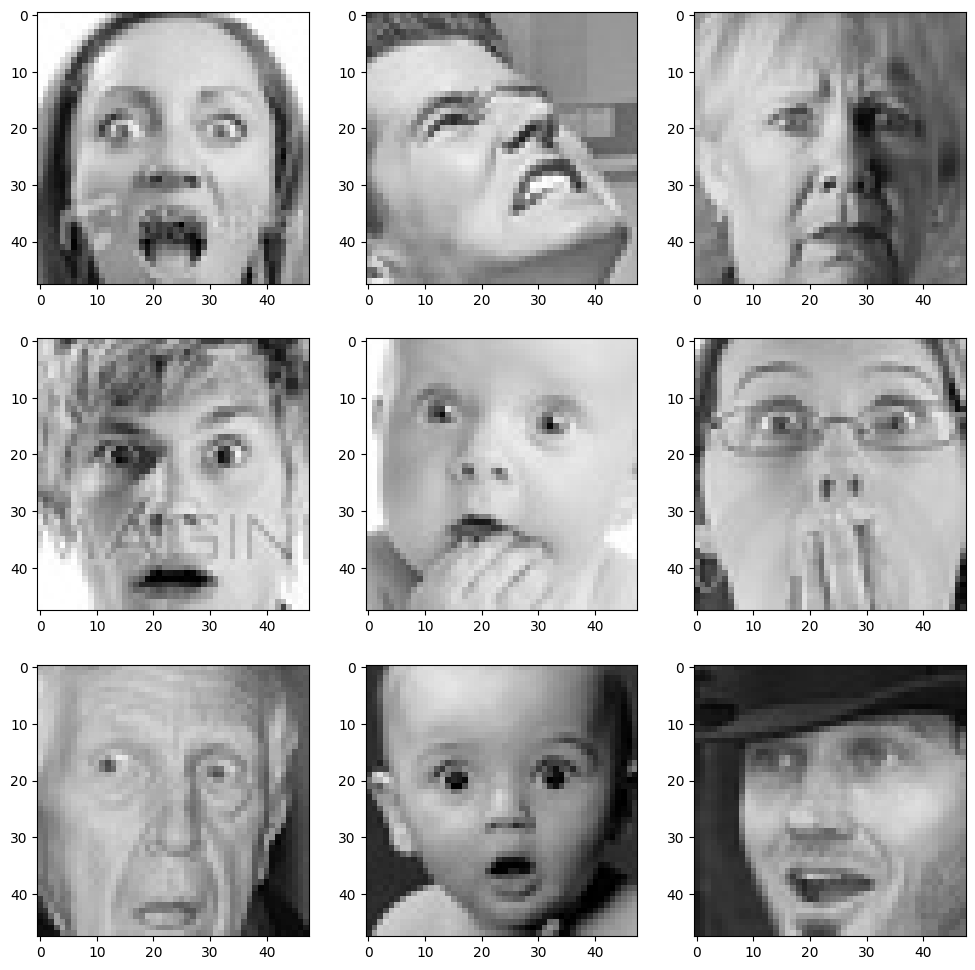

In [9]:
# Visualizing faces showing surprise
train_folder_path = "Facial_emotion_images/train/"
emotion = 'surprise'
visualizeFaces(emotion, train_folder_path)

**Observations and Insights:__**
1. The images are pictures of surprised people that are cropped to focus on the face
2. In surprised faces, the mouth is open wide and sometimes, the teeth are not visible in the suprised look
3. Often people place both hands on their faces when surprised
4. Eyes are open wide in surprised faces.


## **Checking Distribution of Classes**

In [10]:
#Method to determine class distribution in a folder
def determineClassDistributionInFolder(folderPath):
  class_counts = Counter()
  for class_folder in os.listdir(folderPath):
    class_folder_path = os.path.join(folderPath, class_folder)
    if os.path.isdir(class_folder_path):
      num_images = len([f for f in os.listdir(class_folder_path) if f.endswith(".jpg")])
      class_counts[class_folder] = num_images

  #Print class distribution
  print("Class Distribution in:",folderPath)
  for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

  total_images = sum(class_counts.values())
  # Define a color map or list of colors
  colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

  plt.figure(figsize=(7,7))
  bars = plt.bar(class_counts.keys(), class_counts.values(), color=colors[:len(class_counts)])

  for bar, count in zip(bars, class_counts.values()):
    percentage = (count/total_images) * 100
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.5,
        f"{count:,}; {percentage:.1f}%",
        ha='center',va='bottom',fontsize=10
    )

  plt.xlabel('Class')
  plt.ylabel('Number of Images')
  plt.title('Class Distribution')
  plt.xticks(rotation=45)
  plt.savefig('class_distribution.png', format="png", dpi=300, bbox_inches="tight")
  plt.show()


  #determine imbalance ratio
  imbalance_ratio = max(class_counts.values()) / min(class_counts.values())
  print(f"Imbalance Ratio:{imbalance_ratio:.2f}")




Class Distribution in: Facial_emotion_images/train/
sad: 3982 images
surprise: 3173 images
neutral: 3978 images
happy: 3976 images


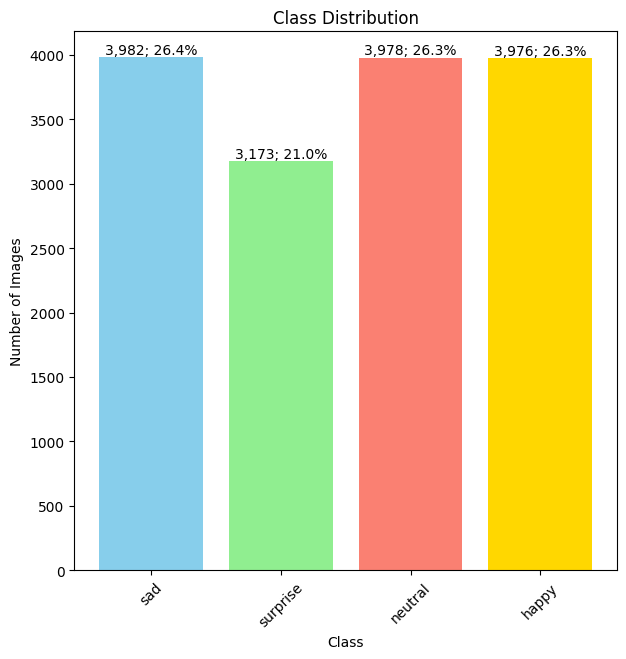

Imbalance Ratio:1.25


In [11]:
#Plot distribution of classes in the training folder
folder_path = "Facial_emotion_images/train/"
determineClassDistributionInFolder(folder_path)

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

**Observations and Insights:__**
1. The classes are almost equally distributed. There are 21% surprise images and ~26% images for the other categories (sad, happy, and neutral).
2. The imbalance is not too severe and may not significantly impact predictive accuracy.

In [12]:
#function to calculate file hash
def calculateHash(file_path):
  hasher = hashlib.md5()
  with open(file_path, 'rb') as f:
    buf = f.read()
    hasher.update(buf)
    return hasher.hexdigest()

#Create a method to check for image duplicates
def determineImageDuplicates(folderPath):
  #Dictionary to store hash and corresponding file paths
  hashes = {}

  duplicates = []
  for root,_, files in os.walk(folderPath):
    for file_name in files:
      if file_name.endswith(".jpg"):
        file_path = os.path.join(root, file_name)
        file_hash = calculateHash(file_path)
        if file_hash in hashes:
          duplicates.append((file_path, hashes[file_hash]))
        else:
          hashes[file_hash] = file_path

  print("Duplicate Images: ", len(duplicates))

  for dup in duplicates:
    print(f"Duplicate: {dup[0]} -> Original:{dup[1]}")

  print("Example of 5 duplicate images:")
  for dup in duplicates[:5]:
    print(f"Duplicate: {dup[0]} -> Original:{dup[1]}")
    #Open both duplicate images
    img1 = Image.open(dup[0])
    img2 = Image.open(dup[1])

    plt.figure(figsize = (7,7))

    plt.subplot(1,2,1)
    plt.imshow(img1)
    plt.title(f"Duplicate: {os.path.basename(dup[0])}")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(img2)
    plt.title(f"Duplicate: {os.path.basename(dup[1])}")
    plt.axis('off')

    plt.show()





Duplicate Images:  32
Duplicate: Facial_emotion_images/train/happy/19817.jpg -> Original:Facial_emotion_images/train/happy/27550.jpg
Duplicate: Facial_emotion_images/train/happy/21407.jpg -> Original:Facial_emotion_images/train/happy/27552.jpg
Duplicate: Facial_emotion_images/train/happy/18902.jpg -> Original:Facial_emotion_images/train/happy/20242.jpg
Duplicate: Facial_emotion_images/train/happy/20944.jpg -> Original:Facial_emotion_images/train/happy/25901.jpg
Duplicate: Facial_emotion_images/train/happy/20258.jpg -> Original:Facial_emotion_images/train/happy/20533.jpg
Duplicate: Facial_emotion_images/train/happy/21607.jpg -> Original:Facial_emotion_images/train/happy/26061.jpg
Duplicate: Facial_emotion_images/train/happy/31292.jpg -> Original:Facial_emotion_images/train/happy/16390.jpg
Duplicate: Facial_emotion_images/train/happy/34825.jpg -> Original:Facial_emotion_images/train/happy/16693.jpg
Duplicate: Facial_emotion_images/train/happy/30217.jpg -> Original:Facial_emotion_images/t

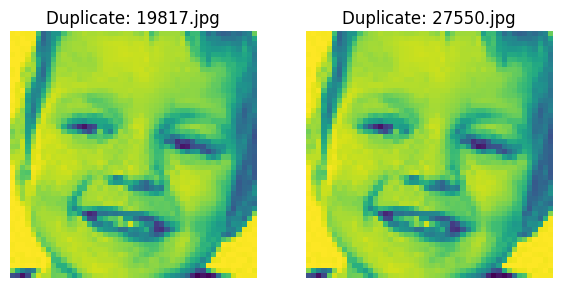

Duplicate: Facial_emotion_images/train/happy/21407.jpg -> Original:Facial_emotion_images/train/happy/27552.jpg


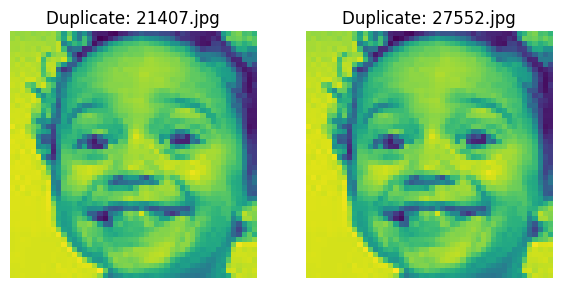

Duplicate: Facial_emotion_images/train/happy/18902.jpg -> Original:Facial_emotion_images/train/happy/20242.jpg


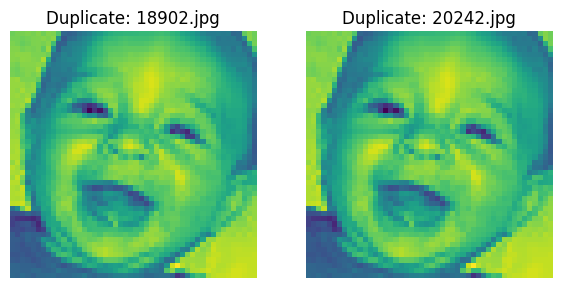

Duplicate: Facial_emotion_images/train/happy/20944.jpg -> Original:Facial_emotion_images/train/happy/25901.jpg


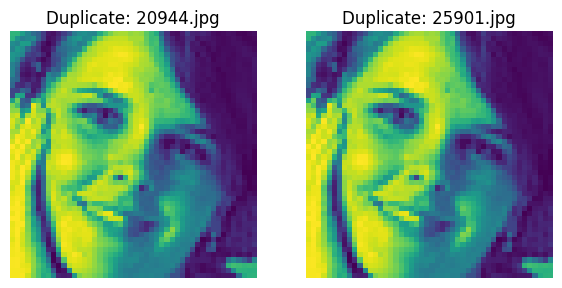

Duplicate: Facial_emotion_images/train/happy/20258.jpg -> Original:Facial_emotion_images/train/happy/20533.jpg


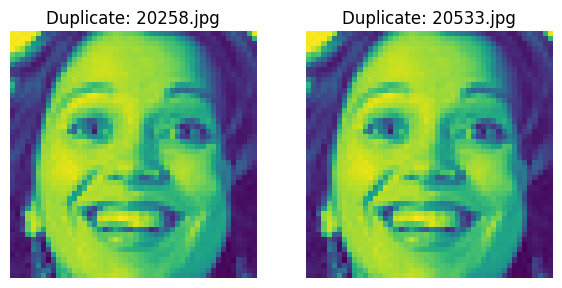

In [13]:
#Check for duplicates in training happy images
determineImageDuplicates('Facial_emotion_images/train/happy/')

Duplicate Images:  65
Duplicate: Facial_emotion_images/train/sad/24744.jpg -> Original:Facial_emotion_images/train/sad/12843.jpg
Duplicate: Facial_emotion_images/train/sad/16246.jpg -> Original:Facial_emotion_images/train/sad/24940.jpg
Duplicate: Facial_emotion_images/train/sad/28750.jpg -> Original:Facial_emotion_images/train/sad/28665.jpg
Duplicate: Facial_emotion_images/train/sad/10983.jpg -> Original:Facial_emotion_images/train/sad/24667.jpg
Duplicate: Facial_emotion_images/train/sad/26546.jpg -> Original:Facial_emotion_images/train/sad/19506.jpg
Duplicate: Facial_emotion_images/train/sad/14527.jpg -> Original:Facial_emotion_images/train/sad/34060.jpg
Duplicate: Facial_emotion_images/train/sad/14644.jpg -> Original:Facial_emotion_images/train/sad/31642.jpg
Duplicate: Facial_emotion_images/train/sad/25252.jpg -> Original:Facial_emotion_images/train/sad/16927.jpg
Duplicate: Facial_emotion_images/train/sad/26903.jpg -> Original:Facial_emotion_images/train/sad/27914.jpg
Duplicate: Faci

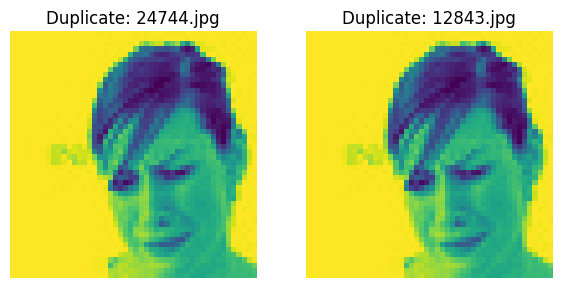

Duplicate: Facial_emotion_images/train/sad/16246.jpg -> Original:Facial_emotion_images/train/sad/24940.jpg


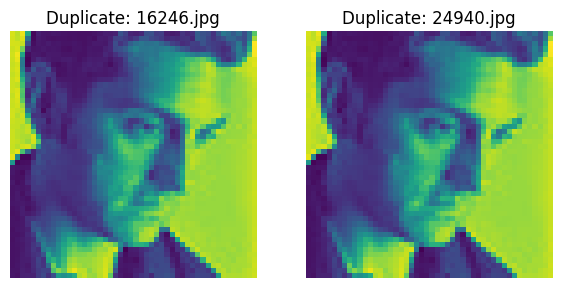

Duplicate: Facial_emotion_images/train/sad/28750.jpg -> Original:Facial_emotion_images/train/sad/28665.jpg


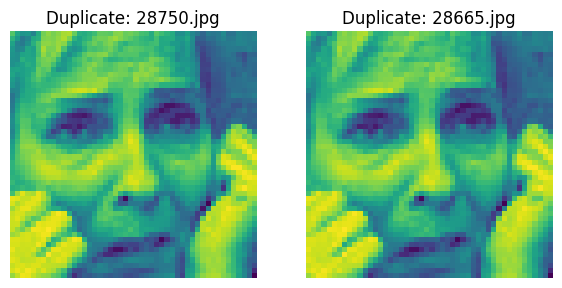

Duplicate: Facial_emotion_images/train/sad/10983.jpg -> Original:Facial_emotion_images/train/sad/24667.jpg


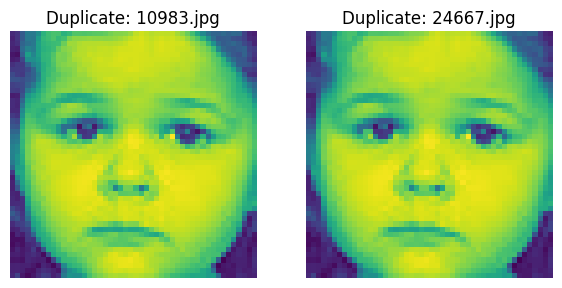

Duplicate: Facial_emotion_images/train/sad/26546.jpg -> Original:Facial_emotion_images/train/sad/19506.jpg


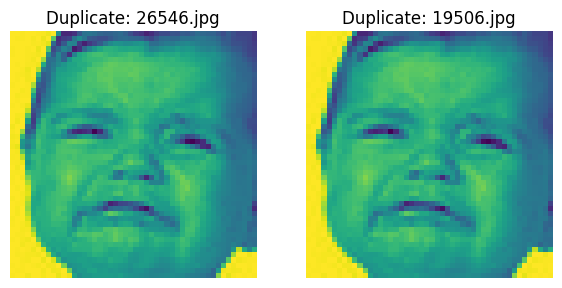

In [14]:
#Check for duplicates in training sad images
determineImageDuplicates('Facial_emotion_images/train/sad/')

Duplicate Images:  69
Duplicate: Facial_emotion_images/train/neutral/33041.jpg -> Original:Facial_emotion_images/train/neutral/30559.jpg
Duplicate: Facial_emotion_images/train/neutral/19628.jpg -> Original:Facial_emotion_images/train/neutral/12068.jpg
Duplicate: Facial_emotion_images/train/neutral/21448.jpg -> Original:Facial_emotion_images/train/neutral/30157.jpg
Duplicate: Facial_emotion_images/train/neutral/13994.jpg -> Original:Facial_emotion_images/train/neutral/10323.jpg
Duplicate: Facial_emotion_images/train/neutral/24722.jpg -> Original:Facial_emotion_images/train/neutral/18696.jpg
Duplicate: Facial_emotion_images/train/neutral/13017.jpg -> Original:Facial_emotion_images/train/neutral/16677.jpg
Duplicate: Facial_emotion_images/train/neutral/29666.jpg -> Original:Facial_emotion_images/train/neutral/21307.jpg
Duplicate: Facial_emotion_images/train/neutral/13931.jpg -> Original:Facial_emotion_images/train/neutral/18594.jpg
Duplicate: Facial_emotion_images/train/neutral/8181.jpg ->

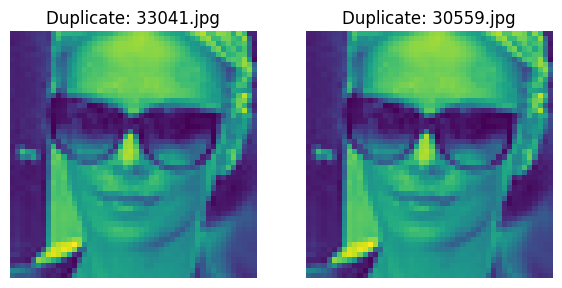

Duplicate: Facial_emotion_images/train/neutral/19628.jpg -> Original:Facial_emotion_images/train/neutral/12068.jpg


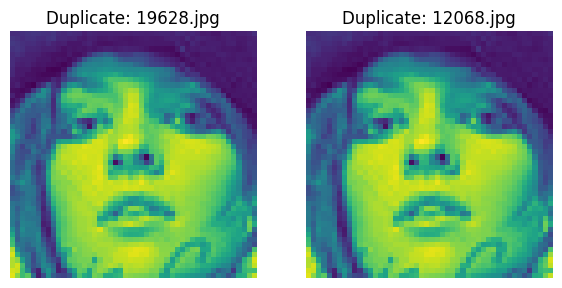

Duplicate: Facial_emotion_images/train/neutral/21448.jpg -> Original:Facial_emotion_images/train/neutral/30157.jpg


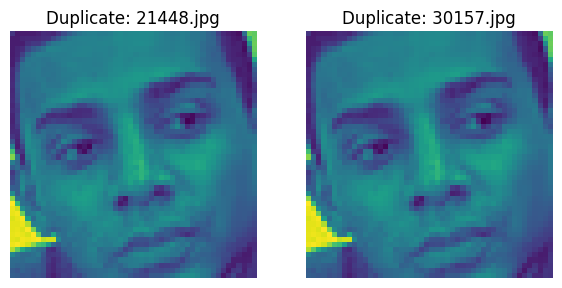

Duplicate: Facial_emotion_images/train/neutral/13994.jpg -> Original:Facial_emotion_images/train/neutral/10323.jpg


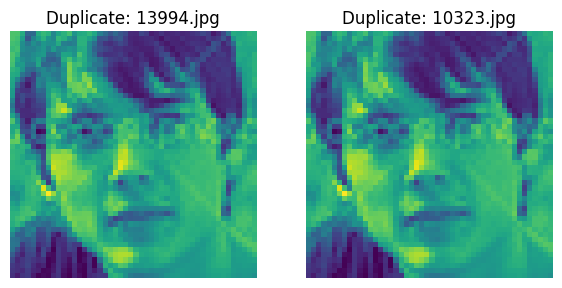

Duplicate: Facial_emotion_images/train/neutral/24722.jpg -> Original:Facial_emotion_images/train/neutral/18696.jpg


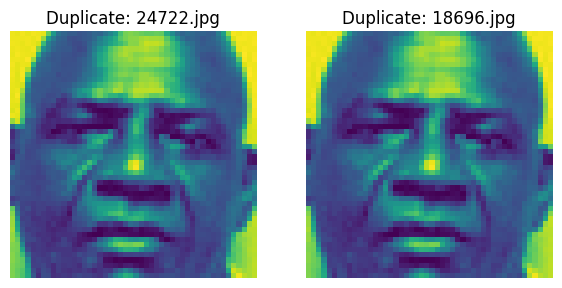

In [15]:
#Check for duplicates in training neutral images
determineImageDuplicates('Facial_emotion_images/train/neutral/')

Duplicate Images:  498
Duplicate: Facial_emotion_images/train/surprise/22477.jpg -> Original:Facial_emotion_images/train/surprise/35285.jpg
Duplicate: Facial_emotion_images/train/surprise/32716.jpg -> Original:Facial_emotion_images/train/surprise/31671.jpg
Duplicate: Facial_emotion_images/train/surprise/595.jpg -> Original:Facial_emotion_images/train/surprise/32749.jpg
Duplicate: Facial_emotion_images/train/surprise/27071.jpg -> Original:Facial_emotion_images/train/surprise/8979.jpg
Duplicate: Facial_emotion_images/train/surprise/17004.jpg -> Original:Facial_emotion_images/train/surprise/7699.jpg
Duplicate: Facial_emotion_images/train/surprise/11089.jpg -> Original:Facial_emotion_images/train/surprise/27898.jpg
Duplicate: Facial_emotion_images/train/surprise/3781.jpg -> Original:Facial_emotion_images/train/surprise/33825.jpg
Duplicate: Facial_emotion_images/train/surprise/4436.jpg -> Original:Facial_emotion_images/train/surprise/14918.jpg
Duplicate: Facial_emotion_images/train/surprise

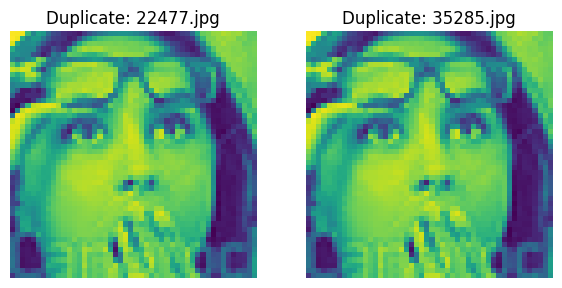

Duplicate: Facial_emotion_images/train/surprise/32716.jpg -> Original:Facial_emotion_images/train/surprise/31671.jpg


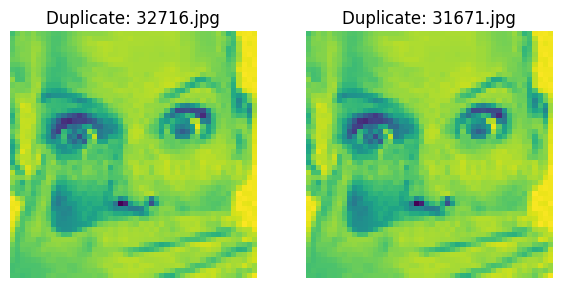

Duplicate: Facial_emotion_images/train/surprise/595.jpg -> Original:Facial_emotion_images/train/surprise/32749.jpg


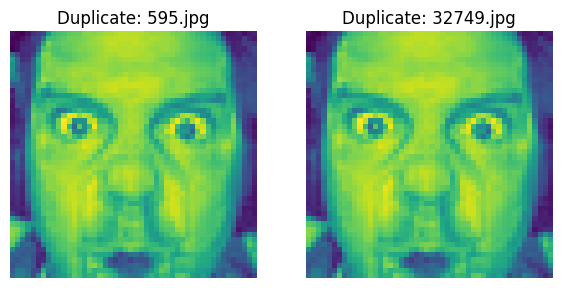

Duplicate: Facial_emotion_images/train/surprise/27071.jpg -> Original:Facial_emotion_images/train/surprise/8979.jpg


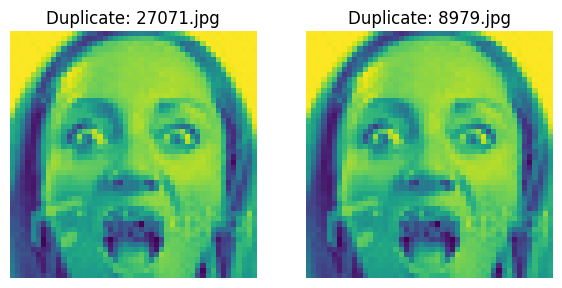

Duplicate: Facial_emotion_images/train/surprise/17004.jpg -> Original:Facial_emotion_images/train/surprise/7699.jpg


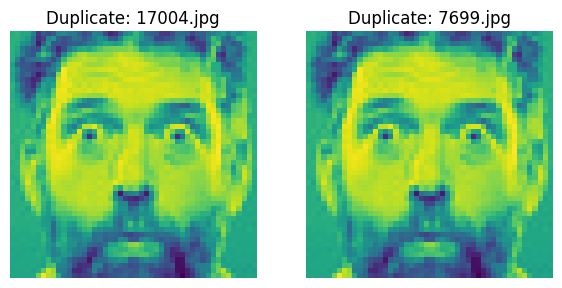

In [16]:
#Check for duplicates in training surprise images
determineImageDuplicates('Facial_emotion_images/train/surprise/')

####Observations
1. There are 32 duplicate photos in the training happy face folder
2. There are 65 duplicate photos in the training sad face folder
3. There are 69 duplicate photos in the training neutral face folder
4. There are 498 duplicate photos in the training neutral face folder

*Duplicates will be removed from all subfolders to prevent overfitting to duplicated images

In [17]:
#Function to determine and remove duplicates:
def removeDuplicates(folderPath):
  hashes={}
  duplicates = []
  duplicate_count = 0

  for file_name in os.listdir(folderPath):
    file_path = os.path.join(folderPath, file_name)
    if os.path.isfile(file_path):
      file_hash = calculateHash(file_path)
      if file_hash in hashes:
        duplicates.append(file_path)
        os.remove(file_path)
        duplicate_count+=1
      else:
        hashes[file_hash] = file_path

  print(f"Total duplicates removed: {duplicate_count}")

  if duplicate_count > 0:
    print("Removed files:")
    for dup in duplicates:
      print(f"{dup}")



In [18]:
#Remove duplicates from the training happy face folder
removeDuplicates('Facial_emotion_images/train/happy/')

Total duplicates removed: 32
Removed files:
Facial_emotion_images/train/happy/19817.jpg
Facial_emotion_images/train/happy/21407.jpg
Facial_emotion_images/train/happy/18902.jpg
Facial_emotion_images/train/happy/20944.jpg
Facial_emotion_images/train/happy/20258.jpg
Facial_emotion_images/train/happy/21607.jpg
Facial_emotion_images/train/happy/31292.jpg
Facial_emotion_images/train/happy/34825.jpg
Facial_emotion_images/train/happy/30217.jpg
Facial_emotion_images/train/happy/17753.jpg
Facial_emotion_images/train/happy/34976.jpg
Facial_emotion_images/train/happy/17595.jpg
Facial_emotion_images/train/happy/29095.jpg
Facial_emotion_images/train/happy/28470.jpg
Facial_emotion_images/train/happy/32166.jpg
Facial_emotion_images/train/happy/17436.jpg
Facial_emotion_images/train/happy/27142.jpg
Facial_emotion_images/train/happy/17814.jpg
Facial_emotion_images/train/happy/17407.jpg
Facial_emotion_images/train/happy/24752.jpg
Facial_emotion_images/train/happy/21839.jpg
Facial_emotion_images/train/happ

In [19]:
#Remove duplicates from the training sad face folder
removeDuplicates('Facial_emotion_images/train/sad/')

Total duplicates removed: 65
Removed files:
Facial_emotion_images/train/sad/24744.jpg
Facial_emotion_images/train/sad/16246.jpg
Facial_emotion_images/train/sad/28750.jpg
Facial_emotion_images/train/sad/10983.jpg
Facial_emotion_images/train/sad/26546.jpg
Facial_emotion_images/train/sad/14527.jpg
Facial_emotion_images/train/sad/14644.jpg
Facial_emotion_images/train/sad/25252.jpg
Facial_emotion_images/train/sad/26903.jpg
Facial_emotion_images/train/sad/7151.jpg
Facial_emotion_images/train/sad/30711.jpg
Facial_emotion_images/train/sad/25965.jpg
Facial_emotion_images/train/sad/17210.jpg
Facial_emotion_images/train/sad/12550.jpg
Facial_emotion_images/train/sad/21519.jpg
Facial_emotion_images/train/sad/26975.jpg
Facial_emotion_images/train/sad/8997.jpg
Facial_emotion_images/train/sad/30752.jpg
Facial_emotion_images/train/sad/25951.jpg
Facial_emotion_images/train/sad/31302.jpg
Facial_emotion_images/train/sad/30750.jpg
Facial_emotion_images/train/sad/34373.jpg
Facial_emotion_images/train/sad/77

In [20]:
#Remove duplicates from the training neutral face folder
removeDuplicates('Facial_emotion_images/train/neutral/')

Total duplicates removed: 69
Removed files:
Facial_emotion_images/train/neutral/33041.jpg
Facial_emotion_images/train/neutral/19628.jpg
Facial_emotion_images/train/neutral/21448.jpg
Facial_emotion_images/train/neutral/13994.jpg
Facial_emotion_images/train/neutral/24722.jpg
Facial_emotion_images/train/neutral/13017.jpg
Facial_emotion_images/train/neutral/29666.jpg
Facial_emotion_images/train/neutral/13931.jpg
Facial_emotion_images/train/neutral/8181.jpg
Facial_emotion_images/train/neutral/31073.jpg
Facial_emotion_images/train/neutral/31059.jpg
Facial_emotion_images/train/neutral/11531.jpg
Facial_emotion_images/train/neutral/13140.jpg
Facial_emotion_images/train/neutral/27219.jpg
Facial_emotion_images/train/neutral/18697.jpg
Facial_emotion_images/train/neutral/34183.jpg
Facial_emotion_images/train/neutral/20874.jpg
Facial_emotion_images/train/neutral/35442.jpg
Facial_emotion_images/train/neutral/12325.jpg
Facial_emotion_images/train/neutral/30561.jpg
Facial_emotion_images/train/neutral/2

In [21]:
#Remove duplicates from the training surprise face folder
removeDuplicates('Facial_emotion_images/train/surprise/')

Total duplicates removed: 498
Removed files:
Facial_emotion_images/train/surprise/22477.jpg
Facial_emotion_images/train/surprise/32716.jpg
Facial_emotion_images/train/surprise/595.jpg
Facial_emotion_images/train/surprise/27071.jpg
Facial_emotion_images/train/surprise/17004.jpg
Facial_emotion_images/train/surprise/11089.jpg
Facial_emotion_images/train/surprise/3781.jpg
Facial_emotion_images/train/surprise/4436.jpg
Facial_emotion_images/train/surprise/7060.jpg
Facial_emotion_images/train/surprise/15770.jpg
Facial_emotion_images/train/surprise/27531.jpg
Facial_emotion_images/train/surprise/34816.jpg
Facial_emotion_images/train/surprise/28662.jpg
Facial_emotion_images/train/surprise/10184.jpg
Facial_emotion_images/train/surprise/9985.jpg
Facial_emotion_images/train/surprise/8079.jpg
Facial_emotion_images/train/surprise/9990.jpg
Facial_emotion_images/train/surprise/28172.jpg
Facial_emotion_images/train/surprise/35164.jpg
Facial_emotion_images/train/surprise/28051.jpg
Facial_emotion_images/t

Class Distribution in: Facial_emotion_images/train/
sad: 3917 images
surprise: 2675 images
neutral: 3909 images
happy: 3944 images


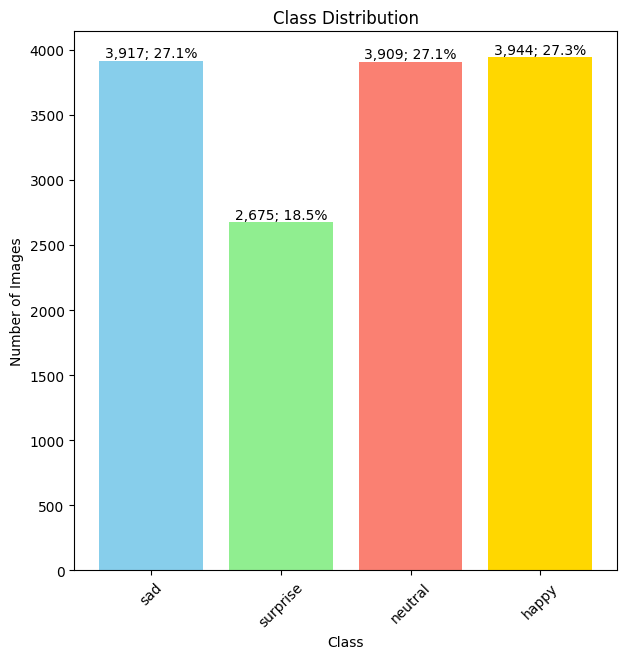

Imbalance Ratio:1.47


In [22]:
#Plot distribution of classes in the training folder
folder_path = "Facial_emotion_images/train/"
determineClassDistributionInFolder(folder_path)

**Observations and Insights:__**
1. After removing duplicates from the training folder. The classes are almost equally distributed. 27% of the images are neutral, happy, or sad. 18.5% of the images are surprised.
2. The class imbalance between the class with the most images and the class with the least images is 1.47 now after removing duplicates but still not too severe to prevent training.

Class Distribution in: Facial_emotion_images/validation/
sad: 1139 images
surprise: 797 images
neutral: 1216 images
happy: 1825 images


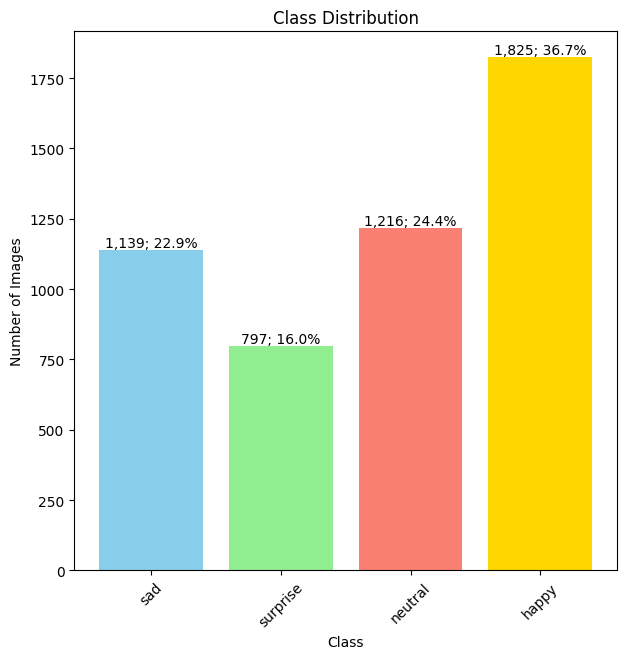

Imbalance Ratio:2.29


In [23]:
#Plot distribution of classes in the validation folder
folder_path = "Facial_emotion_images/validation/"
determineClassDistributionInFolder(folder_path)

**Observations and Insights:__**
1. In the validation folder, before checking for image duplicates:
*   24.4% of the faces are neutral
*   16% of the faces are surprised
*   36.7% of the faces are happy
*   22.9% of the faces are sad

The class imbalance between the class with the most images and the class with the least images is 2.29. For validation, this distribution is still acceptable for validating the model.





Class Distribution in: Facial_emotion_images/test/
sad: 32 images
surprise: 32 images
neutral: 32 images
happy: 32 images


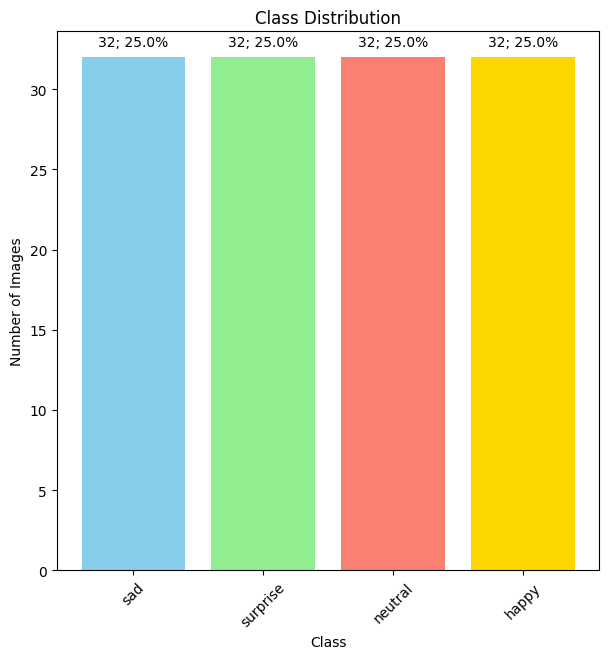

Imbalance Ratio:1.00


In [24]:
#Plot distribution of classes in the test folder
folder_path = "Facial_emotion_images/test/"
determineClassDistributionInFolder(folder_path)

**Observations and Insights:__**
1. In the test class, the classes are uniformly distributed with 25% of the images in each folder.

Duplicate Images:  5
Duplicate: Facial_emotion_images/validation/happy/12672.jpg -> Original:Facial_emotion_images/validation/happy/30424.jpg
Duplicate: Facial_emotion_images/validation/happy/2450.jpg -> Original:Facial_emotion_images/validation/happy/10956.jpg
Duplicate: Facial_emotion_images/validation/happy/11733.jpg -> Original:Facial_emotion_images/validation/happy/20988.jpg
Duplicate: Facial_emotion_images/validation/happy/7815.jpg -> Original:Facial_emotion_images/validation/happy/21120.jpg
Duplicate: Facial_emotion_images/validation/happy/1381.jpg -> Original:Facial_emotion_images/validation/happy/18476.jpg
Example of 5 duplicate images:
Duplicate: Facial_emotion_images/validation/happy/12672.jpg -> Original:Facial_emotion_images/validation/happy/30424.jpg


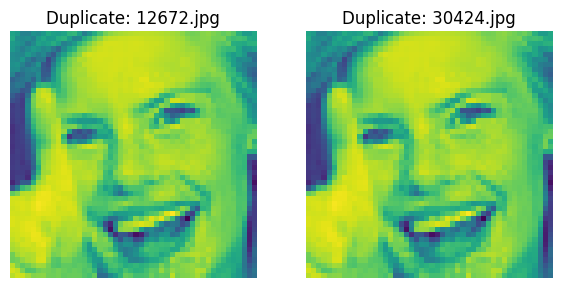

Duplicate: Facial_emotion_images/validation/happy/2450.jpg -> Original:Facial_emotion_images/validation/happy/10956.jpg


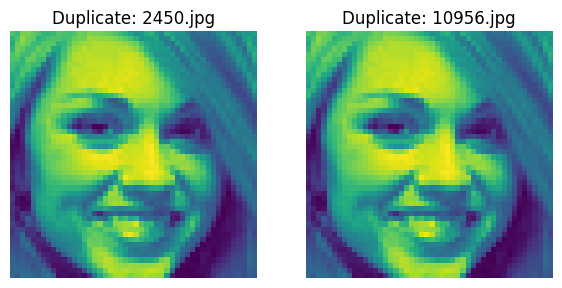

Duplicate: Facial_emotion_images/validation/happy/11733.jpg -> Original:Facial_emotion_images/validation/happy/20988.jpg


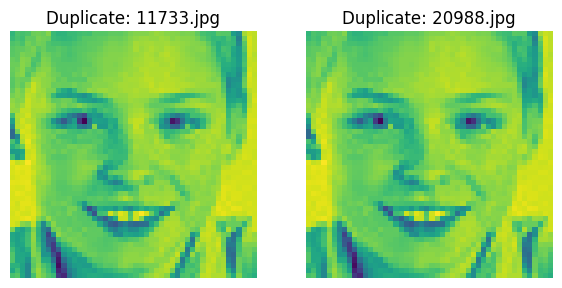

Duplicate: Facial_emotion_images/validation/happy/7815.jpg -> Original:Facial_emotion_images/validation/happy/21120.jpg


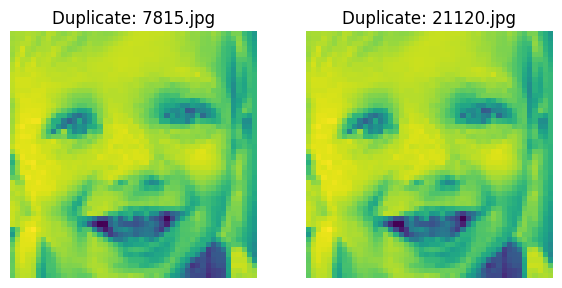

Duplicate: Facial_emotion_images/validation/happy/1381.jpg -> Original:Facial_emotion_images/validation/happy/18476.jpg


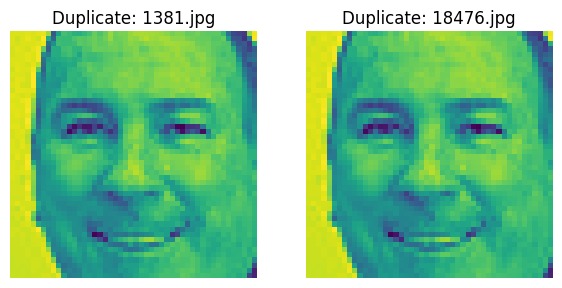

In [25]:
#Determine image duplicates for happy faces in the validation folder
determineImageDuplicates('Facial_emotion_images/validation/happy/')

Duplicate Images:  11
Duplicate: Facial_emotion_images/validation/sad/16125.jpg -> Original:Facial_emotion_images/validation/sad/8876.jpg
Duplicate: Facial_emotion_images/validation/sad/25529.jpg -> Original:Facial_emotion_images/validation/sad/27350.jpg
Duplicate: Facial_emotion_images/validation/sad/20468.jpg -> Original:Facial_emotion_images/validation/sad/12364.jpg
Duplicate: Facial_emotion_images/validation/sad/32189.jpg -> Original:Facial_emotion_images/validation/sad/24013.jpg
Duplicate: Facial_emotion_images/validation/sad/25348.jpg -> Original:Facial_emotion_images/validation/sad/30181.jpg
Duplicate: Facial_emotion_images/validation/sad/17215.jpg -> Original:Facial_emotion_images/validation/sad/29819.jpg
Duplicate: Facial_emotion_images/validation/sad/28465.jpg -> Original:Facial_emotion_images/validation/sad/27350.jpg
Duplicate: Facial_emotion_images/validation/sad/23549.jpg -> Original:Facial_emotion_images/validation/sad/7675.jpg
Duplicate: Facial_emotion_images/validation/

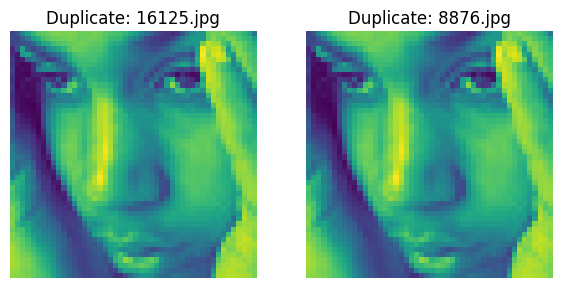

Duplicate: Facial_emotion_images/validation/sad/25529.jpg -> Original:Facial_emotion_images/validation/sad/27350.jpg


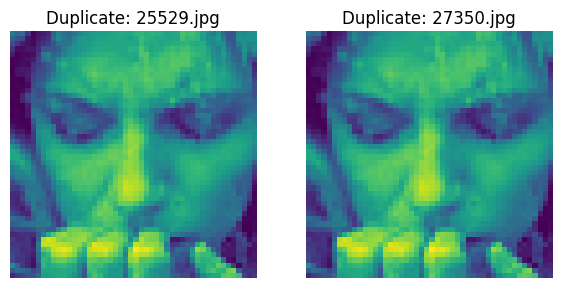

Duplicate: Facial_emotion_images/validation/sad/20468.jpg -> Original:Facial_emotion_images/validation/sad/12364.jpg


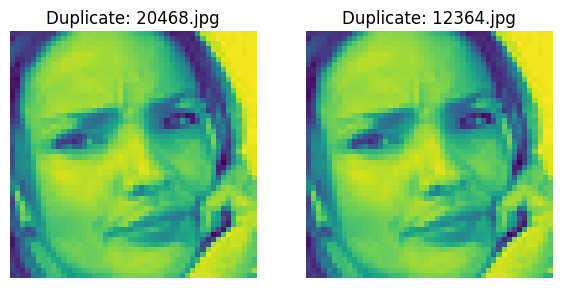

Duplicate: Facial_emotion_images/validation/sad/32189.jpg -> Original:Facial_emotion_images/validation/sad/24013.jpg


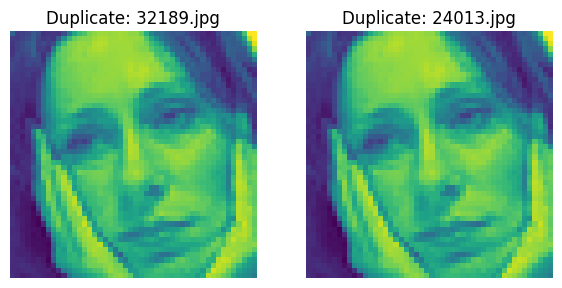

Duplicate: Facial_emotion_images/validation/sad/25348.jpg -> Original:Facial_emotion_images/validation/sad/30181.jpg


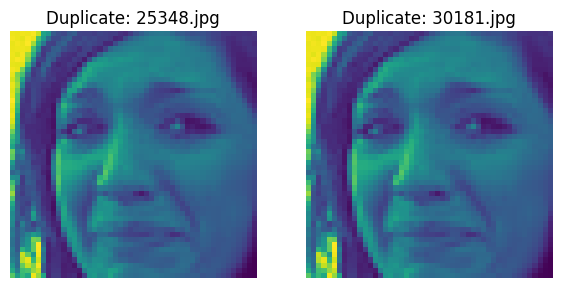

In [26]:
#Determine image duplicates for sad faces in the validation folder
determineImageDuplicates('Facial_emotion_images/validation/sad/')

Duplicate Images:  7
Duplicate: Facial_emotion_images/validation/neutral/24798.jpg -> Original:Facial_emotion_images/validation/neutral/28007.jpg
Duplicate: Facial_emotion_images/validation/neutral/5170.jpg -> Original:Facial_emotion_images/validation/neutral/25615.jpg
Duplicate: Facial_emotion_images/validation/neutral/16570.jpg -> Original:Facial_emotion_images/validation/neutral/11130.jpg
Duplicate: Facial_emotion_images/validation/neutral/35356.jpg -> Original:Facial_emotion_images/validation/neutral/18223.jpg
Duplicate: Facial_emotion_images/validation/neutral/27533.jpg -> Original:Facial_emotion_images/validation/neutral/35754.jpg
Duplicate: Facial_emotion_images/validation/neutral/7348.jpg -> Original:Facial_emotion_images/validation/neutral/24931.jpg
Duplicate: Facial_emotion_images/validation/neutral/22774.jpg -> Original:Facial_emotion_images/validation/neutral/7254.jpg
Example of 5 duplicate images:
Duplicate: Facial_emotion_images/validation/neutral/24798.jpg -> Original:Fa

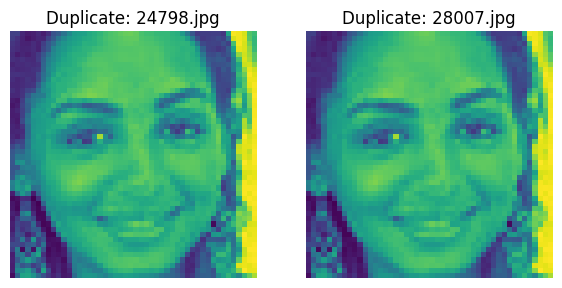

Duplicate: Facial_emotion_images/validation/neutral/5170.jpg -> Original:Facial_emotion_images/validation/neutral/25615.jpg


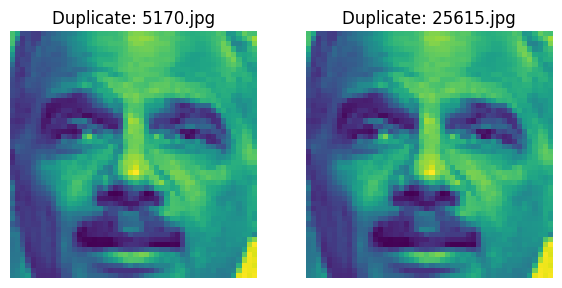

Duplicate: Facial_emotion_images/validation/neutral/16570.jpg -> Original:Facial_emotion_images/validation/neutral/11130.jpg


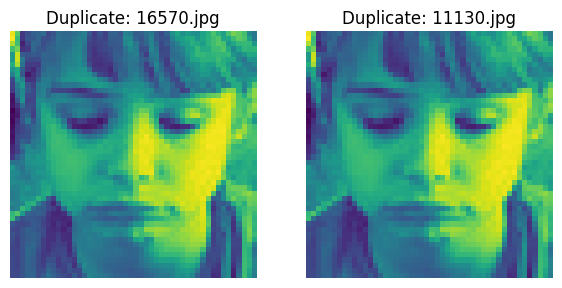

Duplicate: Facial_emotion_images/validation/neutral/35356.jpg -> Original:Facial_emotion_images/validation/neutral/18223.jpg


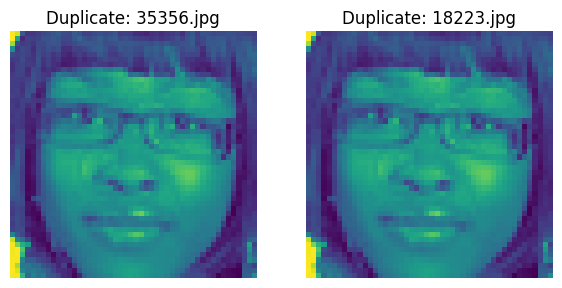

Duplicate: Facial_emotion_images/validation/neutral/27533.jpg -> Original:Facial_emotion_images/validation/neutral/35754.jpg


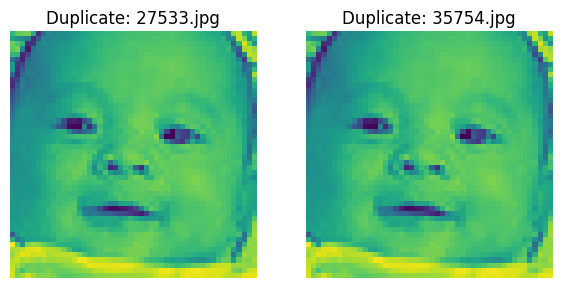

In [27]:
#Determine image duplicates for neutral faces in the validation folder
determineImageDuplicates('Facial_emotion_images/validation/neutral/')

Duplicate Images:  32
Duplicate: Facial_emotion_images/validation/surprise/15802.jpg -> Original:Facial_emotion_images/validation/surprise/10268.jpg
Duplicate: Facial_emotion_images/validation/surprise/31102.jpg -> Original:Facial_emotion_images/validation/surprise/29618.jpg
Duplicate: Facial_emotion_images/validation/surprise/17044.jpg -> Original:Facial_emotion_images/validation/surprise/1515.jpg
Duplicate: Facial_emotion_images/validation/surprise/17161.jpg -> Original:Facial_emotion_images/validation/surprise/10268.jpg
Duplicate: Facial_emotion_images/validation/surprise/26101.jpg -> Original:Facial_emotion_images/validation/surprise/9141.jpg
Duplicate: Facial_emotion_images/validation/surprise/28667.jpg -> Original:Facial_emotion_images/validation/surprise/20162.jpg
Duplicate: Facial_emotion_images/validation/surprise/9162.jpg -> Original:Facial_emotion_images/validation/surprise/21807.jpg
Duplicate: Facial_emotion_images/validation/surprise/22666.jpg -> Original:Facial_emotion_im

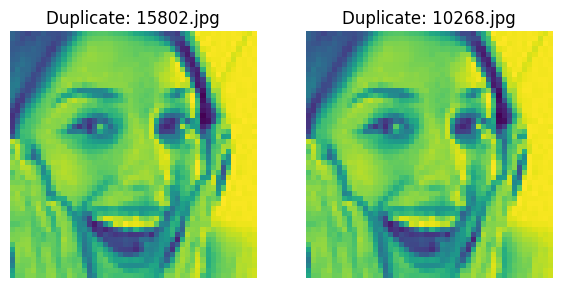

Duplicate: Facial_emotion_images/validation/surprise/31102.jpg -> Original:Facial_emotion_images/validation/surprise/29618.jpg


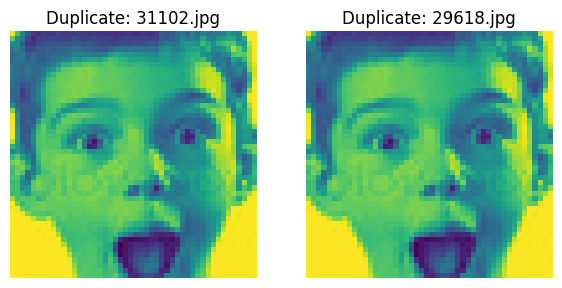

Duplicate: Facial_emotion_images/validation/surprise/17044.jpg -> Original:Facial_emotion_images/validation/surprise/1515.jpg


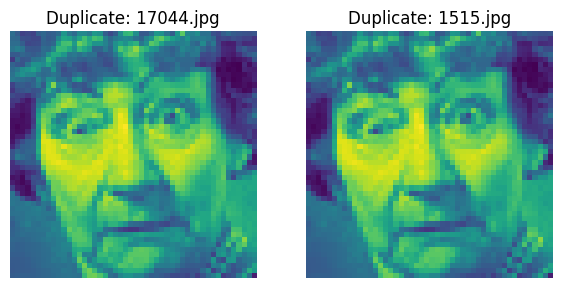

Duplicate: Facial_emotion_images/validation/surprise/17161.jpg -> Original:Facial_emotion_images/validation/surprise/10268.jpg


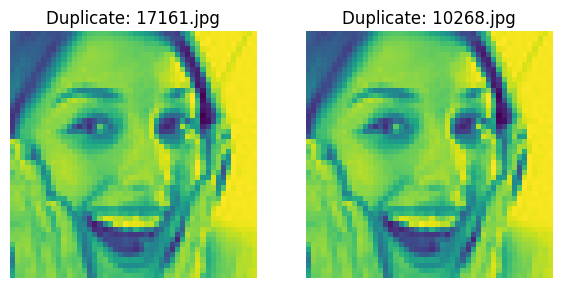

Duplicate: Facial_emotion_images/validation/surprise/26101.jpg -> Original:Facial_emotion_images/validation/surprise/9141.jpg


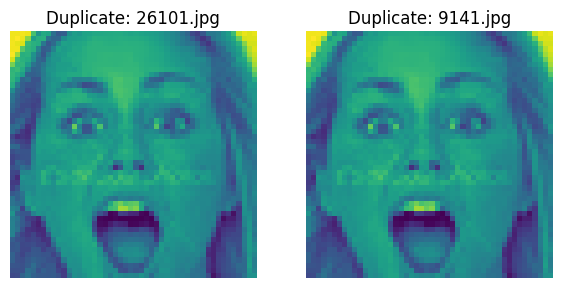

In [28]:
#Determine image duplicates for surpise faces in the validation folder
determineImageDuplicates('Facial_emotion_images/validation/surprise/')

####Observations
1. There are 5 duplicate pictures in the validation happy face folder
2. There are 11 duplicate pictures in the validation sad face folder
3. There are 7 duplicate pictures in the validation neutral face folder
4. There are 32 duplicate pictures in the validation neutral face folder



In [29]:
#Remove duplicates from the validation happy face folder
removeDuplicates('Facial_emotion_images/validation/happy/')

Total duplicates removed: 5
Removed files:
Facial_emotion_images/validation/happy/12672.jpg
Facial_emotion_images/validation/happy/2450.jpg
Facial_emotion_images/validation/happy/11733.jpg
Facial_emotion_images/validation/happy/7815.jpg
Facial_emotion_images/validation/happy/1381.jpg


In [30]:
#Remove duplicates from the validation sad face folder
removeDuplicates('Facial_emotion_images/validation/sad/')

Total duplicates removed: 11
Removed files:
Facial_emotion_images/validation/sad/16125.jpg
Facial_emotion_images/validation/sad/25529.jpg
Facial_emotion_images/validation/sad/20468.jpg
Facial_emotion_images/validation/sad/32189.jpg
Facial_emotion_images/validation/sad/25348.jpg
Facial_emotion_images/validation/sad/17215.jpg
Facial_emotion_images/validation/sad/28465.jpg
Facial_emotion_images/validation/sad/23549.jpg
Facial_emotion_images/validation/sad/8953.jpg
Facial_emotion_images/validation/sad/25843.jpg
Facial_emotion_images/validation/sad/11284.jpg


In [31]:
#Remove duplicates from the validation neutral face folder
removeDuplicates('Facial_emotion_images/validation/neutral/')

Total duplicates removed: 7
Removed files:
Facial_emotion_images/validation/neutral/24798.jpg
Facial_emotion_images/validation/neutral/5170.jpg
Facial_emotion_images/validation/neutral/16570.jpg
Facial_emotion_images/validation/neutral/35356.jpg
Facial_emotion_images/validation/neutral/27533.jpg
Facial_emotion_images/validation/neutral/7348.jpg
Facial_emotion_images/validation/neutral/22774.jpg


In [32]:
#Remove duplicates from the validation surprise face folder
removeDuplicates('Facial_emotion_images/validation/surprise/')

Total duplicates removed: 32
Removed files:
Facial_emotion_images/validation/surprise/15802.jpg
Facial_emotion_images/validation/surprise/31102.jpg
Facial_emotion_images/validation/surprise/17044.jpg
Facial_emotion_images/validation/surprise/17161.jpg
Facial_emotion_images/validation/surprise/26101.jpg
Facial_emotion_images/validation/surprise/28667.jpg
Facial_emotion_images/validation/surprise/9162.jpg
Facial_emotion_images/validation/surprise/22666.jpg
Facial_emotion_images/validation/surprise/35384.jpg
Facial_emotion_images/validation/surprise/29515.jpg
Facial_emotion_images/validation/surprise/15486.jpg
Facial_emotion_images/validation/surprise/25674.jpg
Facial_emotion_images/validation/surprise/10866.jpg
Facial_emotion_images/validation/surprise/4536.jpg
Facial_emotion_images/validation/surprise/867.jpg
Facial_emotion_images/validation/surprise/16829.jpg
Facial_emotion_images/validation/surprise/15524.jpg
Facial_emotion_images/validation/surprise/27737.jpg
Facial_emotion_images/va

Class Distribution in: Facial_emotion_images/validation/
sad: 1128 images
surprise: 765 images
neutral: 1209 images
happy: 1820 images


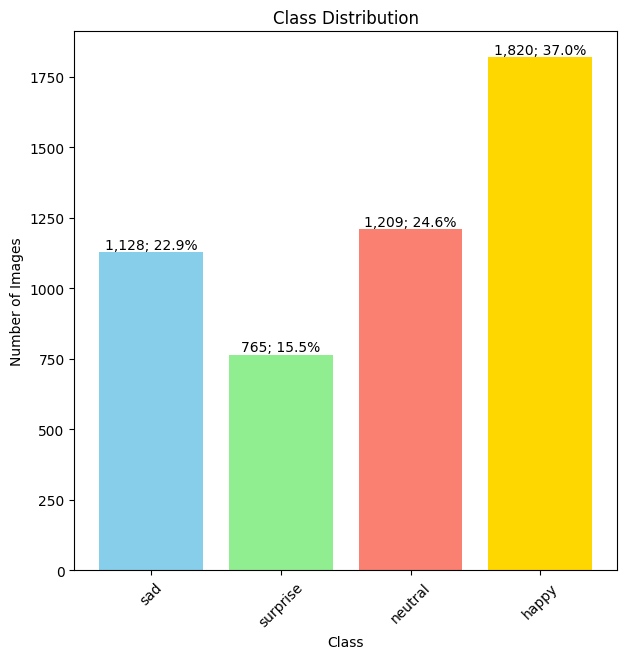

Imbalance Ratio:2.38


In [33]:
#Plot distribution of classes in the validation folder
folder_path = "Facial_emotion_images/validation/"
determineClassDistributionInFolder(folder_path)

**Observations and Insights:__**
1. In the validation folder, after removing image duplicates:
*   24.6% of the faces are neutral
*   15.5% of the faces are surprised
*   37% of the faces are happy
*   22.9% of the faces are sad

The class imbalance between the class with the most images and the class with the least images is 2.38. For validation, this distribution is still acceptable for validating the model.

In [34]:
#Determine image duplicates for happy faces in the test folder
determineImageDuplicates('Facial_emotion_images/test/happy/')

Duplicate Images:  0
Example of 5 duplicate images:


In [35]:
#Determine image duplicates for sad faces in the test folder
determineImageDuplicates('Facial_emotion_images/test/sad/')

Duplicate Images:  0
Example of 5 duplicate images:


In [36]:
#Determine image duplicates for neutral faces in the test folder
determineImageDuplicates('Facial_emotion_images/test/neutral/')

Duplicate Images:  0
Example of 5 duplicate images:


In [37]:
#Determine image duplicates for surprise faces in the test folder
determineImageDuplicates('Facial_emotion_images/test/surprise/')

Duplicate Images:  0
Example of 5 duplicate images:


####Observations
1. There are no duplicates in the test folder and there is uniform class distribution for the test data sets.

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [38]:
batch_size = 128
folder_path = "Facial_emotion_images/"
classCategories = ['happy','sad','neutral','surprise']

#Parameters for training for ImageDataGenerator
datagen_train_params = {
    "horizontal_flip": True,
     "brightness_range": (0.0, 2.0),
     "rescale": 1.0/255,
     "shear_range": 0.3
    }

#Parameters for validation and test for ImageDataGenerator
datagen_val_test_params = {"rescale": 1.0/255}

datagen_train = ImageDataGenerator(**datagen_train_params)
datagen_val = ImageDataGenerator(**datagen_val_test_params)
datagen_test = ImageDataGenerator(**datagen_val_test_params)

def create_dataset(datagen, folder_name):
  return datagen.flow_from_directory(folder_path + folder_name,
                                              target_size = (picture_size, picture_size),
                                              color_mode="grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = classCategories,
                                              shuffle = True)

train_set = create_dataset(datagen_train,"train/")
validation_set = create_dataset(datagen_val,"validation/")
test_set = create_dataset(datagen_test,"test/")

Found 14445 images belonging to 4 classes.
Found 4922 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [39]:
#Clear backend and assign random seed
from tensorflow.keras import backend as K
K.clear_session()
tf.random.set_seed(42)

## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

Yes, Convolutional Neural Networks are the right approach. We should not use an ANN for this task because it would be too computationally expensive just to make the ANN learn that locality is important in the dataset - it would see lists of pixels with no spatial context. A CNN is like a fully connected ANN that has the nonlocal connections pruned ahead of training because we know that they are unlikely to contribute much relevant information.<br>
The advantages of CNNs are:<br>
1. that they enforce an inductive bias for spatial locality<br>
2. efficient weight sharing <br>
3. translational invariance<br>
Images make sense to us because they have a hierarchy of spatially local features. At the lowest level, this includes simple edges and corners. To detect a small edge, a neural net does not need information from pixels on the other side of the image, so the connections of a neuron to all pixels would be wasteful multiply-accumulate operations. Instead, a CNN allows the network to learn a local filter that can detect the same type of localized features wherever that filter "looks" as it slides across the image.<br>

The advantages of CNNs are definitely applicable for this facial recognition task because<br>
1. we are working with image data.
2. facial features are a hierarchy of abstractions, starting from simple edges and curves that could occur in various locations, and up to complex shapes like wide open eyes or frowning mouth.
3. Pooling layers help to efficiently process this hierarchy by making filters that reach to longer ranges, but still relatively localized at some scale that is smaller than the full image.
4. a facial feature could be in several sections of the image for different input face images, so the translational invariance helps to efficiently detect the feature no matter which pixels are part of it.


### **Creating the Base Neural Network**

### **First Convolutional Neural Network Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **64 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (48, 48, 1)**. We will start by modeling grayscale images.
 - Add a **relu activation layer**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **dropout layer with the rate equal to 0.2**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
  - Add a **relu activation layer**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **dropout layer with the rate equal to 0.2**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **relu activation layer**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **dropout layer with the rate equal to 0.2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 512 nodes**
 - Add a **relu activation layer**
 - Add a **dropout layer with the rate equal to 0.4**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 4** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.


In [40]:
#method to create a convolutional neural network
def cnn_model_1():
  model = Sequential()

  #Add first Conv2D layer with 64 filters, kernel of size 3, same padding and provide input shape
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', input_shape = (48,48,1)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  #Add second Conv2D layer with 32 filters, kernel of size 3, same padding and 'relu' activation
  model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  #Add third Conv2D layer with 32 filters, kernel of size 3, same padding and 'relu' activation
  model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  #Flatten the data to prepare for the fully connected component
  model.add(Flatten())
  #Add dense layer with 512 neurons and relu activation function, dropout of 0.4
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.4))
  #Add classification layer
  model.add(Dense(4, activation = 'softmax'))
  model.compile(optimizer = Adam(learning_rate=0.001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  return model

### **Compiling and Training the Model**

In [41]:
#Create first cnn model and publish summary
cnn_model_1 = cnn_model_1()

cnn_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 620,740 (2.37 MB)

 Trainable params: 620,740 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

####Observations
The model has: <br>
1. The first convolutional layer of the CNN has 64(filters) x (3 x 3 x 1) + 64 parameters = 640. Padding is 'same' so the input and output size are matched.
The relu layer applies an element-wise activation function to the input and has no learnable parameters. <br>
2. The input size is 48 x 48 x 1. We are fitting the gray scale image. <br>
3. We add a  max-pooling layer with a pool size of 2x2
and a dropout layer with the rate equal to 0.2. These layers have no parameters
4. The second Conv2D layer has 32 x (3 x 3 x 64 + 1) = 18464 parameters <br>
5. We add a  max-pooling layer with a pool size of 2x2
and a dropout layer with the rate equal to 0.2. These layers have no parameters
6. The third Conv2D layer has 32 x (3 x 3 x 32 + 1) = 9248 parameters <br>
7. We add a  max-pooling layer with a pool size of 2x2
and a dropout layer with the rate equal to 0.2. These layers have no parameters
8. We flatten the output from the previous layer.
5. The dense layer has 512 x 6  x 6 x 32 + 512  = 590, 336 parameters <br>
6. The classification layer has 4 x 512 + 4 = 2052 parameters


In [42]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./cnn_model_1.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

### **Evaluating the Model on the Test Set**

In [43]:
#Fitting the model
cnn_model_1_history = cnn_model_1.fit(train_set,validation_data = validation_set, epochs=20)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 30s 191ms/step - accuracy: 0.2699 - loss: 1.3855 - val_accuracy: 0.4393 - val_loss: 1.3110
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.3799 - loss: 1.2955 - val_accuracy: 0.5010 - val_loss: 1.1769
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.4544 - loss: 1.2078 - val_accuracy: 0.5325 - val_loss: 1.0831
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.4996 - loss: 1.1327 - val_accuracy: 0.5868 - val_loss: 1.0113
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.5287 - loss: 1.0803 - val_accuracy: 0.6032 - val_loss: 0.9532
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.5563 - loss: 1.0372 - val_accuracy: 0.5961 - val_loss: 0.9688
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.5521 - loss: 1.0330 - val_accuracy: 0.6166 - val_loss: 0.9183
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.5759 - loss: 0

In [44]:
#Save training history
with open("cnn_model_1_training_history.json","w") as f:
  json.dump(cnn_model_1_history.history,f)

#Load training history
with open("cnn_model_1_training_history.json","r") as f:
  cnn_model_1_restored_history = json.load(f)

#save the trained model
cnn_model_1.save("cnn_model_1.keras")

cnn_model_1_restored = load_model("cnn_model_1.keras")

####Plot the Training and Validation Accuracies

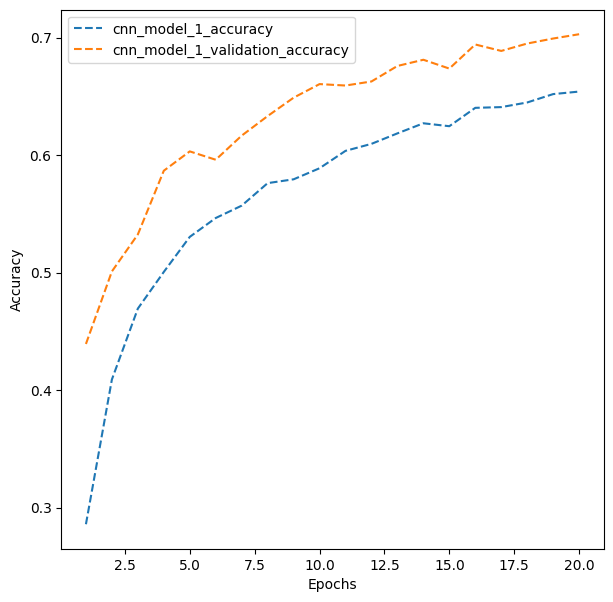

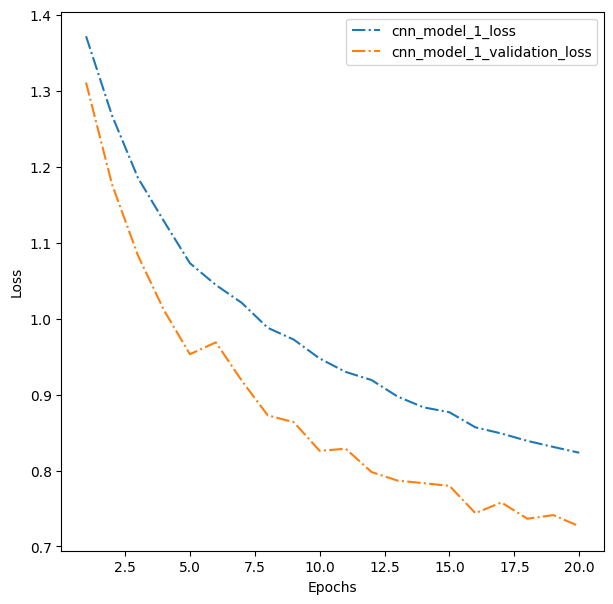

In [45]:
#plot training and validation accuracies and loss
dict_hist = cnn_model_1_restored_history

list_epoch = [i for i in range(1,21)]

plt.figure(figsize = (7,7))

plt.plot(list_epoch, dict_hist['accuracy'], ls = '--', label = 'cnn_model_1_accuracy')
plt.plot(list_epoch, dict_hist['val_accuracy'], ls = '--', label = 'cnn_model_1_validation_accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('cnn_model_1_acc.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(7,7))
plt.plot(list_epoch, dict_hist['loss'], ls='-.', label='cnn_model_1_loss')
plt.plot(list_epoch, dict_hist['val_loss'], ls='-.', label='cnn_model_1_validation_loss')

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('cnn_model_1_loss.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

**Observations and Insights:__**
1. The training accuracy increases with each epoch and the loss decreases with each epoch
2. The validation accuracy is better than the training accuracy across all epochs. The validation loss is also better than the training loss across all epochs. This shows that the model is generalizing well on unseen data.
3. The best accuracy achieved in training is about 65%. The best accuracy on validation is 70%

In [46]:
#Fetch a single batch of data
test_images, test_labels = next(test_set)
accuracy = cnn_model_1_restored.evaluate(test_images, test_labels, verbose=2)
print(f"Model accuracy on the test batch:{accuracy}")

4/4 - 2s - 591ms/step - accuracy: 0.7578 - loss: 0.6845
Model accuracy on the test batch:[0.6844899654388428, 0.7578125]


**Observations and Insights:__**
1. The accuracy on test data is 75.8% which is in good agreement with the training and validation results

In [77]:
#Define a method to evaluate model accuracy
def metrics_score(actual,predicted,name):
  from sklearn.metrics import classification_report
  from sklearn.metrics import confusion_matrix
  print(classification_report(actual, predicted))

  class_names = {v:k for k, v in train_set.class_indices.items()}

  cm = confusion_matrix(actual, predicted)
  plt.figure(figsize=(4,4))
  sns.heatmap(cm, annot=True, fmt = '0.0f',
              xticklabels = class_names.values(),
              yticklabels = class_names.values())
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.savefig(name+'confMatrix.png', format="png", dpi=300, bbox_inches="tight")

  plt.show()

In [48]:
pred = cnn_model_1_restored.predict(test_images)
pred = np.argmax(pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


In [49]:
print(train_set.class_indices)

{'happy': 0, 'sad': 1, 'neutral': 2, 'surprise': 3}


              precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.61      0.72      0.66        32
           2       0.72      0.72      0.72        32
           3       1.00      0.75      0.86        32

    accuracy                           0.76       128
   macro avg       0.78      0.76      0.76       128
weighted avg       0.78      0.76      0.76       128



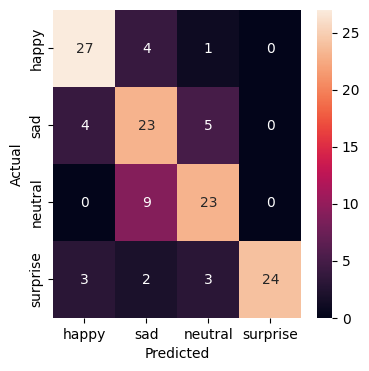

In [50]:
#plot confusion matrix from the first model
metrics_score(y_true,pred)

**Observations and Insights:__**
1. Sad and neutral faces show the lowest f1 scores of 66% and 72% respectively.
2. Surprise faces have the best f1 score of 86%
3. Actual neutral faces can be inaccurately classified as sad. Similarly, actual sad faces can be inaccurately classified as neutral



In [79]:
def visualizeImages(model, channels, name):
  #Visualize images from the test data, their true values and the classification from the model
  plot_test_images = []
  num_images_to_plot = 9
  plt.figure(figsize=(10,10))

  test_folder = 'Facial_emotion_images/test/'
  model = model
  class_names = {v:k for k, v in train_set.class_indices.items()}


  def preprocess_and_predict(img_path, model, class_names):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=channels)
    img = tf.image.resize(img, (48,48))
    img = img/255.0
    img = tf.expand_dims(img, axis=0)

    #predict class
    predictions = model.predict(img)[0]
    predicted_index = tf.argmax(predictions).numpy()
    predicted_class = class_names[predicted_index]
    predicted_probability = predictions[predicted_index]
    return img[0].numpy(), predicted_class, predicted_probability


  for class_folder in os.listdir(test_folder):
    class_folder_path = os.path.join(test_folder,class_folder)
    if(os.path.isdir(class_folder_path)):
      plot_test_images.extend(
          [os.path.join(class_folder_path,img) for img in os.listdir(class_folder_path)]
      )

  random_images = np.random.choice(plot_test_images, size=num_images_to_plot, replace=False)

  #plot images
  for i, img_path in enumerate(random_images):
    actual_class = os.path.basename(os.path.dirname(img_path))
    img, predicted_class, predicted_probability = preprocess_and_predict(img_path,model,class_names)
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(f"Actual: {actual_class} \nPredicted: {predicted_class} ({predicted_probability:.2f})")
    plt.axis("off")

  plt.tight_layout()
  plt.savefig(name+'_classification', format="png", dpi=300, bbox_inches="tight")
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


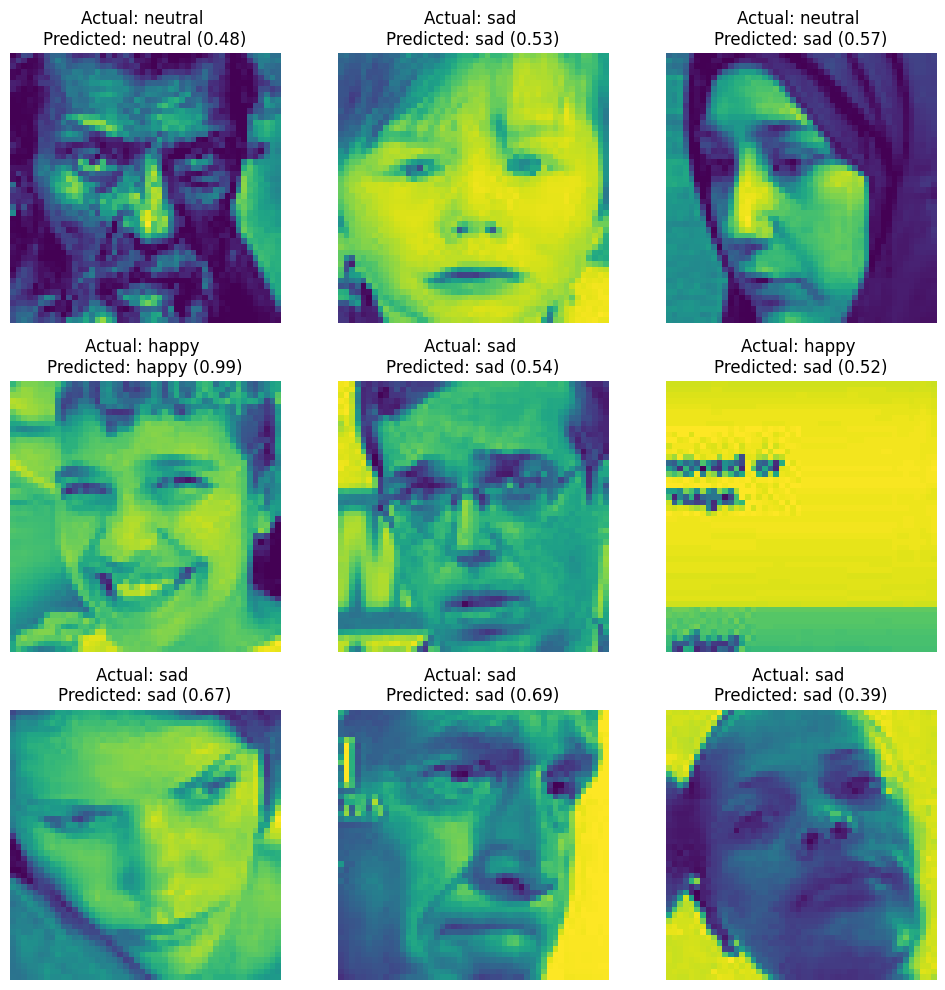

In [80]:
visualizeImages(cnn_model_1,1,'CNN_Model1')

**Observations and Insights:__**
1. Examples of classified faces are shown above. Correct classification tends to show high probability of assignment, while misclassifications tend to show low probabilities. This is encouraging.
2. The model struggles to distinguish sad verses neutral faces.

####Train the same model using RGB images and see if the predictions improve

In [53]:
#Clear backend and assign random seed
from tensorflow.keras import backend as K
K.clear_session()
tf.random.set_seed(42)

In [54]:
batch_size = 128
folder_path = "Facial_emotion_images/"
classCategories = ['happy','sad','neutral','surprise']

#Parameters for training for ImageDataGenerator
datagen_train_params = {
    "horizontal_flip": True,
     "brightness_range": (0.0, 2.0),
     "rescale": 1.0/255,
     "shear_range": 0.3
    }

#Parameters for validation and test for ImageDataGenerator
datagen_val_test_params = {"rescale": 1.0/255}

datagen_train = ImageDataGenerator(**datagen_train_params)
datagen_val = ImageDataGenerator(**datagen_val_test_params)
datagen_test = ImageDataGenerator(**datagen_val_test_params)

def create_dataset(datagen, folder_name):
  return datagen.flow_from_directory(folder_path + folder_name,
                                              target_size = (picture_size, picture_size),
                                              color_mode="rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = classCategories,
                                              shuffle = True)

train_set = create_dataset(datagen_train,"train/")
validation_set = create_dataset(datagen_val,"validation/")
test_set = create_dataset(datagen_test,"test/")

Found 14445 images belonging to 4 classes.
Found 4922 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Second Convolutional Neural Network Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **64 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (48, 48, 3)**. We will start by modeling **rgb** images.
 - Add a **relu activation layer**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **dropout layer with the rate equal to 0.2**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
  - Add a **relu activation layer**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **dropout layer with the rate equal to 0.2**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **relu activation layer**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **dropout layer with the rate equal to 0.2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 512 nodes**
 - Add a **relu activation layer**
 - Add a **dropout layer with the rate equal to 0.4**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 4** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.


In [55]:
#method to create a convolutional neural network
def cnn_model_2():
  model = Sequential()

  #Add first Conv2D layer with 64 filters, kernel of size 3, same padding and provide input shape
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', input_shape = (48,48,3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  #Add second Conv2D layer with 32 filters, kernel of size 3, same padding and 'relu' activation
  model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  #Add third Conv2D layer with 32 filters, kernel of size 3, same padding and 'relu' activation
  model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  #Flatten the data to prepare for the fully connected component
  model.add(Flatten())
  #Add dense layer with 512 neurons and relu activation function, dropout of 0.4
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.4))
  #Add classification layer
  model.add(Dense(4, activation = 'softmax'))
  model.compile(optimizer = Adam(learning_rate=0.001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  return model

In [56]:
#Create first cnn model and publish summary
cnn_model_2 = cnn_model_2()

cnn_model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 621,892 (2.37 MB)

 Trainable params: 621,892 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

####Observations
This model is exactly the same as CNN Model 1 except for the use of rgb images as input: <br>
1. The first convolutional layer of the CNN has 64(filters) x (3 x 3 x 3) + 64 parameters = 1792. Padding is 'same' so the input and output size are matched.
The relu layer applies an element-wise activation function to the input and has no learnable parameters. <br>
2. The input size is 48 x 48 x 3. We are fitting the **rgb** image. <br>
3. The second Conv2D layer has 32 x (3 x 3 x 64 + 1) = 18464 parameters <br>
4. The third Conv2D layer has 32 x (3 x 3 x 32 + 1) = 9248 parameters <br>
5. The dense layer has 512 x 6  x 6 x 32 + 512  = 590, 336 parameters <br>
6. The classification layer has 4 x 512 + 4 = 2052 parameters

*The only difference in model architecture to the first model trained is the use of rgb images compared to grayscale

In [57]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./cnn_model_2.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [58]:
#Fitting the model
cnn_model_2_history = cnn_model_2.fit(train_set,validation_data = validation_set, epochs=20)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 30s 212ms/step - accuracy: 0.2820 - loss: 1.3806 - val_accuracy: 0.3539 - val_loss: 1.3182
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.4081 - loss: 1.2749 - val_accuracy: 0.5299 - val_loss: 1.1280
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 172ms/step - accuracy: 0.4729 - loss: 1.1773 - val_accuracy: 0.5746 - val_loss: 1.0270
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 172ms/step - accuracy: 0.5141 - loss: 1.1084 - val_accuracy: 0.6028 - val_loss: 0.9852
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.5322 - loss: 1.0703 - val_accuracy: 0.6124 - val_loss: 0.9267
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.5505 - loss: 1.0270 - val_accuracy: 0.6211 - val_loss: 0.8988
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.5620 - loss: 1.0060 - val_accuracy: 0.6487 - val_loss: 0.8689
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.5817 - loss: 0

In [59]:
#Save training history
with open("cnn_model_2_training_history.json","w") as f:
  json.dump(cnn_model_2_history.history,f)

#Load training history
with open("cnn_model_2_training_history.json","r") as f:
  cnn_model_2_restored_history = json.load(f)

#save the trained model
cnn_model_2.save("cnn_model_2.keras")

cnn_model_2_restored = load_model("cnn_model_2.keras")

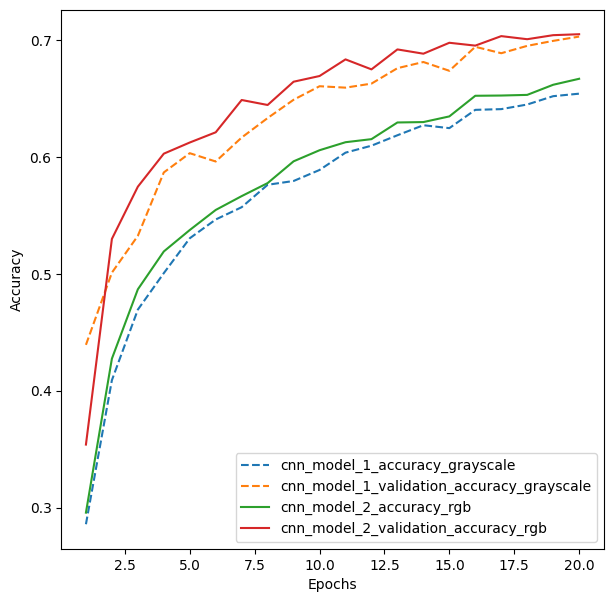

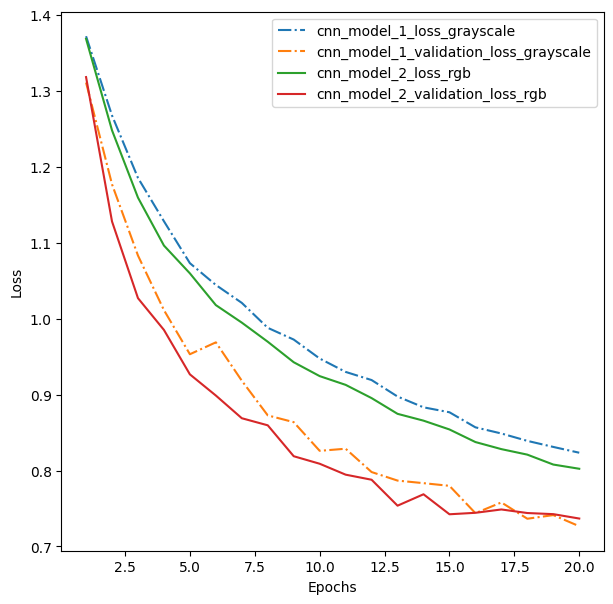

In [60]:
#plot training and validation accuracies and loss
dict_hist_2 = cnn_model_2_restored_history

list_epoch = [i for i in range(1,21)]

plt.figure(figsize = (7,7))

plt.plot(list_epoch, dict_hist['accuracy'], ls = '--', label = 'cnn_model_1_accuracy_grayscale')
plt.plot(list_epoch, dict_hist['val_accuracy'], ls = '--', label = 'cnn_model_1_validation_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_2['accuracy'], label = 'cnn_model_2_accuracy_rgb')
plt.plot(list_epoch, dict_hist_2['val_accuracy'], label = 'cnn_model_2_validation_accuracy_rgb')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('cnn_model_1_acc_rgbvsgray.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(7,7))
plt.plot(list_epoch, dict_hist['loss'], ls='-.', label='cnn_model_1_loss_grayscale')
plt.plot(list_epoch, dict_hist['val_loss'], ls='-.', label='cnn_model_1_validation_loss_grayscale')
plt.plot(list_epoch, dict_hist_2['loss'],  label='cnn_model_2_loss_rgb')
plt.plot(list_epoch, dict_hist_2['val_loss'],  label='cnn_model_2_validation_loss_rgb')

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('cnn_model_1_loss_rgbvsgray.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

**Observations and Insights:__**
1. Model accuracy and loss is matched for training and validation using rgb images verses grayscale.
2. The rgb model had slightly more parameters and took 7 minutes to train verses 4 minutes for the same model trained on gray scale images. Training was on GPU.

**Conclusions:** For this data set there is no advantage to using color images verses grayscale

In [61]:
#Fetch a single batch of data
test_images, test_labels = next(test_set)
accuracy = cnn_model_2_restored.evaluate(test_images, test_labels, verbose=2)
print(f"Model accuracy on the test batch:{accuracy}")

4/4 - 2s - 382ms/step - accuracy: 0.7188 - loss: 0.6951
Model accuracy on the test batch:[0.6951066851615906, 0.71875]


**Observations and Insights:__**
1. The accuracy on test data decreases from 75.8% (model trained on grayscale images) to 71.8% for the model training on rgb images.

In [62]:
pred_cnn_model_2 = cnn_model_2_restored.predict(test_images)
pred_cnn_model_2 = np.argmax(pred_cnn_model_2, axis=1)
y_true = np.argmax(test_labels, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


In [63]:
print(train_set.class_indices)

{'happy': 0, 'sad': 1, 'neutral': 2, 'surprise': 3}


              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.62      0.41      0.49        32
           2       0.55      0.75      0.63        32
           3       0.96      0.81      0.88        32

    accuracy                           0.72       128
   macro avg       0.73      0.72      0.71       128
weighted avg       0.73      0.72      0.71       128



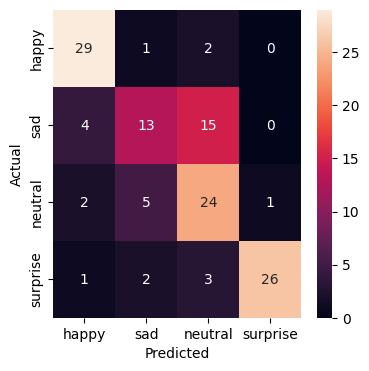

In [64]:
#plot confusion matrix from the first model
metrics_score(y_true,pred_cnn_model_2)

**Observations and Insights:__**
1. The model accuracy for training on RGB images is 71.8% which is lower than accuracy observed for the same model trained on gray scale images (75.8%). The f1 score for sad classification is 49% (model trained on rgb images) verses 66% (observed when model was trained on grayscale images). The f1 score for neutral faces is 63% (rgb model) verses 72% (grayscale model)

**Conclusions:** For this data set, training on rgb images results in low f1 scores for sad and neutral faces. The compute time was a bit longer for rgb images (7 minutes on GPU) verses 4 minutes on GPU for grayscale images. There is no advantage to using RGB images for training. Let us check the nature of the input images.

In [65]:
#Check the image mode for provided images
def check_image_mode_pillow(path):
  image_count = 0

  for file_name in os.listdir(path):
    image_path = os.path.join(path,file_name)

    img = Image.open(image_path)
    print(f"Image mode: {img.mode}")
    if img.mode == "L":
      print("The image is grayscale")
    elif img.mode == "RGB":
      print("The image is RGB.")
    else:
      print(f"Unsupported mode: {img.mode}")

    #Increment the counter
    image_count+=1

    if image_count >= 5:
      break

check_image_mode_pillow("Facial_emotion_images/train/surprise")

Image mode: L
The image is grayscale
Image mode: L
The image is grayscale
Image mode: L
The image is grayscale
Image mode: L
The image is grayscale
Image mode: L
The image is grayscale


**Observations and Insights:__** <br>
When we examine the nature of the images, they are grayscale. If possible, we should train the models on grayscale images.

In [66]:
#Clear backend and assign random seed
from tensorflow.keras import backend as K
K.clear_session()
tf.random.set_seed(42)

In [67]:
batch_size = 128
folder_path = "Facial_emotion_images/"
classCategories = ['happy','sad','neutral','surprise']

#Parameters for training for ImageDataGenerator
datagen_train_params = {
    "horizontal_flip": True,
     "brightness_range": (0.0, 2.0),
     "rescale": 1.0/255,
     "shear_range": 0.3
    }

#Parameters for validation and test for ImageDataGenerator
datagen_val_test_params = {"rescale": 1.0/255}

datagen_train = ImageDataGenerator(**datagen_train_params)
datagen_val = ImageDataGenerator(**datagen_val_test_params)
datagen_test = ImageDataGenerator(**datagen_val_test_params)

def create_dataset(datagen, folder_name):
  return datagen.flow_from_directory(folder_path + folder_name,
                                              target_size = (picture_size, picture_size),
                                              color_mode="grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = classCategories,
                                              shuffle = True)

train_set = create_dataset(datagen_train,"train/")
validation_set = create_dataset(datagen_val,"validation/")
test_set = create_dataset(datagen_test,"test/")

Found 14445 images belonging to 4 classes.
Found 4922 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Creating the Third Convolutional Neural Network**

Try out a slightly larger architecture. Main updates are: <br>
1. **Increasing depth to learn hierarchical features**, starting from edges and textures in shallow layers to complex shapes and emotional patterns in deeper layers.
2. Experiment with **silu (similar to swish) activation function**. This smooth activation function can outperform ReLU in certain architectures. The trade-off is compute complexity.
3. Add **Batch Normalization** to improve training stability.


### **Third Convolutional Neural Network Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **64 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (48, 48, 1)**. We will start by modeling grayscale images.
 - Add a **silu activation layer**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **dropout layer with the rate equal to 0.2**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
  - Add a **silu activation layer**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **dropout layer with the rate equal to 0.2**
 - Add a **batch normalization** layer
  - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
  - Add a **silu activation layer**
 - Add a **dropout layer with the rate equal to 0.2**
 - Fourth Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **silu activation layer**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **dropout layer with the rate equal to 0.2**
  - Add a **batch normalization** layer
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 512 nodes** with **L2 regularization of 0.01**
 - Add a **silu activation layer**
 - Add a **dropout layer with the rate equal to 0.4**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 4** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.

In [68]:
#method to create a convolutional neural network
def cnn_model_3():
  model = Sequential()

  #Add first Conv2D layer with 64 filters, kernel of size 3, same padding and provide input shape
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', input_shape = (48,48,1)))
  model.add(Activation('silu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  #Add second Conv2D layer with 32 filters, kernel of size 3, same padding and 'silu' activation
  model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same'))
  model.add(Activation('silu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  #Add third Conv2D layer with 32 filters, kernel of size 3, same padding and 'silu' activation
  model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same'))
  model.add(Activation('silu'))
  #Add fourth Conv2D layer with 32 filters, kernel of size 3, same padding and 'silu' activation
  model.add(Conv2D(filters=16, kernel_size=(3,3), padding = 'same'))
  model.add(Activation('silu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  #Add Batch Normalization
  model.add(BatchNormalization())
  #Flatten the data to prepare for the fully connected component
  model.add(Flatten())
  #Add dense layer with 512 neurons and relu activation function, dropout of 0.4
  model.add(Dense(512))
  model.add(Activation('silu'))
  model.add(Dropout(0.4))
  #Add classification layer
  model.add(Dense(4, activation = 'softmax'))
  model.compile(optimizer = Adam(learning_rate=0.001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  return model

### **Compiling and Training the Model**

In [69]:
#Create first cnn model and publish summary
cnn_model_3 = cnn_model_3()

cnn_model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 6, 6, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         295,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 330,516 (1.26 MB)

 Trainable params: 330,484 (1.26 MB)

 Non-trainable params: 32 (128.00 B)

####Observations
The model has: <br>
1. The first convolutional layer of the CNN has 64(filters) x (3 x 3 x 1) + 64 parameters = 640. Padding is 'same' so the input and output size are matched.
The swish layer applies an element-wise activation function to the input and has no learnable parameters. <br>
2. The input size is 48 x 48 x 1. We are fitting the gray scale image. <br>
3. The second Conv2D layer has 32 x (3 x 3 x 64 + 1) = 18464 parameters <br>
4. The batch normalization layer has 32 filters x 4 parameters = 128. The four parameters are Gamma (scale factor for each feature map), Beta (shift factor for each feature map). Beta and Gamma are trainable parameters. The other two parameters determined during training (but not trained) are moving mean and moving variable.
5. The third Conv2D layer has 32 x (3 x 3 x 32 + 1) = 9248 parameters <br>
6. The Fourth Conv2D layer has 32 x (3 x 3 x 32 + 1) = 9248 parameters <br>
7. The batch normalization layer has 32 filters x 4 parameters = 128.
8. The dense layer has 512 x 6  x 6 x 32 + 512  = 590, 336 parameters <br>
6. The classification layer has 4 x 512 + 4 = 2052 parameters


### **Evaluating the Model on the Test Set**

In [70]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./cnn_model_3.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [71]:
#Fitting the model
cnn_model_3_history = cnn_model_3.fit(train_set,validation_data = validation_set, epochs=20)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 25s 160ms/step - accuracy: 0.3240 - loss: 1.3510 - val_accuracy: 0.2300 - val_loss: 1.3504
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - accuracy: 0.4679 - loss: 1.1996 - val_accuracy: 0.3986 - val_loss: 1.2993
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - accuracy: 0.5105 - loss: 1.1277 - val_accuracy: 0.4663 - val_loss: 1.2315
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.5286 - loss: 1.0808 - val_accuracy: 0.5851 - val_loss: 1.0921
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.5466 - loss: 1.0382 - val_accuracy: 0.6290 - val_loss: 0.9329
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.5706 - loss: 0.9988 - val_accuracy: 0.6461 - val_loss: 0.9190
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.5771 - loss: 0.9767 - val_accuracy: 0.6503 - val_loss: 0.8533
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.5985 - loss: 0

**Observations and Insights:__**

In [72]:
#Save training history
with open("cnn_model_3_training_history.json","w") as f:
  json.dump(cnn_model_3_history.history,f)

#Load training history
with open("cnn_model_3_training_history.json","r") as f:
  cnn_model_3_restored_history = json.load(f)

#save the trained model
cnn_model_3.save("cnn_model_3.keras")

cnn_model_3_restored = load_model("cnn_model_3.keras")

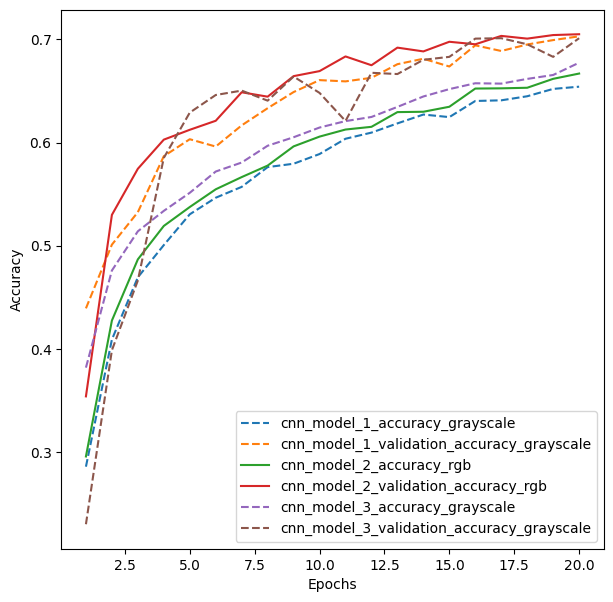

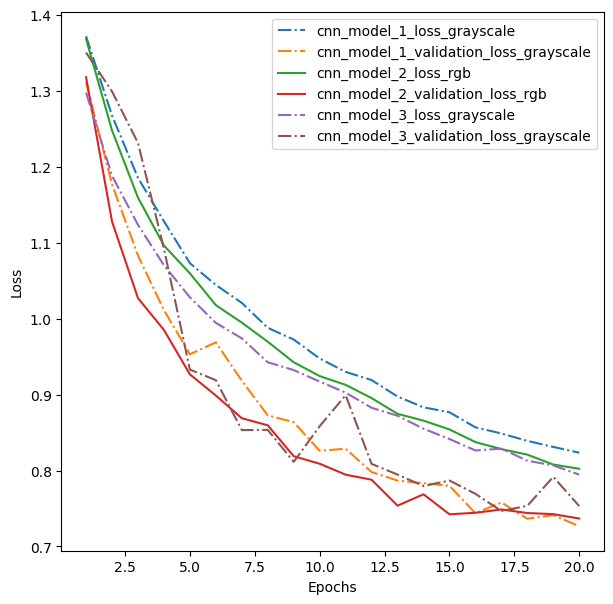

In [73]:
#plot training and validation accuracies and loss
dict_hist_3 = cnn_model_3_restored_history

list_epoch = [i for i in range(1,21)]

plt.figure(figsize = (7,7))

plt.plot(list_epoch, dict_hist['accuracy'], ls = '--', label = 'cnn_model_1_accuracy_grayscale')
plt.plot(list_epoch, dict_hist['val_accuracy'], ls = '--', label = 'cnn_model_1_validation_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_2['accuracy'], label = 'cnn_model_2_accuracy_rgb')
plt.plot(list_epoch, dict_hist_2['val_accuracy'], label = 'cnn_model_2_validation_accuracy_rgb')
plt.plot(list_epoch, dict_hist_3['accuracy'], ls = '--', label = 'cnn_model_3_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_3['val_accuracy'], ls = '--', label = 'cnn_model_3_validation_accuracy_grayscale')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('cnn_model_3_acc.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(7,7))
plt.plot(list_epoch, dict_hist['loss'], ls='-.', label='cnn_model_1_loss_grayscale')
plt.plot(list_epoch, dict_hist['val_loss'], ls='-.', label='cnn_model_1_validation_loss_grayscale')
plt.plot(list_epoch, dict_hist_2['loss'],  label='cnn_model_2_loss_rgb')
plt.plot(list_epoch, dict_hist_2['val_loss'],  label='cnn_model_2_validation_loss_rgb')
plt.plot(list_epoch, dict_hist_3['loss'], ls='-.', label='cnn_model_3_loss_grayscale')
plt.plot(list_epoch, dict_hist_3['val_loss'], ls='-.', label='cnn_model_3_validation_loss_grayscale')

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('cnn_model_3_loss.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

**Observations and Insights:__**
1. The third convolutional neural network with one more layer (higher depth), batch normalization, and a silu activation function converges to the same accuracy and loss as the second model
2. The training and validation trend for the third model with each epoch seems unstable compared to the smooth convergence of the first 2 CNN models

In [74]:
#Fetch a single batch of data
test_images, test_labels = next(test_set)
accuracy_cnn_model_3 = cnn_model_3_restored.evaluate(test_images, test_labels, verbose=2)
print(f"Model accuracy on the test batch:{accuracy_cnn_model_3}")

4/4 - 1s - 324ms/step - accuracy: 0.7266 - loss: 0.6614
Model accuracy on the test batch:[0.6613636016845703, 0.7265625]


**Observations and Insights:__**
1. The accuracy on test data is 72.7% which is in good agreement with the training and validation results of the third CNN model

In [75]:
pred_cnn_model_3 = cnn_model_3_restored.predict(test_images)
pred_cnn_model_3 = np.argmax(pred_cnn_model_3 , axis=1)
y_true = np.argmax(test_labels, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [76]:
print(train_set.class_indices)

{'happy': 0, 'sad': 1, 'neutral': 2, 'surprise': 3}


              precision    recall  f1-score   support

           0       0.73      0.84      0.78        32
           1       0.69      0.56      0.62        32
           2       0.60      0.75      0.67        32
           3       0.96      0.75      0.84        32

    accuracy                           0.73       128
   macro avg       0.75      0.73      0.73       128
weighted avg       0.75      0.73      0.73       128



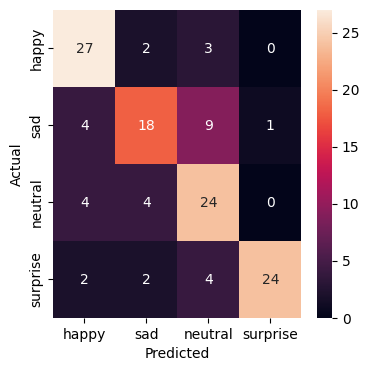

In [78]:
#plot confusion matrix from the first model
metrics_score(y_true,pred_cnn_model_3,'cnn_model_3')

**Observations and Insights:__**
1. The third model has lower accuracy 72.7% compared to the first model which had 75.8%.
2. The F1-scores for the first model are better than the third CNN model

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


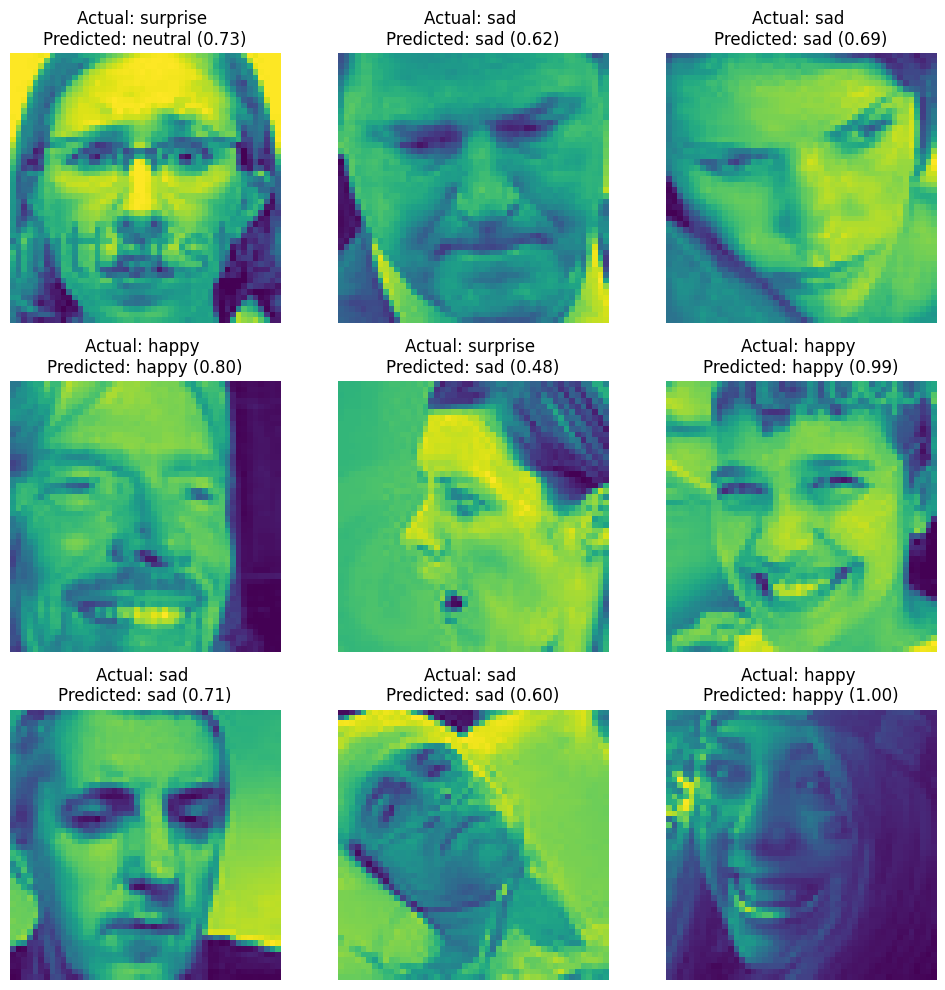

In [81]:
visualizeImages(cnn_model_3,1,'CNN_Model_3')

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons? **The models struggle to classify sad and neutral faces correctly. This is because the facial features for these emotions closely resemble one another e.g. a closed mouth**
* Which Color mode showed better overall performance? **The perfomance is matched for training on either rgb or grayscale** What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white? **Grayscale image models should be used if possible because:**
1. The original images are grayscale - there is no rgb information
2. Emotions are strongly influenced by lines and edges e.g a smile verses a suprise face. So color does not play a major role in determining emotions rather the facial features illustrated by lines, curves, edges contribute most.

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [82]:
#Clear backend and assign random seed
from tensorflow.keras import backend as K
K.clear_session()
tf.random.set_seed(42)

In [83]:
batch_size = 128
folder_path = "Facial_emotion_images/"
classCategories = ['happy','sad','neutral','surprise']

#Parameters for training for ImageDataGenerator
datagen_train_params = {
    "horizontal_flip": True,
     "brightness_range": (0.0, 2.0),
     "rescale": 1.0/255,
     "shear_range": 0.3
    }

#Parameters for validation and test for ImageDataGenerator
datagen_val_test_params = {"rescale": 1.0/255}

datagen_train = ImageDataGenerator(**datagen_train_params)
datagen_val = ImageDataGenerator(**datagen_val_test_params)
datagen_test = ImageDataGenerator(**datagen_val_test_params)

def create_dataset(datagen, folder_name):
  return datagen.flow_from_directory(folder_path + folder_name,
                                              target_size = (picture_size, picture_size),
                                              color_mode="rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = classCategories,
                                              shuffle = True)

train_set = create_dataset(datagen_train,"train/")
validation_set = create_dataset(datagen_val,"validation/")
test_set = create_dataset(datagen_test,"test/")

Found 14445 images belonging to 4 classes.
Found 4922 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

VGG16 is a pretrained convolutional neural network that is widely used for image classification and feature extraction.

### **Importing the VGG16 Architecture**

In [84]:
#Import vgg16 architecture
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg_model = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

**Observations and Insights:__**
1. The VGG16 model has 14, 714, 688 trainable parameters
2. We import the first 5 blocks of the pre-trained model and we will add a fully connected classification portion to it.

The model architecture is:

1. Input layer 48 x 48 x 3 (rgb images)
2. First convolution layer (64 x 3 x 3 x 3) + 64 = 1792 parameters. This layer has 64 filters with a 3 x 3 kernel.
3. Second convolution layer (64 x 3 x 3 x 64) + 64 = 36928 parameters. This layer has 64 filters with a 3 x 3 kernel.
4. Max pooling layer with size 2 x 2
5. Third convolutiononal layer (128 x 3 x 3 x 64) + 128 = 73856 parameters. This layer has 128 filters with a 3 x 3 kernel.
6. Fourth convolutional layer (128 x 3 x 3 x 128) + 128 = 147584 parameters. This layer has 128 filters with a 3 x 3 kernel.
7. Max pooling layer with size 2 x 2
8. Fifth convolutional layer (256 x 3 x 3 x 128) + 256 = 295168 parameters. This layer has 256 filters with a 3 x 3 kernel.
9. Sixth convolutional layer (256 x 3 x 3 x 256) + 256  = 590,080 parameters. This layer has 256 filters with a 3 x 3 kernel.
10. Seventh convolutional layer (256 x 3 x 3 x 256) + 256  = 590,080 parameters. This layer has 256 filters with a 3 x 3 kernel.
11. Max pooling layer with size 2 x 2
12. Eigth convolutional layer (512 x 3 x 3 x 256)+512 = 1180160 parameters. This layer has 512 filters with a 3 x 3 kernel.
13. Ninth convolutional layer (512 x 3 x 3 x 512) + 512 = 2359808 parameters. This layer has 512 filters with a 3 x 3 kernel.
14. Tenth convolutional layer (512 x 3 x 3 x 512) + 512 = 2359808 parameters. This layer has 512 filters with a 3 x 3 kernel.
15. Max pooling layer with size 2 x 2
16. Eleventh convolutional layer (512 x 3 x 3 x 512) + 512 = 2359808 parameters. This layer has 512 filters with a 3 x 3 kernel.
17. Twelfth convolutional layer (512 x 3 x 3 x 512) + 512 = 2359808 parameters. This layer has 512 filters with a 3 x 3 kernel.
18. Thirteenth convolutional layer (512 x 3 x 3 x 512) + 512 = 2359808 parameters. This layer has 512 filters with a 3 x 3 kernel.
19. Max pooling layer with size 3 x 3

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [85]:
transfer_layer = vgg_model.get_layer('block5_pool')

vgg_model.trainable = False

#Add classification layer
x = Flatten()(transfer_layer.output)

x = Dense(256, activation = 'relu')(x)

x = Dense(128, activation = 'relu')(x)

x = Dropout(0.3)(x)

x = Dense(64, activation = 'relu')(x)

x = BatchNormalization()(x)

vgg16_pred = Dense(4, activation = 'softmax')(x)

#Initialize the model
vgg_model_4 = Model(vgg_model.input, vgg16_pred)

### **Compiling and Training the VGG16 Model**

In [86]:
#Compiling the model
vgg_model_4.compile(loss = 'categorical_crossentropy',
                    optimizer = Adam(learning_rate = 0.0005),
                    metrics = ['accuracy'])

In [87]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vgg_model_4.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [88]:
#Fitting the model
vgg_model_4_history = vgg_model_4.fit(train_set,validation_data = validation_set, epochs=20)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 280ms/step - accuracy: 0.2989 - loss: 1.5841 - val_accuracy: 0.4319 - val_loss: 1.2576
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.3918 - loss: 1.2941 - val_accuracy: 0.4752 - val_loss: 1.1959
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.4395 - loss: 1.2257 - val_accuracy: 0.5197 - val_loss: 1.1144
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.4528 - loss: 1.2089 - val_accuracy: 0.5221 - val_loss: 1.0958
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.4555 - loss: 1.1923 - val_accuracy: 0.5335 - val_loss: 1.0819
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.4684 - loss: 1.1768 - val_accuracy: 0.5356 - val_loss: 1.0676
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.4705 - loss: 1.1685 - val_accuracy: 0.5439 - val_loss: 1.0705
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.4779 - loss: 1

In [89]:
#Save training history
with open("vgg_model_4_training_history.json","w") as f:
  json.dump(vgg_model_4_history.history,f)

#Load training history
with open("vgg_model_4_training_history.json","r") as f:
  vgg_model_4_restored_history = json.load(f)

#save the trained model
vgg_model_4.save("vgg_model_4.keras")

vgg_model_4_restored = load_model("vgg_model_4.keras")

### **Evaluating the VGG16 model**

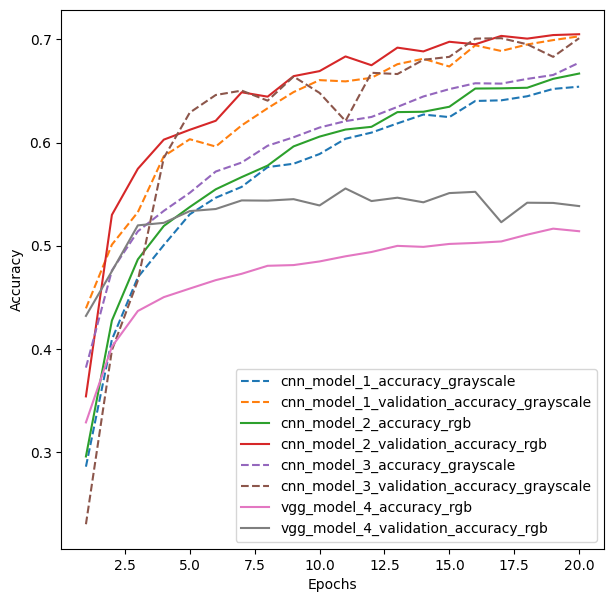

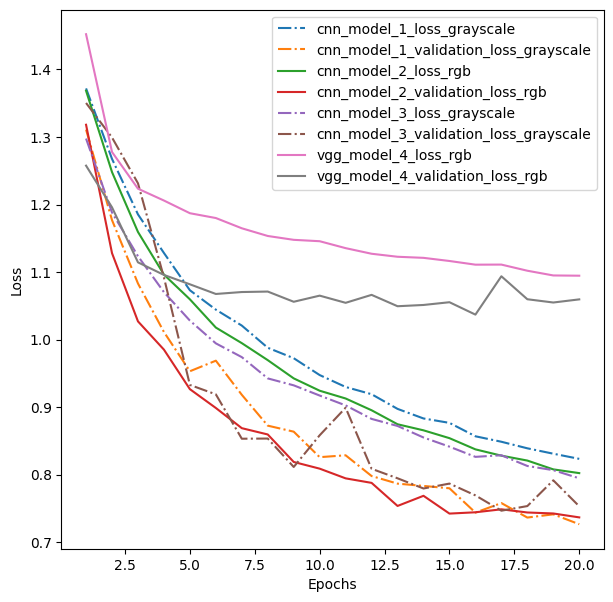

In [90]:
#plot training and validation accuracies and loss
dict_hist_4 = vgg_model_4_restored_history

list_epoch = [i for i in range(1,21)]

plt.figure(figsize = (7,7))

plt.plot(list_epoch, dict_hist['accuracy'], ls = '--', label = 'cnn_model_1_accuracy_grayscale')
plt.plot(list_epoch, dict_hist['val_accuracy'], ls = '--', label = 'cnn_model_1_validation_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_2['accuracy'], label = 'cnn_model_2_accuracy_rgb')
plt.plot(list_epoch, dict_hist_2['val_accuracy'], label = 'cnn_model_2_validation_accuracy_rgb')
plt.plot(list_epoch, dict_hist_3['accuracy'], ls = '--', label = 'cnn_model_3_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_3['val_accuracy'], ls = '--', label = 'cnn_model_3_validation_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_4['accuracy'],  label = 'vgg_model_4_accuracy_rgb')
plt.plot(list_epoch, dict_hist_4['val_accuracy'],  label = 'vgg_model_4_validation_accuracy_rgb')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('vgg_model_4_acc.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(7,7))
plt.plot(list_epoch, dict_hist['loss'], ls='-.', label='cnn_model_1_loss_grayscale')
plt.plot(list_epoch, dict_hist['val_loss'], ls='-.', label='cnn_model_1_validation_loss_grayscale')
plt.plot(list_epoch, dict_hist_2['loss'],  label='cnn_model_2_loss_rgb')
plt.plot(list_epoch, dict_hist_2['val_loss'],  label='cnn_model_2_validation_loss_rgb')
plt.plot(list_epoch, dict_hist_3['loss'], ls='-.', label='cnn_model_3_loss_grayscale')
plt.plot(list_epoch, dict_hist_3['val_loss'], ls='-.', label='cnn_model_3_validation_loss_grayscale')
plt.plot(list_epoch, dict_hist_4['loss'],  label='vgg_model_4_loss_rgb')
plt.plot(list_epoch, dict_hist_4['val_loss'],  label='vgg_model_4_validation_loss_rgb')

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('vgg_model_4_loss.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

**Think About It:** - **Observations and Insights:__**

- What do you infer from the general trend in the training performance? **Importing VGG16 pre-trained and adding a classification layer, does not yield a model with good accuracy compared to the training CNN models developed so far. ***
- Is the training accuracy consistently improving? ***The training accuracy improves at the early epochs but plateaus at 50% for both training and validation accuracy while other CNN models attained accuracies above 60%. ***
- Is the validation accuracy also improving similarly? ***The validation accuracy improves at the early epochs but also plateaus at 50% while other CNN models attained accuracies above 60%. ***

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

In [91]:
#Clear backend and assign random seed
from tensorflow.keras import backend as K
K.clear_session()
tf.random.set_seed(42)

In [92]:
#Import vgg16 architecture
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg_model_5 = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg_model_5.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [93]:
transfer_layer_5 = vgg_model_5.get_layer('block5_pool')

for layer in vgg_model_5.layers[:-4]:#Freeze all layers except the last 4
  layer.trainable = False

#Add classification layer
x_model_5 = Flatten()(transfer_layer_5.output)

x_model_5 = Dense(256, activation = 'relu')(x_model_5)

x_model_5 = Dense(128, activation = 'relu')(x_model_5)

x_model_5 = Dropout(0.3)(x_model_5)

x_model_5 = Dense(64, activation = 'relu')(x_model_5)

x_model_5 = BatchNormalization()(x_model_5)

vgg16_pred_model_5 = Dense(4, activation = 'softmax')(x_model_5)

#Initialize the model
vgg_model_5 = Model(vgg_model_5.input, vgg16_pred_model_5)

In [94]:
#Compiling the model
vgg_model_5.compile(loss = 'categorical_crossentropy',
                    optimizer = Adam(learning_rate = 0.0005),
                    metrics = ['accuracy'])

In [95]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vgg_model_5.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [96]:
#Fitting the model
vgg_model_5_history = vgg_model_5.fit(train_set,validation_data = validation_set, epochs=20)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 31s 214ms/step - accuracy: 0.3204 - loss: 1.5930 - val_accuracy: 0.5049 - val_loss: 1.2176
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.4715 - loss: 1.1805 - val_accuracy: 0.4754 - val_loss: 1.2551
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.5543 - loss: 1.0324 - val_accuracy: 0.5740 - val_loss: 0.9679
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.5669 - loss: 1.0051 - val_accuracy: 0.6028 - val_loss: 0.9440
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.5869 - loss: 0.9649 - val_accuracy: 0.6499 - val_loss: 0.8805
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.6117 - loss: 0.9115 - val_accuracy: 0.6660 - val_loss: 0.7990
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.6226 - loss: 0.8935 - val_accuracy: 0.5933 - val_loss: 0.9880
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.6459 - loss: 0

In [97]:
#Save training history
with open("vgg_model_5_training_history.json","w") as f:
  json.dump(vgg_model_5_history.history,f)

#Load training history
with open("vgg_model_5_training_history.json","r") as f:
  vgg_model_5_restored_history = json.load(f)

#save the trained model
vgg_model_5.save("vgg_model_5.keras")

vgg_model_5_restored = load_model("vgg_model_5.keras")

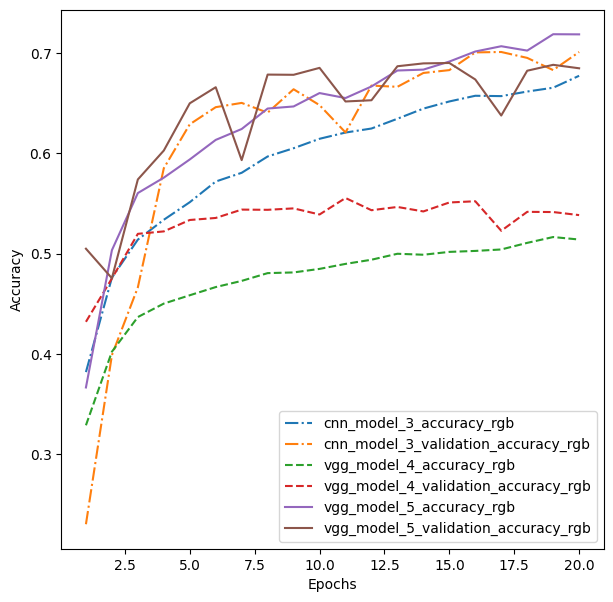

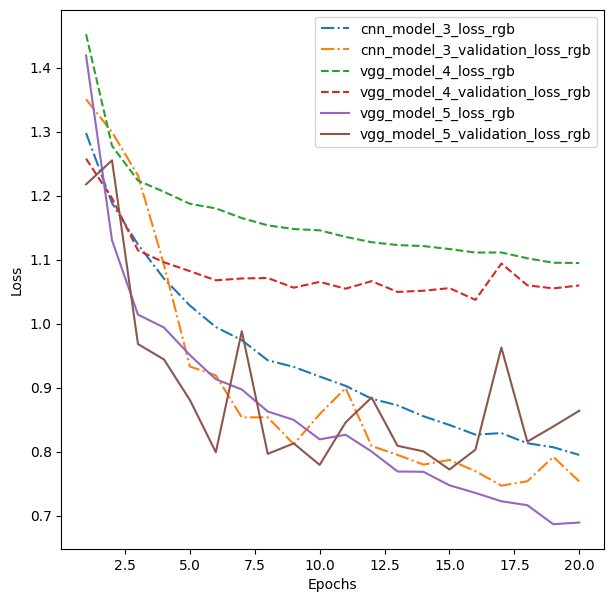

In [98]:
#plot training and validation accuracies and loss
dict_hist_5 = vgg_model_5_restored_history

list_epoch = [i for i in range(1,21)]

plt.figure(figsize = (7,7))
plt.plot(list_epoch, dict_hist_3['accuracy'], ls = '-.', label = 'cnn_model_3_accuracy_rgb')
plt.plot(list_epoch, dict_hist_3['val_accuracy'], ls = '-.', label = 'cnn_model_3_validation_accuracy_rgb')
plt.plot(list_epoch, dict_hist_4['accuracy'], ls = '--', label = 'vgg_model_4_accuracy_rgb')
plt.plot(list_epoch, dict_hist_4['val_accuracy'], ls = '--', label = 'vgg_model_4_validation_accuracy_rgb')
plt.plot(list_epoch, dict_hist_5['accuracy'],  label = 'vgg_model_5_accuracy_rgb')
plt.plot(list_epoch, dict_hist_5['val_accuracy'],  label = 'vgg_model_5_validation_accuracy_rgb')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('vgg_model_5_acc.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(7,7))

plt.plot(list_epoch, dict_hist_3['loss'],  ls = '-.', label='cnn_model_3_loss_rgb')
plt.plot(list_epoch, dict_hist_3['val_loss'], ls = '-.', label='cnn_model_3_validation_loss_rgb')
plt.plot(list_epoch, dict_hist_4['loss'], ls = '--', label='vgg_model_4_loss_rgb')
plt.plot(list_epoch, dict_hist_4['val_loss'], ls = '--', label='vgg_model_4_validation_loss_rgb')
plt.plot(list_epoch, dict_hist_5['loss'],  label='vgg_model_5_loss_rgb')
plt.plot(list_epoch, dict_hist_5['val_loss'],  label='vgg_model_5_validation_loss_rgb')

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('vgg_model_5_loss.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

**Observations and Insights:__**
1. Allowing the last few layers of the VGG16 model to train on our dataset of faces improves model performance significantly
2. The latest VGG16 model (model 5) matches the > 60% accuracy on training and validation data sets
3. We see that the latest VGG16 model (model 5) is overfitting on the training data. For the last 10 epochs that accuracy on the training data is higher than the validation dataset showing that the model is not generalizing well to unseen datasets.

In [99]:
#Fetch a single batch of data
test_images, test_labels = next(test_set)
accuracy_vgg_model_5 = vgg_model_5_restored.evaluate(test_images, test_labels, verbose=2)
print(f"Model accuracy on the test batch:{accuracy_vgg_model_5}")

4/4 - 4s - 885ms/step - accuracy: 0.7344 - loss: 0.7386
Model accuracy on the test batch:[0.7386221289634705, 0.734375]


**Observations and Insights:__**
1. The accuracy on test data is 73.4% which is in good agreement with the training and validation results

In [100]:
pred_vgg_model_5 = vgg_model_5_restored.predict(test_images)
pred_vgg_model_5 = np.argmax(pred_vgg_model_5 , axis=1)
y_true = np.argmax(test_labels, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


In [101]:
print(train_set.class_indices)

{'happy': 0, 'sad': 1, 'neutral': 2, 'surprise': 3}


              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.71      0.62      0.67        32
           2       0.56      0.72      0.63        32
           3       1.00      0.78      0.88        32

    accuracy                           0.73       128
   macro avg       0.76      0.73      0.74       128
weighted avg       0.76      0.73      0.74       128



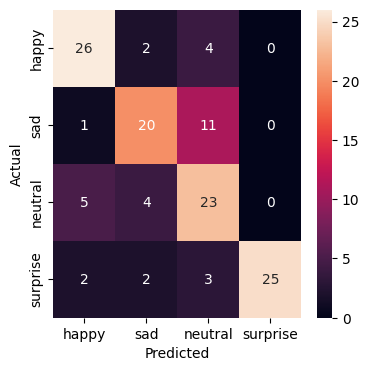

In [102]:
#plot confusion matrix from the first model
metrics_score(y_true,pred_vgg_model_5,'vgg_model_5')

**Observations and Insights:__**
1. The fifth model an of accuracy 73%.
2. Sad and neutral faces are classified incorrectly more often. Actual sad faces are classified as neutral and actual neutral faces are detected as sad.
3. Happy and surprise faces are classified correctly more often

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


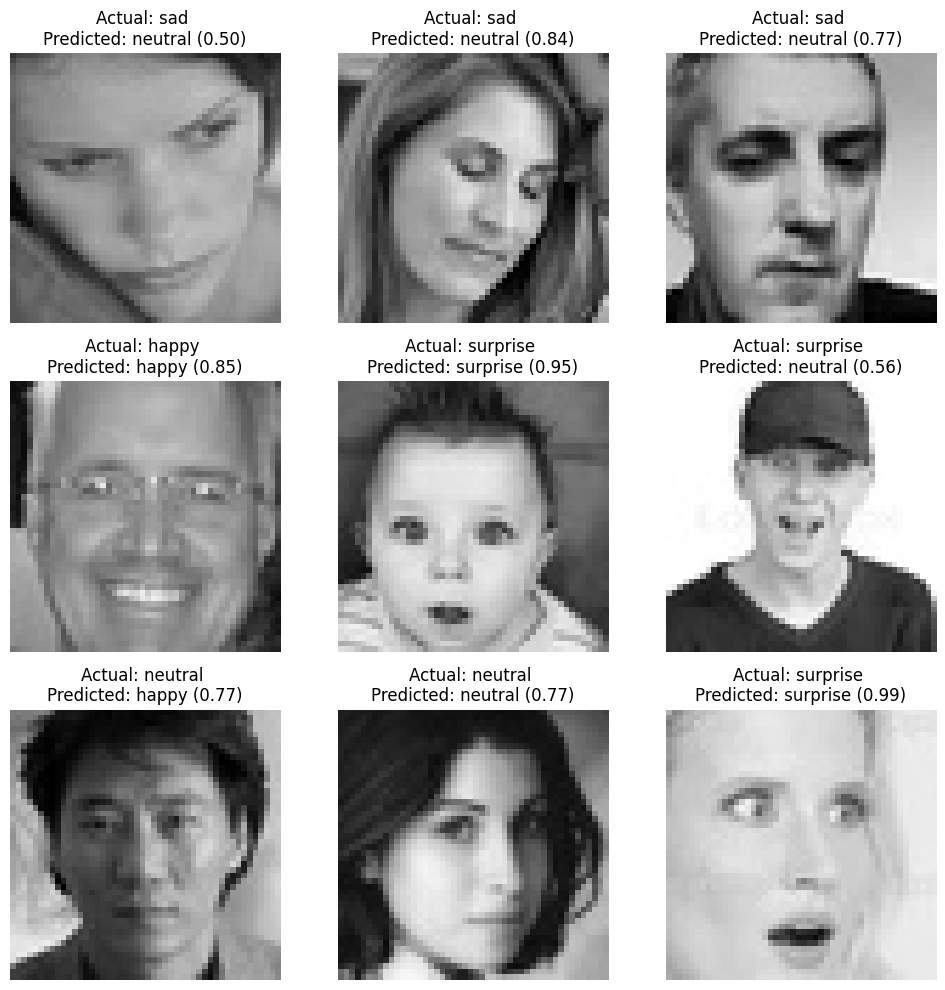

In [103]:
visualizeImages(vgg_model_5_restored,3,'vgg_model_5')

## **ResNet V2 Model**

ResNet V2 (Residual Network Version 2) is an enhanced version of the original ResNet architecture, a deep convolutional neural netwrork designed to solve the vanishing gradient problem improving training on deep networks. ResNet V2 incorporates residual connections and introduces Batch Normalization before the activation layer for better convergence.

In [104]:
#Clear backend and assign random seed
from tensorflow.keras import backend as K
K.clear_session()
tf.random.set_seed(42)

This model will use RGB images which were loaded before training the VGG16 model.

In [105]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet_model_6 = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet_model_6.summary()

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 48, 48, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 54, 54, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 24, 24, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 24, 24, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 24, 24, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 26, 26, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 12, 12, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 12, 12, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 12, 12, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 12, 12, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 12, 12, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 42,658,176 (162.73 MB)

 Trainable params: 42,552,832 (162.33 MB)

 Non-trainable params: 105,344 (411.50 KB)

In [106]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(Resnet_model_6, to_file="Resnet_model_plot.png", show_shapes = True, show_layer_names=True)
Image(filename="Resnet_model_plot.png")

Output hidden; open in https://colab.research.google.com to view.

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.
- We will import until **conv5_block3_add** layer of the Resnet model.

In [107]:
transfer_layer_Resnet = Resnet_model_6.get_layer('conv5_block3_add')
Resnet_model_6.trainable = False

#Add classification layer
x_model_6 = Flatten()(transfer_layer_Resnet.output)

x_model_6 = Dense(256, activation = 'relu')(x_model_6)

x_model_6 = Dense(128, activation = 'relu')(x_model_6)

x_model_6 = Dropout(0.3)(x_model_6)

x_model_6 = Dense(64, activation = 'relu')(x_model_6)

x_model_6 = BatchNormalization()(x_model_6)

Resnet_pred_model_6 = Dense(4, activation = 'softmax')(x_model_6)

#initialize the model
Resnet_model_6 = Model(Resnet_model_6.input, Resnet_pred_model_6)



### **Compiling and Training the Model**

In [108]:
#Compiling the model
Resnet_model_6.compile(loss = 'categorical_crossentropy',
                    optimizer = Adam(learning_rate = 0.0005),
                    metrics = ['accuracy'])

In [109]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Resnet_model_6.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [110]:
#Fitting the model
Resnet_model_6_history = Resnet_model_6.fit(train_set,validation_data = validation_set, epochs=20)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 56s 319ms/step - accuracy: 0.2528 - loss: 1.6185 - val_accuracy: 0.2456 - val_loss: 1.4073
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 180ms/step - accuracy: 0.2718 - loss: 1.4265 - val_accuracy: 0.3698 - val_loss: 1.3448
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - accuracy: 0.2755 - loss: 1.4003 - val_accuracy: 0.3698 - val_loss: 1.3450
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - accuracy: 0.2764 - loss: 1.3911 - val_accuracy: 0.3698 - val_loss: 1.3431
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - accuracy: 0.2735 - loss: 1.3881 - val_accuracy: 0.3698 - val_loss: 1.3445
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - accuracy: 0.2737 - loss: 1.3873 - val_accuracy: 0.3698 - val_loss: 1.3394
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 177ms/step - accuracy: 0.2822 - loss: 1.3853 - val_accuracy: 0.3698 - val_loss: 1.3450
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - accuracy: 0.2693 - loss: 1

### **Evaluating the ResNet Model**

In [111]:
#Save training history
with open("Resnet_model_6_training_history.json","w") as f:
  json.dump(Resnet_model_6_history.history,f)

#Load training history
with open("Resnet_model_6_training_history.json","r") as f:
  Resnet_model_6_history_restored = json.load(f)

#save the trained model
Resnet_model_6.save("Resnet_model_6.keras")

Resnet_model_6_restored = load_model("Resnet_model_6.keras")

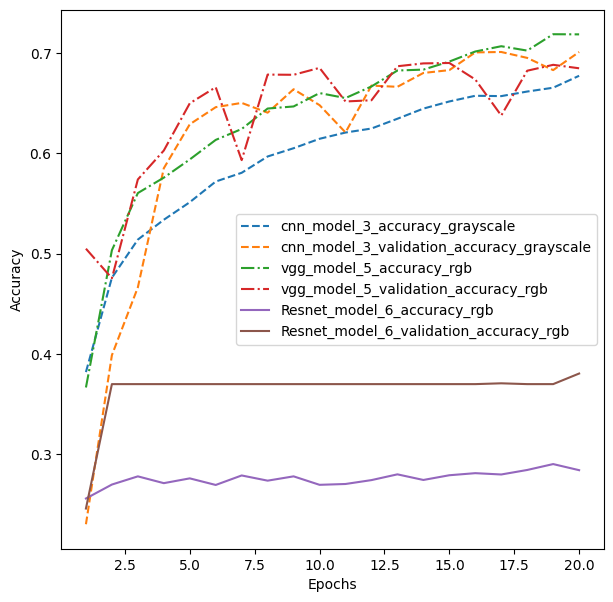

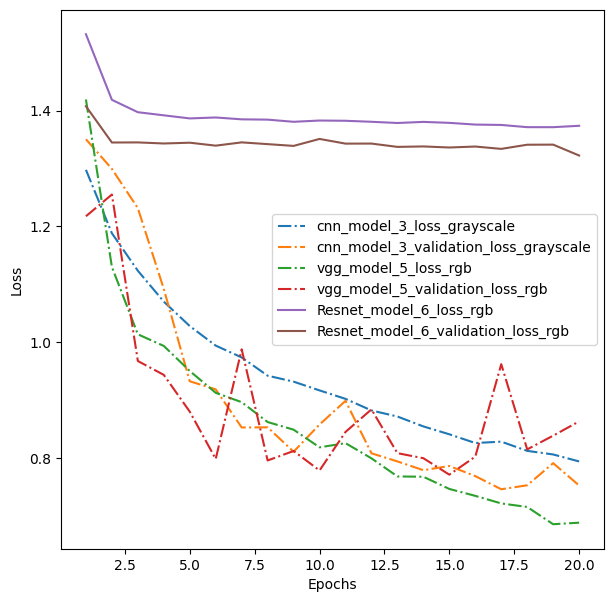

In [112]:
#plot training and validation accuracies and loss
dict_hist_6 = Resnet_model_6_history_restored

list_epoch = [i for i in range(1,21)]

plt.figure(figsize = (7,7))
plt.plot(list_epoch, dict_hist_3['accuracy'], ls = '--', label = 'cnn_model_3_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_3['val_accuracy'], ls = '--', label = 'cnn_model_3_validation_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_5['accuracy'],  ls = '-.',label = 'vgg_model_5_accuracy_rgb')
plt.plot(list_epoch, dict_hist_5['val_accuracy'], ls = '-.', label = 'vgg_model_5_validation_accuracy_rgb')
plt.plot(list_epoch, dict_hist_6['accuracy'],  label = 'Resnet_model_6_accuracy_rgb')
plt.plot(list_epoch, dict_hist_6['val_accuracy'],  label = 'Resnet_model_6_validation_accuracy_rgb')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('resnet_model_6_acc.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(7,7))

plt.plot(list_epoch, dict_hist_3['loss'], ls='-.', label='cnn_model_3_loss_grayscale')
plt.plot(list_epoch, dict_hist_3['val_loss'], ls='-.', label='cnn_model_3_validation_loss_grayscale')
plt.plot(list_epoch, dict_hist_5['loss'],ls = '-.',  label='vgg_model_5_loss_rgb')
plt.plot(list_epoch, dict_hist_5['val_loss'], ls = '-.', label='vgg_model_5_validation_loss_rgb')
plt.plot(list_epoch, dict_hist_6['loss'],  label='Resnet_model_6_loss_rgb')
plt.plot(list_epoch, dict_hist_6['val_loss'],  label='Resnet_model_6_validation_loss_rgb')

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('resnet_model_6_loss.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

**Observations and Insights:__**
1. Unfortunately importing Resnet V2 pre-trained model from the 'conv5_block3_add' layer and adding a classification layer does not yield good results. The model does not learn the features of the images after 20 epochs with the training and validation accuracy remaining at 20%.
2. There is no improvement in accuracy or validation loss from one epoch to another.
3. We need to improve the ability of the model to learn from the training images.
4. We will attempt allowing several layers of the pre-trained model to learn new weights from the training images and see if this improves model ability to predict facial emotions.

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

In [113]:
#Clear backend and assign random seed
from tensorflow.keras import backend as K
K.clear_session()
tf.random.set_seed(42)

In [114]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet_model_7 = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet_model_7.summary()

Model: "resnet101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 48, 48, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 54, 54, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 24, 24, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 24, 24, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 24, 24, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 26, 26, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 12, 12, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 12, 12, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 12, 12, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 12, 12, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 12, 12, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 42,658,176 (162.73 MB)

 Trainable params: 42,552,832 (162.33 MB)

 Non-trainable params: 105,344 (411.50 KB)

In [115]:
transfer_layer_Resnet = Resnet_model_7.get_layer('conv5_block3_add')

for layer in Resnet_model_7.layers:#UnFreeze all layers
  layer.trainable = True

#Add classification layer
x_model_7 = Flatten()(transfer_layer_Resnet.output)

x_model_7 = Dense(256, activation = 'relu')(x_model_7)

x_model_7 = Dense(128, activation = 'relu')(x_model_7)

x_model_7 = Dropout(0.4)(x_model_7)

x_model_7 = Dense(64, activation = 'relu')(x_model_7)

x_model_7 = BatchNormalization()(x_model_7)

Resnet_pred_model_7 = Dense(4, activation = 'softmax')(x_model_7)

#initialize the model
Resnet_model_7 = Model(Resnet_model_7.input, Resnet_pred_model_7)


In [116]:
#Compiling the model
Resnet_model_7.compile(loss = 'categorical_crossentropy',
                    optimizer = Adam(learning_rate = 0.0005),
                    metrics = ['accuracy'])

In [117]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Resnet_model_7.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [118]:
#Fitting the model
Resnet_model_7_history = Resnet_model_7.fit(train_set,validation_data = validation_set, epochs=20)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 160s 570ms/step - accuracy: 0.2586 - loss: 1.6461 - val_accuracy: 0.1871 - val_loss: 2.0807
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 182ms/step - accuracy: 0.3245 - loss: 1.3919 - val_accuracy: 0.2456 - val_loss: 2.0939
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 184ms/step - accuracy: 0.5104 - loss: 1.1093 - val_accuracy: 0.2296 - val_loss: 1.6406
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 182ms/step - accuracy: 0.5848 - loss: 0.9516 - val_accuracy: 0.4577 - val_loss: 1.1808
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 183ms/step - accuracy: 0.5998 - loss: 0.9443 - val_accuracy: 0.4348 - val_loss: 1.2299
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 182ms/step - accuracy: 0.6266 - loss: 0.8913 - val_accuracy: 0.6398 - val_loss: 0.8547
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 183ms/step - accuracy: 0.6765 - loss: 0.8013 - val_accuracy: 0.6837 - val_loss: 0.7875
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 184ms/step - accuracy: 0.6900 - loss: 

In [119]:
#Save training history
with open("Resnet_model_7_training_history.json","w") as f:
  json.dump(Resnet_model_7_history.history,f)

#Load training history
with open("Resnet_model_7_training_history.json","r") as f:
  Resnet_model_7_history_restored = json.load(f)

#save the trained model
Resnet_model_7.save("Resnet_model_7.keras")

Resnet_model_7_restored = load_model("Resnet_model_7.keras")

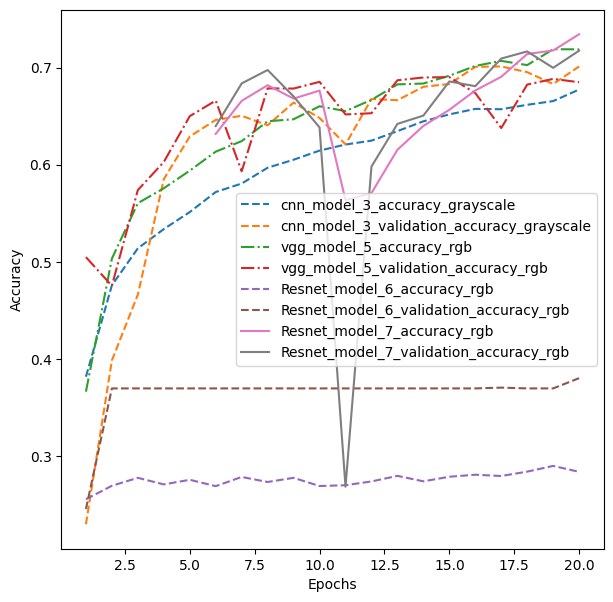

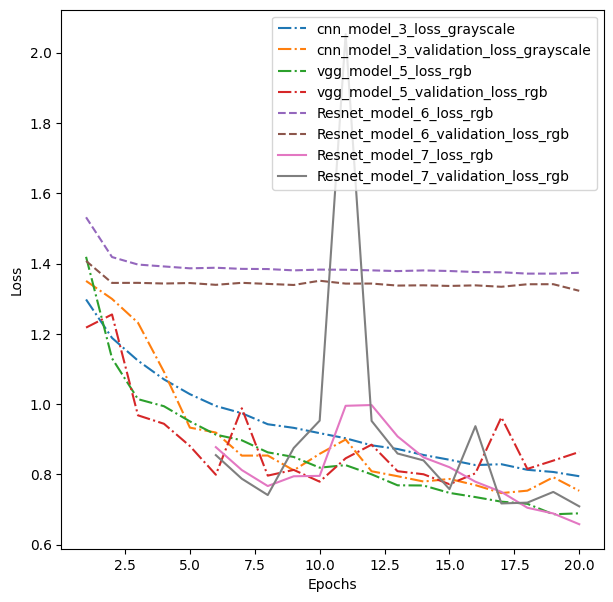

In [120]:
#plot training and validation accuracies and loss
dict_hist_7 = Resnet_model_7_history_restored

list_epoch = [i for i in range(1,21)]
list_epoch1 = [i for i in range(6,21)]

plt.figure(figsize = (7,7))
plt.plot(list_epoch, dict_hist_3['accuracy'], ls = '--', label = 'cnn_model_3_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_3['val_accuracy'], ls = '--', label = 'cnn_model_3_validation_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_5['accuracy'],  ls = '-.',label = 'vgg_model_5_accuracy_rgb')
plt.plot(list_epoch, dict_hist_5['val_accuracy'], ls = '-.', label = 'vgg_model_5_validation_accuracy_rgb')
plt.plot(list_epoch, dict_hist_6['accuracy'],  ls = '--', label = 'Resnet_model_6_accuracy_rgb')
plt.plot(list_epoch, dict_hist_6['val_accuracy'],  ls = '--', label = 'Resnet_model_6_validation_accuracy_rgb')
plt.plot(list_epoch1, dict_hist_7['accuracy'][5:],  label = 'Resnet_model_7_accuracy_rgb')
plt.plot(list_epoch1, dict_hist_7['val_accuracy'][5:],  label = 'Resnet_model_7_validation_accuracy_rgb')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('resnet_model_7_acc.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(7,7))
plt.plot(list_epoch, dict_hist_3['loss'], ls='-.', label='cnn_model_3_loss_grayscale')
plt.plot(list_epoch, dict_hist_3['val_loss'], ls='-.', label='cnn_model_3_validation_loss_grayscale')
plt.plot(list_epoch, dict_hist_5['loss'],ls = '-.',  label='vgg_model_5_loss_rgb')
plt.plot(list_epoch, dict_hist_5['val_loss'], ls = '-.', label='vgg_model_5_validation_loss_rgb')
plt.plot(list_epoch, dict_hist_6['loss'], ls = '--',  label='Resnet_model_6_loss_rgb')
plt.plot(list_epoch, dict_hist_6['val_loss'], ls = '--', label='Resnet_model_6_validation_loss_rgb')
plt.plot(list_epoch1, dict_hist_7['loss'][5:],  label='Resnet_model_7_loss_rgb')
plt.plot(list_epoch1, dict_hist_7['val_loss'][5:],  label='Resnet_model_7_validation_loss_rgb')

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('resnet_model_7_loss.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

In [121]:
#Fetch a single batch of data
test_images, test_labels = next(test_set)
accuracy_Resnet_model_7 = Resnet_model_7_restored.evaluate(test_images, test_labels, verbose=2)
print(f"Model accuracy on the test batch:{accuracy_Resnet_model_7}")

4/4 - 10s - 3s/step - accuracy: 0.7656 - loss: 0.5891
Model accuracy on the test batch:[0.5890548825263977, 0.765625]


In [122]:
pred_Resnet_model_7 = Resnet_model_7_restored.predict(test_images)
pred_Resnet_model_7 = np.argmax(pred_Resnet_model_7, axis=1)
y_true = np.argmax(test_labels, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step


In [123]:
print(train_set.class_indices)

{'happy': 0, 'sad': 1, 'neutral': 2, 'surprise': 3}


              precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.78      0.56      0.65        32
           2       0.58      0.88      0.70        32
           3       0.89      0.78      0.83        32

    accuracy                           0.77       128
   macro avg       0.80      0.77      0.77       128
weighted avg       0.80      0.77      0.77       128



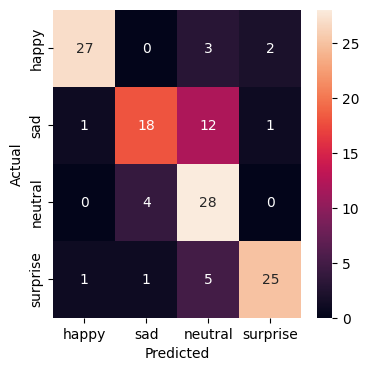

In [124]:
#plot confusion matrix from the first model
metrics_score(y_true,pred_Resnet_model_7,'Resnet_Model_7')

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


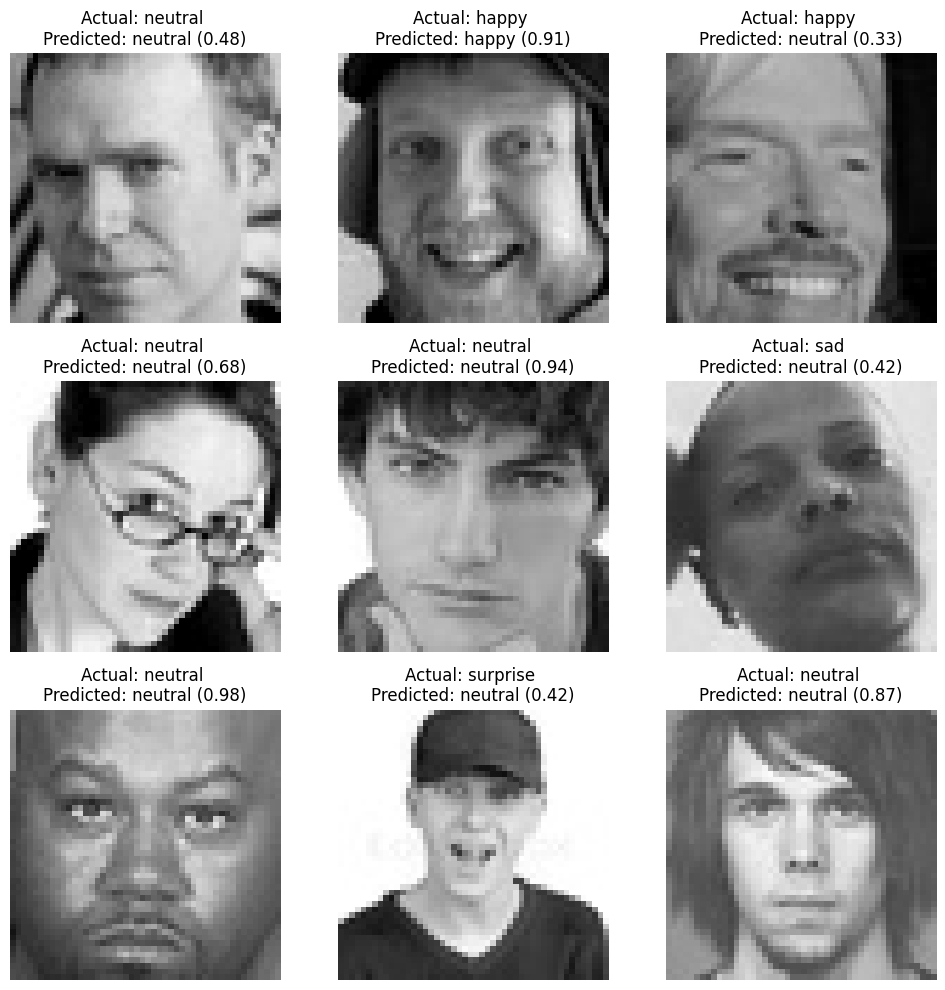

In [125]:
visualizeImages(Resnet_model_7_restored,3,'Resnet_Model_7')

## **EfficientNet Model**

In [126]:
#Clear backend and assign random seed
from tensorflow.keras import backend as K
K.clear_session()
tf.random.set_seed(42)

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [127]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet_model_8 = ap.EfficientNetV2B2(include_top=False, weights = "imagenet", input_shape = (48, 48, 3))

EfficientNet_model_8.summary()

35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "efficientnetv2-b2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 48, 48, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 48, 48, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 48, 48, 3)      │              0 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 24, 24, 32)     │            864 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 24, 24, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 24, 24, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 24, 24, 16)     │          4,608 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 24, 24, 16)     │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 24, 24, 16)     │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_conv      │ (None, 24, 24, 16)     │          2,304 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_bn        │ (None, 24, 24, 16)     │             64 │ block1b_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_activati… │ (None, 24, 24, 16)     │              0 │ block1b_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_drop (Dropout)    │ (None, 24, 24, 16)     │              0 │ block1b_project_activ… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_add (Add)         │ (None, 24, 24, 16)     │              0 │ block1b_drop[0][0],    │
│                           │                        │                │ block1a_project_activ… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv  

 Total params: 8,769,374 (33.45 MB)

 Trainable params: 8,687,086 (33.14 MB)

 Non-trainable params: 82,288 (321.44 KB)

In [128]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(EfficientNet_model_8, to_file="EfficientNet_model_plot.png", show_shapes = True, show_layer_names=True)
Image(filename="EfficientNet_model_plot.png")

Output hidden; open in https://colab.research.google.com to view.

In [129]:
transfer_layer_EfficientNet = EfficientNet_model_8.get_layer('block6j_expand_activation')
EfficientNet_model_8.trainable = False

#Add classification layer
x_model_8 = Flatten()(transfer_layer_EfficientNet.output)

x_model_8 = Dense(256, activation = 'relu')(x_model_8)

x_model_8 = Dense(128, activation = 'relu')(x_model_8)

x_model_8 = Dropout(0.3)(x_model_8)

x_model_8 = Dense(64, activation = 'relu')(x_model_8)

x_model_8 = BatchNormalization()(x_model_8)

EfficientNet_pred_model_8 = Dense(4, activation = 'softmax')(x_model_8)

#initialize the model
EfficientNet_model_8 = Model(EfficientNet_model_8.input, EfficientNet_pred_model_8)

### **Compiling and Training the Model**

In [130]:
#Compiling the model
EfficientNet_model_8.compile(loss = 'categorical_crossentropy',
                    optimizer = Adam(learning_rate = 0.0005),
                    metrics = ['accuracy'])

In [131]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./EfficientNet_model_8.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [132]:
#Fitting the model
EfficientNet_model_8_history = EfficientNet_model_8.fit(train_set,validation_data = validation_set, epochs=20)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 80s 429ms/step - accuracy: 0.2624 - loss: 1.6696 - val_accuracy: 0.2292 - val_loss: 1.4381
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - accuracy: 0.2626 - loss: 1.4526 - val_accuracy: 0.3698 - val_loss: 1.3568
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 178ms/step - accuracy: 0.2667 - loss: 1.4142 - val_accuracy: 0.2456 - val_loss: 1.3707
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 178ms/step - accuracy: 0.2741 - loss: 1.3933 - val_accuracy: 0.2456 - val_loss: 1.3737
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 177ms/step - accuracy: 0.2768 - loss: 1.3853 - val_accuracy: 0.3698 - val_loss: 1.3538
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 178ms/step - accuracy: 0.2782 - loss: 1.3858 - val_accuracy: 0.2456 - val_loss: 1.3584
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 178ms/step - accuracy: 0.2737 - loss: 1.3838 - val_accuracy: 0.3698 - val_loss: 1.3444
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 178ms/step - accuracy: 0.2827 - loss: 1

In [133]:
#Save training history
with open("EfficientNet_model_8_training_history.json","w") as f:
  json.dump(EfficientNet_model_8_history.history,f)

#Load training history
with open("EfficientNet_model_8_training_history.json","r") as f:
  EfficientNet_model_8_history_restored = json.load(f)

#save the trained model
EfficientNet_model_8.save("EfficientNet_model_8.keras")

EfficientNet_model_8_restored = load_model("EfficientNet_model_8.keras")

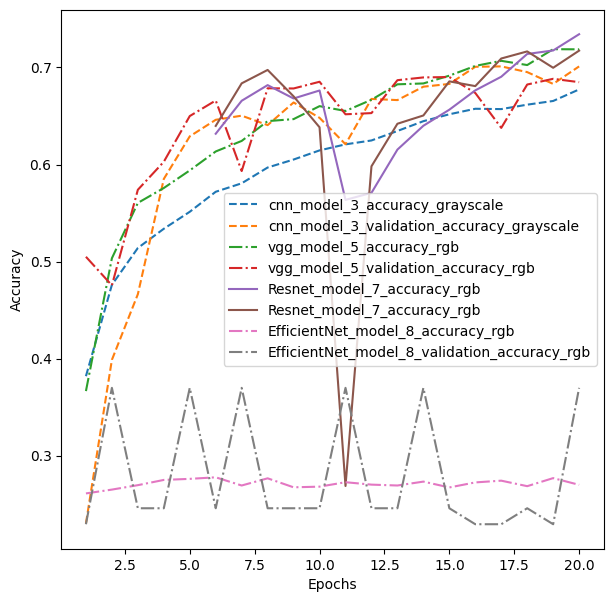

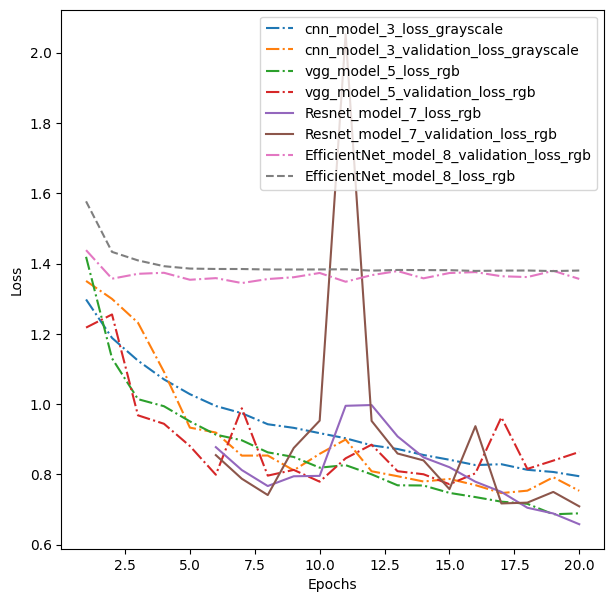

In [134]:
#plot training and validation accuracies and loss
dict_hist_8 = EfficientNet_model_8_history_restored

list_epoch = [i for i in range(1,21)]
list_epoch1 = [i for i in range(6,21)]

plt.figure(figsize = (7,7))
plt.plot(list_epoch, dict_hist_3['accuracy'], ls = '--', label = 'cnn_model_3_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_3['val_accuracy'], ls = '--', label = 'cnn_model_3_validation_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_5['accuracy'],  ls = '-.',label = 'vgg_model_5_accuracy_rgb')
plt.plot(list_epoch, dict_hist_5['val_accuracy'], ls = '-.', label = 'vgg_model_5_validation_accuracy_rgb')
plt.plot(list_epoch1, dict_hist_7['accuracy'][5:],  label = 'Resnet_model_7_accuracy_rgb')
plt.plot(list_epoch1, dict_hist_7['val_accuracy'][5:],  label = 'Resnet_model_7_accuracy_rgb')
plt.plot(list_epoch, dict_hist_8['accuracy'],  ls = '-.',label = 'EfficientNet_model_8_accuracy_rgb')
plt.plot(list_epoch, dict_hist_8['val_accuracy'], ls = '-.', label = 'EfficientNet_model_8_validation_accuracy_rgb')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('EfficientNet_model_8_acc.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(7,7))
plt.plot(list_epoch, dict_hist_3['loss'], ls='-.', label='cnn_model_3_loss_grayscale')
plt.plot(list_epoch, dict_hist_3['val_loss'], ls='-.', label='cnn_model_3_validation_loss_grayscale')
plt.plot(list_epoch, dict_hist_5['loss'],ls = '-.',  label='vgg_model_5_loss_rgb')
plt.plot(list_epoch, dict_hist_5['val_loss'], ls = '-.', label='vgg_model_5_validation_loss_rgb')
plt.plot(list_epoch1, dict_hist_7['loss'][5:],  label='Resnet_model_7_loss_rgb')
plt.plot(list_epoch1, dict_hist_7['val_loss'][5:],  label='Resnet_model_7_validation_loss_rgb')
plt.plot(list_epoch, dict_hist_8['val_loss'], ls = '-.', label='EfficientNet_model_8_validation_loss_rgb')
plt.plot(list_epoch, dict_hist_8['loss'], ls = '--',  label='EfficientNet_model_8_loss_rgb')

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('EfficientNet_model_8_loss.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

### **Evaluating the EfficientnetNet Model**

**Observations and Insights:__**
1. Unfortunately importing EfficientNet pre-trained model from the 'block6j_expand_activation' layer and adding a classification layer does not yield good results. The model does not learn the features of the images after 20 epochs with the training and validation accuracy remaining at ~27% and ~22% respectively.
2. There is no improvement in accuracy or validation loss from one epoch to another.
3. We need to improve the ability of the model to learn from the training images.
4. We will attempt allowing several layers of the pre-trained model to learn new weights from the training images and see if this improves model ability to predict facial emotions.

**Note: You can even go back and build your own architecture on top of the EfficientNet Transfer layer and see if you can improve the performance.**

In [135]:
#Clear backend and assign random seed
from tensorflow.keras import backend as K
K.clear_session()
tf.random.set_seed(42)

In [136]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet_model_9 = ap.EfficientNetV2B2(include_top=False, weights = "imagenet", input_shape = (48, 48, 3))

EfficientNet_model_9.summary()

Model: "efficientnetv2-b2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 48, 48, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 48, 48, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 48, 48, 3)      │              0 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 24, 24, 32)     │            864 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 24, 24, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 24, 24, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 24, 24, 16)     │          4,608 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 24, 24, 16)     │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 24, 24, 16)     │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_conv      │ (None, 24, 24, 16)     │          2,304 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_bn        │ (None, 24, 24, 16)     │             64 │ block1b_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_activati… │ (None, 24, 24, 16)     │              0 │ block1b_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_drop (Dropout)    │ (None, 24, 24, 16)     │              0 │ block1b_project_activ… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_add (Add)         │ (None, 24, 24, 16)     │              0 │ block1b_drop[0][0],    │
│                           │                        │                │ block1a_project_activ… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv  

 Total params: 8,769,374 (33.45 MB)

 Trainable params: 8,687,086 (33.14 MB)

 Non-trainable params: 82,288 (321.44 KB)

In [137]:
transfer_layer_EfficientNet = EfficientNet_model_9.get_layer('block6j_expand_activation')

for layer in EfficientNet_model_9.layers:#UnFreeze all layers
  layer.trainable = True

#Add classification layer
x_model_9 = Flatten()(transfer_layer_EfficientNet.output)

x_model_9 = Dense(256, activation = 'relu')(x_model_9)

x_model_9 = Dense(128, activation = 'relu')(x_model_9)

x_model_9 = Dropout(0.3)(x_model_9)

x_model_9 = Dense(64, activation = 'relu')(x_model_9)

x_model_9 = BatchNormalization()(x_model_9)

EfficientNet_pred_model_9 = Dense(4, activation = 'softmax')(x_model_9)

#initialize the model
EfficientNet_model_9 = Model(EfficientNet_model_9.input, EfficientNet_pred_model_9)

In [138]:
#Compiling the model
EfficientNet_model_9.compile(loss = 'categorical_crossentropy',
                    optimizer = Adam(learning_rate = 0.0005),
                    metrics = ['accuracy'])

In [139]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./EfficientNet_model_9.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [140]:
#Fitting the model
EfficientNet_model_9_history = EfficientNet_model_9.fit(train_set,validation_data = validation_set, epochs=20)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 174s 689ms/step - accuracy: 0.2720 - loss: 1.5936 - val_accuracy: 0.3598 - val_loss: 1.3068
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 182ms/step - accuracy: 0.3862 - loss: 1.3074 - val_accuracy: 0.4173 - val_loss: 1.2671
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 181ms/step - accuracy: 0.5139 - loss: 1.1092 - val_accuracy: 0.5404 - val_loss: 1.0676
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 182ms/step - accuracy: 0.5922 - loss: 0.9669 - val_accuracy: 0.5171 - val_loss: 1.0771
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 183ms/step - accuracy: 0.6220 - loss: 0.8893 - val_accuracy: 0.4980 - val_loss: 1.1049
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 180ms/step - accuracy: 0.6611 - loss: 0.8169 - val_accuracy: 0.3484 - val_loss: 1.3304
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 183ms/step - accuracy: 0.6815 - loss: 0.7811 - val_accuracy: 0.3157 - val_loss: 1.7008
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 182ms/step - accuracy: 0.6943 - loss: 

In [141]:
#Save training history
with open("EfficientNet_model_9_training_history.json","w") as f:
  json.dump(EfficientNet_model_9_history.history,f)

#Load training history
with open("EfficientNet_model_9_training_history.json","r") as f:
  EfficientNet_model_9_history_restored = json.load(f)

#save the trained model
EfficientNet_model_9.save("EfficientNet_model_9.keras")

EfficientNet_model_9_restored = load_model("EfficientNet_model_9.keras")

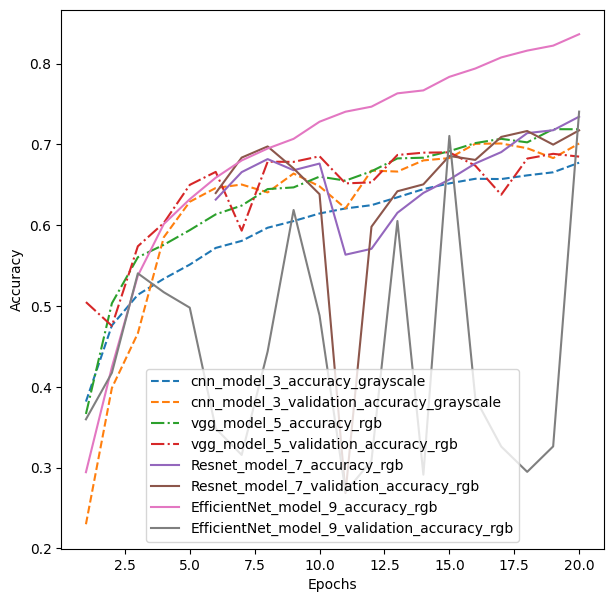

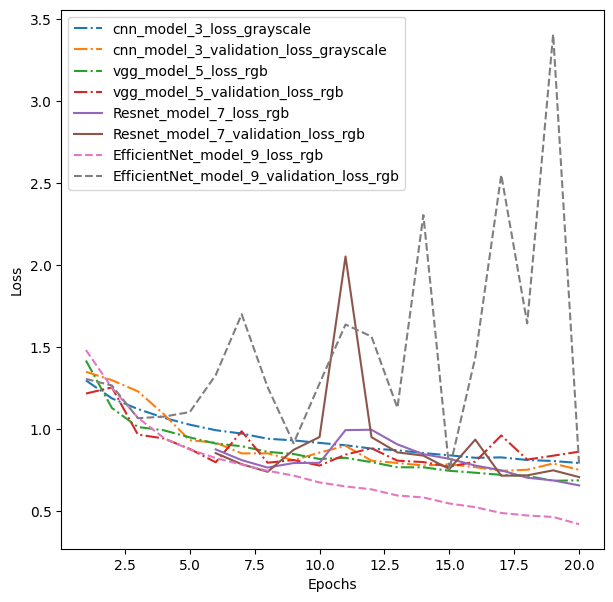

In [142]:
#plot training and validation accuracies and loss
dict_hist_9 = EfficientNet_model_9_history_restored

list_epoch = [i for i in range(1,21)]
list_epoch1 = [i for i in range(6,21)]

plt.figure(figsize = (7,7))
plt.plot(list_epoch, dict_hist_3['accuracy'], ls = '--', label = 'cnn_model_3_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_3['val_accuracy'], ls = '--', label = 'cnn_model_3_validation_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_5['accuracy'],  ls = '-.',label = 'vgg_model_5_accuracy_rgb')
plt.plot(list_epoch, dict_hist_5['val_accuracy'], ls = '-.', label = 'vgg_model_5_validation_accuracy_rgb')
plt.plot(list_epoch1, dict_hist_7['accuracy'][5:],  label = 'Resnet_model_7_accuracy_rgb')
plt.plot(list_epoch1, dict_hist_7['val_accuracy'][5:],  label = 'Resnet_model_7_validation_accuracy_rgb')
plt.plot(list_epoch, dict_hist_9['accuracy'],  label = 'EfficientNet_model_9_accuracy_rgb')
plt.plot(list_epoch, dict_hist_9['val_accuracy'],  label = 'EfficientNet_model_9_validation_accuracy_rgb')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('EfficientNet_model_9_acc.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(7,7))
plt.plot(list_epoch, dict_hist_3['loss'], ls='-.', label='cnn_model_3_loss_grayscale')
plt.plot(list_epoch, dict_hist_3['val_loss'], ls='-.', label='cnn_model_3_validation_loss_grayscale')
plt.plot(list_epoch, dict_hist_5['loss'],ls = '-.',  label='vgg_model_5_loss_rgb')
plt.plot(list_epoch, dict_hist_5['val_loss'], ls = '-.', label='vgg_model_5_validation_loss_rgb')
plt.plot(list_epoch1, dict_hist_7['loss'][5:],  label='Resnet_model_7_loss_rgb')
plt.plot(list_epoch1, dict_hist_7['val_loss'][5:],  label='Resnet_model_7_validation_loss_rgb')
plt.plot(list_epoch, dict_hist_9['loss'], ls = '--',  label='EfficientNet_model_9_loss_rgb')
plt.plot(list_epoch, dict_hist_9['val_loss'], ls = '--', label='EfficientNet_model_9_validation_loss_rgb')

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('EfficientNet_model_9_loss.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

In [143]:
#Fetch a single batch of data
test_images, test_labels = next(test_set)
accuracy_EfficientNet_model_9 = EfficientNet_model_9_restored.evaluate(test_images, test_labels, verbose=2)
print(f"Model accuracy on the test batch:{accuracy_EfficientNet_model_9}")

4/4 - 10s - 2s/step - accuracy: 0.7656 - loss: 0.7192
Model accuracy on the test batch:[0.7192100882530212, 0.765625]


In [144]:
pred_EfficientNet_model_9 = EfficientNet_model_9_restored.predict(test_images)
pred_EfficientNet_model_9 = np.argmax(pred_EfficientNet_model_9, axis=1)
y_true = np.argmax(test_labels, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step


In [145]:
print(train_set.class_indices)

{'happy': 0, 'sad': 1, 'neutral': 2, 'surprise': 3}


              precision    recall  f1-score   support

           0       0.73      0.94      0.82        32
           1       0.70      0.59      0.64        32
           2       0.69      0.75      0.72        32
           3       1.00      0.78      0.88        32

    accuracy                           0.77       128
   macro avg       0.78      0.77      0.76       128
weighted avg       0.78      0.77      0.76       128



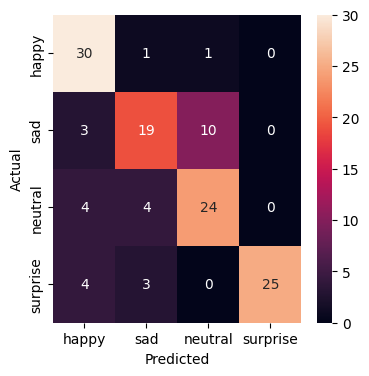

In [146]:
#plot confusion matrix from the first model
metrics_score(y_true,pred_EfficientNet_model_9,'EfficientNet_model_9')

####Observations
1. Allowing the weights of the EfficientNet model to adjust by training on our dataset improves performance. The overall EfficientNet model accuracy is 76.5%.
2. EfficientNet models struggles to distinguish between sad and neutral faces.

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


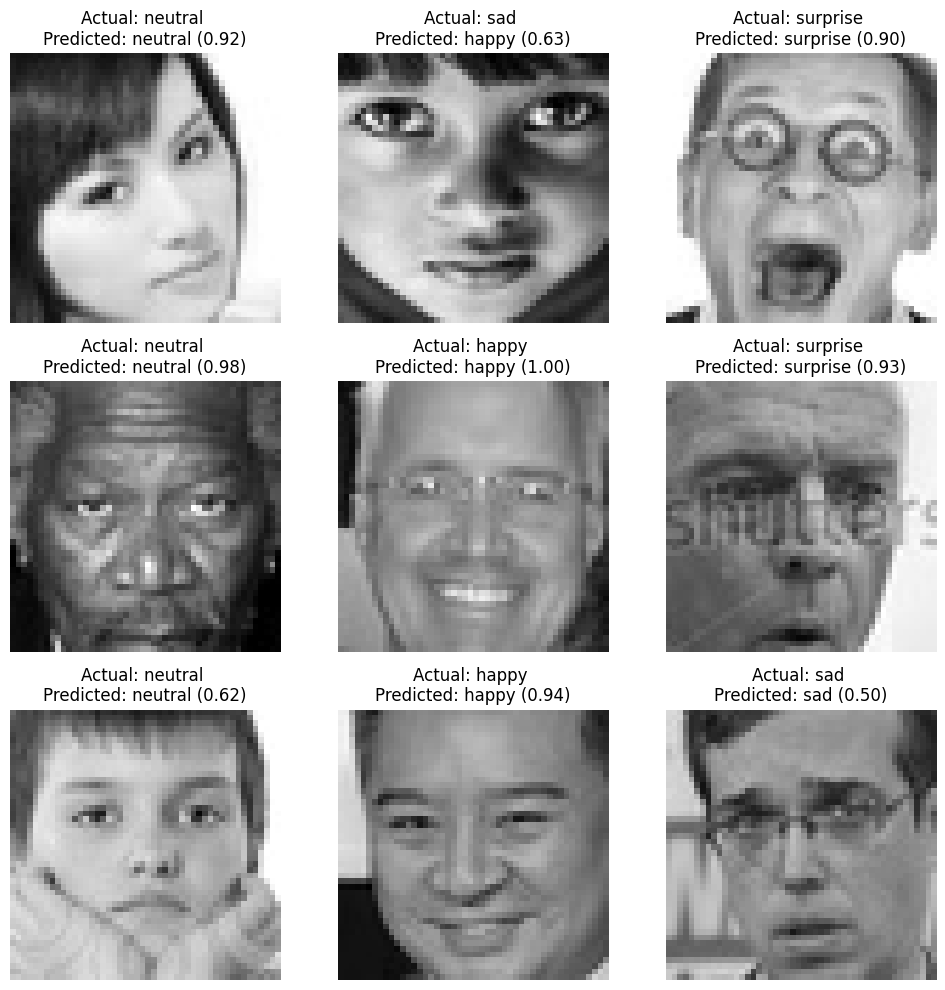

In [147]:
visualizeImages(EfficientNet_model_9_restored,3,'EfficientNet_model_9')

**Think About It:**

1. What is your overall performance of these Transfer Learning Architectures ***When we use the transfer learning architectures freezing all the pre-learned weights and simply adding a fully connected network before classification, these models do not learn the fatures of the facial images well. It is ONLY when we allow the models to train on our data set, adjusting the weights that they improve. ***

2. Can we draw a comparison of these models' performances. **Overall, the transfer learning architectures once trained on our data set, they improve. Resnet, VGG16, and EfficientNet achieve high accuracies, greater than 73% on test data. In general all models struggle to classify sad and neutral faces. The simple CNN models perform fairly well with accuracies > 70% and efficient run times compared to the transfer learning approaches.**

3. Are we satisfied with the accuracies that we have received? **The accuracies attained (>70%) on test data are reasable and useful especially since the simpler CNN models run efficiently. To improve the accuracy further, we can experiment with allowing the models to train on more epochs, training with larger datasets, data augmentation techniques, using hyper parameter tuning.**

* Do you think our issue lies with 'rgb' color_mode? **I don't believe so because at the start of the project, we trained 2 CNN models, one on grayscale and the other on rgb images. These models had similar accuracy and f1-scores. What has helped the most is allowing the weights from the transfer learning models to adjust when training with our facial images data set.**

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

In [148]:
#Clear backend and assign random seed
from tensorflow.keras import backend as K
K.clear_session()
tf.random.set_seed(42)

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [149]:
batch_size = 128
folder_path = "Facial_emotion_images/"
classCategories = ['happy','sad','neutral','surprise']

#Parameters for training for ImageDataGenerator
datagen_train_params = {
    "horizontal_flip": True,
     "brightness_range": (0.0, 2.0),
     "rescale": 1.0/255,
     "shear_range": 0.3
    }

#Parameters for validation and test for ImageDataGenerator
datagen_val_test_params = {"rescale": 1.0/255}

datagen_train = ImageDataGenerator(**datagen_train_params)
datagen_val = ImageDataGenerator(**datagen_val_test_params)
datagen_test = ImageDataGenerator(**datagen_val_test_params)

def create_dataset(datagen, folder_name):
  return datagen.flow_from_directory(folder_path + folder_name,
                                              target_size = (picture_size, picture_size),
                                              color_mode="grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = classCategories,
                                              shuffle = True)

train_set = create_dataset(datagen_train,"train/")
validation_set = create_dataset(datagen_val,"validation/")
test_set = create_dataset(datagen_test,"test/")

Found 14445 images belonging to 4 classes.
Found 4922 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [150]:
#method to create a convolutional neural network
def cnn_model_4():
  model = Sequential()

  #Add first Conv2D layer with 1024 filters, kernel of size 3, same padding and provide input shape
  model.add(Conv2D(filters=1024, kernel_size=(3,3), padding = 'same', input_shape = (48,48,1)))
  model.add(Activation('silu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  #Add second Conv2D layer with 512 filters, kernel of size 3, same padding and 'silu' activation
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding = 'same'))
  model.add(Activation('silu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  #Add third Conv2D layer with 256 filters, kernel of size 3, same padding and 'silu' activation
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding = 'same'))
  model.add(Activation('silu'))
  model.add(Dropout(0.2))
  #Add fourth Conv2D layer with 128 filters, kernel of size 3, same padding and 'silu' activation
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding = 'same'))
  model.add(Activation('silu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  #Add Batch Normalization
  model.add(BatchNormalization())
  #Add fifth Conv2D layer with 64 filters, kernel of size 3, same padding and 'silu' activation
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same'))
  model.add(Activation('silu'))
  model.add(Dropout(0.2))
  #Add Batch Normalization
  model.add(BatchNormalization())
  #Flatten the data to prepare for the fully connected component
  model.add(Flatten())
  #Add dense layer with 512 neurons and relu activation function, dropout of 0.4
  model.add(Dense(512))
  model.add(Activation('silu'))
  model.add(Dropout(0.4))
  #Add classification layer
  model.add(Dense(4, activation = 'softmax'))
  model.compile(optimizer = Adam(learning_rate=0.001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  return model

### **Compiling and Training the Model**

In [151]:
#Create first cnn model and publish summary
cnn_model_4 = cnn_model_4()

cnn_model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 1024)        │          10,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 1024)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 1024)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 1024)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 512)         │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,461,060 (28.46 MB)

 Trainable params: 7,460,676 (28.46 MB)

 Non-trainable params: 384 (1.50 KB)

In [152]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./cnn_model_4.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [153]:
#Fitting the model
cnn_model_4_history = cnn_model_4.fit(train_set,validation_data = validation_set, epochs=20)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 50s 268ms/step - accuracy: 0.2691 - loss: 1.8399 - val_accuracy: 0.2924 - val_loss: 1.3466
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 118ms/step - accuracy: 0.2820 - loss: 1.3854 - val_accuracy: 0.3708 - val_loss: 1.3283
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - accuracy: 0.2976 - loss: 1.3679 - val_accuracy: 0.4277 - val_loss: 1.2685
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 118ms/step - accuracy: 0.3292 - loss: 1.3494 - val_accuracy: 0.4447 - val_loss: 1.2598
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 118ms/step - accuracy: 0.3676 - loss: 1.3149 - val_accuracy: 0.4683 - val_loss: 1.2283
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - accuracy: 0.4079 - loss: 1.2681 - val_accuracy: 0.4147 - val_loss: 1.2407
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 118ms/step - accuracy: 0.4560 - loss: 1.2119 - val_accuracy: 0.5256 - val_loss: 1.1205
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 118ms/step - accuracy: 0.4811 - loss: 1

### **Evaluating the Model on Test Set**

In [154]:
#Save training history
with open("cnn_model_4_training_history.json","w") as f:
  json.dump(cnn_model_4_history.history,f)

#Load training history
with open("cnn_model_4_training_history.json","r") as f:
  cnn_model_4_restored_history = json.load(f)

#save the trained model
cnn_model_4.save("cnn_model_4.keras")

cnn_model_4_restored = load_model("cnn_model_4.keras")

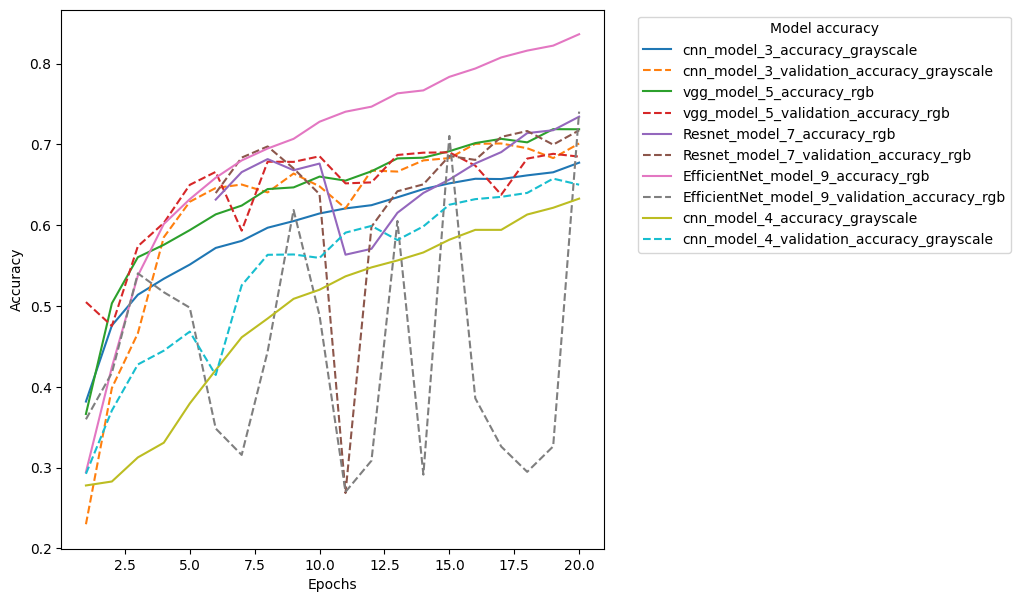

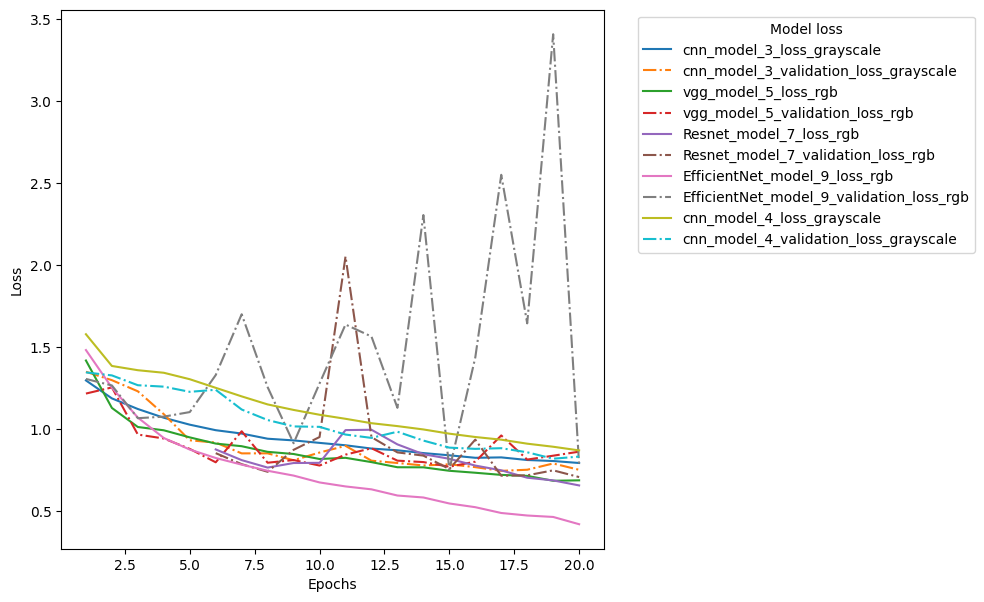

In [155]:
#plot training and validation accuracies and loss
dict_hist_10 = cnn_model_4_restored_history

list_epoch = [i for i in range(1,21)]
list_epoch1 = [i for i in range(6,21)]

plt.figure(figsize = (7,7))
plt.plot(list_epoch, dict_hist_3['accuracy'],  label = 'cnn_model_3_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_3['val_accuracy'], ls = '--', label = 'cnn_model_3_validation_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_5['accuracy'],  label = 'vgg_model_5_accuracy_rgb')
plt.plot(list_epoch, dict_hist_5['val_accuracy'], ls = '--', label = 'vgg_model_5_validation_accuracy_rgb')
plt.plot(list_epoch1, dict_hist_7['accuracy'][5:],  label = 'Resnet_model_7_accuracy_rgb')
plt.plot(list_epoch1, dict_hist_7['val_accuracy'][5:], ls = '--', label = 'Resnet_model_7_validation_accuracy_rgb')
plt.plot(list_epoch, dict_hist_9['accuracy'],  label = 'EfficientNet_model_9_accuracy_rgb')
plt.plot(list_epoch, dict_hist_9['val_accuracy'], ls = '--', label = 'EfficientNet_model_9_validation_accuracy_rgb')
plt.plot(list_epoch, dict_hist_10['accuracy'],  label = 'cnn_model_4_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_10['val_accuracy'], ls = '--', label = 'cnn_model_4_validation_accuracy_grayscale')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(title="Model accuracy", bbox_to_anchor=(1.05,1), loc="upper left")
plt.savefig('CNN_model_4_acc.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(7,7))
plt.plot(list_epoch, dict_hist_3['loss'], label='cnn_model_3_loss_grayscale')
plt.plot(list_epoch, dict_hist_3['val_loss'], ls='-.', label='cnn_model_3_validation_loss_grayscale')
plt.plot(list_epoch, dict_hist_5['loss'], label='vgg_model_5_loss_rgb')
plt.plot(list_epoch, dict_hist_5['val_loss'], ls = '-.', label='vgg_model_5_validation_loss_rgb')
plt.plot(list_epoch1, dict_hist_7['loss'][5:],  label='Resnet_model_7_loss_rgb')
plt.plot(list_epoch1, dict_hist_7['val_loss'][5:], ls='-.',  label='Resnet_model_7_validation_loss_rgb')
plt.plot(list_epoch, dict_hist_9['loss'],  label='EfficientNet_model_9_loss_rgb')
plt.plot(list_epoch, dict_hist_9['val_loss'], ls='-.',  label='EfficientNet_model_9_validation_loss_rgb')
plt.plot(list_epoch, dict_hist_10['loss'],  label='cnn_model_4_loss_grayscale')
plt.plot(list_epoch, dict_hist_10['val_loss'], ls='-.', label='cnn_model_4_validation_loss_grayscale')

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(title="Model loss", bbox_to_anchor=(1.05,1), loc="upper left")
plt.savefig('CNN_model_4_loss.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

In [156]:
#Fetch a single batch of data
test_images, test_labels = next(test_set)
accuracy_cnn_model_4 = cnn_model_4_restored.evaluate(test_images, test_labels, verbose=2)
print(f"Model accuracy on the test batch:{accuracy_cnn_model_4}")

4/4 - 2s - 434ms/step - accuracy: 0.6406 - loss: 0.8276
Model accuracy on the test batch:[0.8276438117027283, 0.640625]


In [157]:
pred_cnn_model_4 = cnn_model_4_restored.predict(test_images)
pred_cnn_model_4 = np.argmax(pred_cnn_model_4 , axis=1)
y_true = np.argmax(test_labels, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  


In [158]:
print(train_set.class_indices)

{'happy': 0, 'sad': 1, 'neutral': 2, 'surprise': 3}


              precision    recall  f1-score   support

           0       0.76      0.69      0.72        32
           1       0.44      0.50      0.47        32
           2       0.51      0.59      0.55        32
           3       0.96      0.78      0.86        32

    accuracy                           0.64       128
   macro avg       0.67      0.64      0.65       128
weighted avg       0.67      0.64      0.65       128



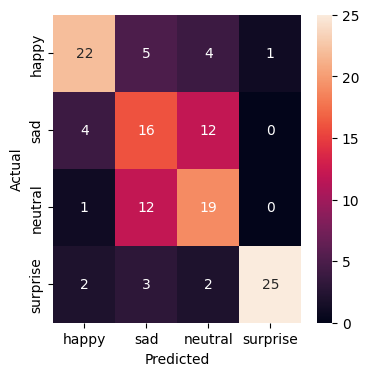

In [159]:
#plot confusion matrix from the first model
metrics_score(y_true,pred_cnn_model_4,'CNN_Model_4')

**Observations and Insights:__**
1. This CNN model has the highest number of parameters and has high accuracy of 64% on test data
2. Unfortunately, the f1-score on sad faces is low 47%. The model inaccurately categorizes actual sad faces as neutral


### **Fit the latest CNN model on RGB images for ease of comparison to other transfer learning models**

In [160]:
#Clear backend and assign random seed
from tensorflow.keras import backend as K
K.clear_session()
tf.random.set_seed(42)

In [161]:
batch_size = 128
folder_path = "Facial_emotion_images/"
classCategories = ['happy','sad','neutral','surprise']

#Parameters for training for ImageDataGenerator
datagen_train_params = {
    "horizontal_flip": True,
     "brightness_range": (0.0, 2.0),
     "rescale": 1.0/255,
     "shear_range": 0.3
    }

#Parameters for validation and test for ImageDataGenerator
datagen_val_test_params = {"rescale": 1.0/255}

datagen_train = ImageDataGenerator(**datagen_train_params)
datagen_val = ImageDataGenerator(**datagen_val_test_params)
datagen_test = ImageDataGenerator(**datagen_val_test_params)

def create_dataset(datagen, folder_name):
  return datagen.flow_from_directory(folder_path + folder_name,
                                              target_size = (picture_size, picture_size),
                                              color_mode="rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = classCategories,
                                              shuffle = True)

train_set = create_dataset(datagen_train,"train/")
validation_set = create_dataset(datagen_val,"validation/")
test_set = create_dataset(datagen_test,"test/")

Found 14445 images belonging to 4 classes.
Found 4922 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [162]:
#method to create a convolutional neural network
def cnn_model_5():
  model = Sequential()

  #Add first Conv2D layer with 1024 filters, kernel of size 3, same padding and provide input shape
  model.add(Conv2D(filters=1024, kernel_size=(3,3), padding = 'same', input_shape = (48,48,3)))
  model.add(Activation('silu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  #Add second Conv2D layer with 512 filters, kernel of size 3, same padding and 'silu' activation
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding = 'same'))
  model.add(Activation('silu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  #Add third Conv2D layer with 256 filters, kernel of size 3, same padding and 'silu' activation
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding = 'same'))
  model.add(Activation('silu'))
  model.add(Dropout(0.2))
  #Add fourth Conv2D layer with 128 filters, kernel of size 3, same padding and 'silu' activation
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding = 'same'))
  model.add(Activation('silu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  #Add Batch Normalization
  model.add(BatchNormalization())
  #Add fifth Conv2D layer with 64 filters, kernel of size 3, same padding and 'silu' activation
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same'))
  model.add(Activation('silu'))
  model.add(Dropout(0.2))
  #Add Batch Normalization
  model.add(BatchNormalization())
  #Flatten the data to prepare for the fully connected component
  model.add(Flatten())
  #Add dense layer with 512 neurons and relu activation function, dropout of 0.4
  model.add(Dense(512))
  model.add(Activation('silu'))
  model.add(Dropout(0.4))
  #Add classification layer
  model.add(Dense(4, activation = 'softmax'))
  model.compile(optimizer = Adam(learning_rate=0.001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  return model

In [163]:
#Create first cnn model and publish summary
cnn_model_5 = cnn_model_5()

cnn_model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 1024)        │          28,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 1024)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 1024)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 1024)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 512)         │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,479,492 (28.53 MB)

 Trainable params: 7,479,108 (28.53 MB)

 Non-trainable params: 384 (1.50 KB)

In [164]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./cnn_model_5.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [165]:
#Fitting the model
cnn_model_5_history = cnn_model_5.fit(train_set,validation_data = validation_set, epochs=20)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 39s 245ms/step - accuracy: 0.2652 - loss: 1.7938 - val_accuracy: 0.2850 - val_loss: 1.3915
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 177ms/step - accuracy: 0.2832 - loss: 1.3901 - val_accuracy: 0.4013 - val_loss: 1.3000
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 176ms/step - accuracy: 0.3131 - loss: 1.3642 - val_accuracy: 0.4348 - val_loss: 1.2780
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 176ms/step - accuracy: 0.3585 - loss: 1.3204 - val_accuracy: 0.2594 - val_loss: 1.6624
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 176ms/step - accuracy: 0.4120 - loss: 1.2685 - val_accuracy: 0.4573 - val_loss: 1.1820
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.4646 - loss: 1.1838 - val_accuracy: 0.5404 - val_loss: 1.0854
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 176ms/step - accuracy: 0.5060 - loss: 1.1287 - val_accuracy: 0.5685 - val_loss: 1.0107
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.5373 - loss: 1

In [166]:
#Save training history
with open("cnn_model_5_training_history.json","w") as f:
  json.dump(cnn_model_5_history.history,f)

#Load training history
with open("cnn_model_5_training_history.json","r") as f:
  cnn_model_5_restored_history = json.load(f)

#save the trained model
cnn_model_5.save("cnn_model_5.keras")

cnn_model_5_restored = load_model("cnn_model_5.keras")

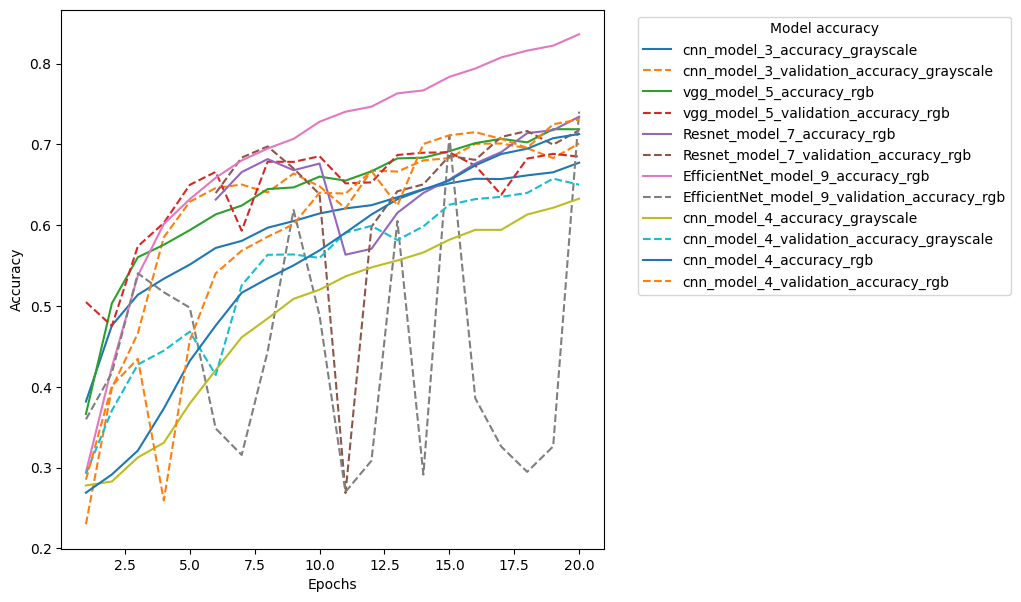

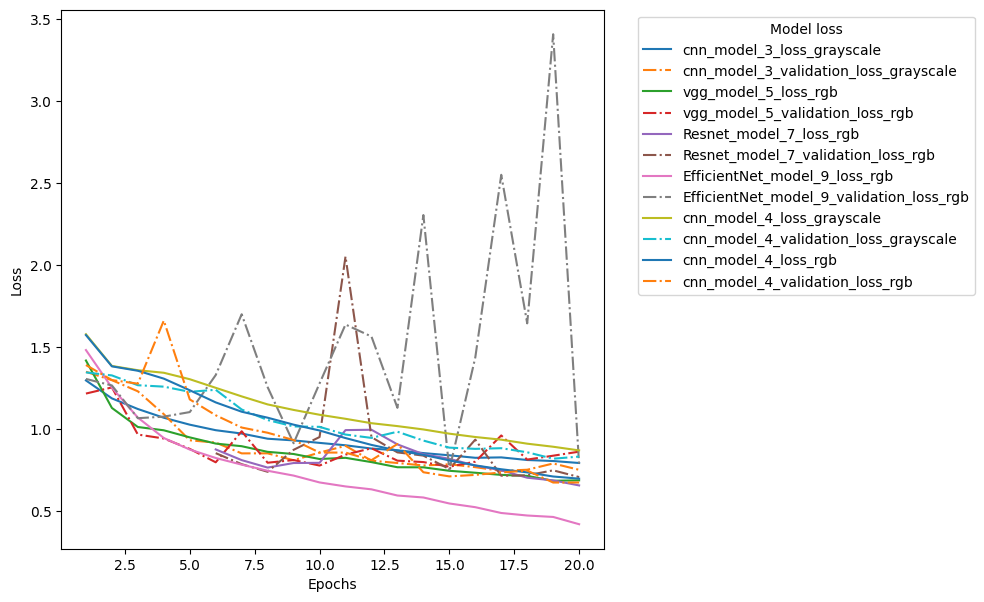

In [167]:
#plot training and validation accuracies and loss
dict_hist_11 = cnn_model_5_restored_history

list_epoch = [i for i in range(1,21)]
list_epoch1 = [i for i in range(6,21)]

plt.figure(figsize = (7,7))
plt.plot(list_epoch, dict_hist_3['accuracy'],  label = 'cnn_model_3_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_3['val_accuracy'], ls = '--', label = 'cnn_model_3_validation_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_5['accuracy'],  label = 'vgg_model_5_accuracy_rgb')
plt.plot(list_epoch, dict_hist_5['val_accuracy'], ls = '--', label = 'vgg_model_5_validation_accuracy_rgb')
plt.plot(list_epoch1, dict_hist_7['accuracy'][5:],  label = 'Resnet_model_7_accuracy_rgb')
plt.plot(list_epoch1, dict_hist_7['val_accuracy'][5:], ls = '--', label = 'Resnet_model_7_validation_accuracy_rgb')
plt.plot(list_epoch, dict_hist_9['accuracy'],  label = 'EfficientNet_model_9_accuracy_rgb')
plt.plot(list_epoch, dict_hist_9['val_accuracy'], ls = '--', label = 'EfficientNet_model_9_validation_accuracy_rgb')
plt.plot(list_epoch, dict_hist_10['accuracy'],  label = 'cnn_model_4_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_10['val_accuracy'], ls = '--', label = 'cnn_model_4_validation_accuracy_grayscale')
plt.plot(list_epoch, dict_hist_11['accuracy'],  label = 'cnn_model_4_accuracy_rgb')
plt.plot(list_epoch, dict_hist_11['val_accuracy'], ls = '--', label = 'cnn_model_4_validation_accuracy_rgb')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(title="Model accuracy", bbox_to_anchor=(1.05,1), loc="upper left")
plt.savefig('CNN_model_5_acc.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(7,7))
plt.plot(list_epoch, dict_hist_3['loss'], label='cnn_model_3_loss_grayscale')
plt.plot(list_epoch, dict_hist_3['val_loss'], ls='-.', label='cnn_model_3_validation_loss_grayscale')
plt.plot(list_epoch, dict_hist_5['loss'], label='vgg_model_5_loss_rgb')
plt.plot(list_epoch, dict_hist_5['val_loss'], ls = '-.', label='vgg_model_5_validation_loss_rgb')
plt.plot(list_epoch1, dict_hist_7['loss'][5:],  label='Resnet_model_7_loss_rgb')
plt.plot(list_epoch1, dict_hist_7['val_loss'][5:], ls='-.',  label='Resnet_model_7_validation_loss_rgb')
plt.plot(list_epoch, dict_hist_9['loss'],  label='EfficientNet_model_9_loss_rgb')
plt.plot(list_epoch, dict_hist_9['val_loss'], ls='-.',  label='EfficientNet_model_9_validation_loss_rgb')
plt.plot(list_epoch, dict_hist_10['loss'],  label='cnn_model_4_loss_grayscale')
plt.plot(list_epoch, dict_hist_10['val_loss'], ls='-.', label='cnn_model_4_validation_loss_grayscale')
plt.plot(list_epoch, dict_hist_11['loss'],  label='cnn_model_4_loss_rgb')
plt.plot(list_epoch, dict_hist_11['val_loss'], ls='-.', label='cnn_model_4_validation_loss_rgb')

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(title="Model loss", bbox_to_anchor=(1.05,1), loc="upper left")
plt.savefig('CNN_model_5_loss.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

In [168]:
#Fetch a single batch of data
test_images, test_labels = next(test_set)
accuracy_cnn_model_5 = cnn_model_5_restored.evaluate(test_images, test_labels, verbose=2)
print(f"Model accuracy on the test batch:{accuracy_cnn_model_5}")

4/4 - 1s - 349ms/step - accuracy: 0.7969 - loss: 0.5320
Model accuracy on the test batch:[0.5319868922233582, 0.796875]


In [169]:
pred_cnn_model_5 = cnn_model_5_restored.predict(test_images)
pred_cnn_model_5 = np.argmax(pred_cnn_model_5 , axis=1)
y_true = np.argmax(test_labels, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  


In [170]:
print(train_set.class_indices)

{'happy': 0, 'sad': 1, 'neutral': 2, 'surprise': 3}


              precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.68      0.66      0.67        32
           2       0.70      0.81      0.75        32
           3       0.96      0.84      0.90        32

    accuracy                           0.80       128
   macro avg       0.80      0.80      0.80       128
weighted avg       0.80      0.80      0.80       128



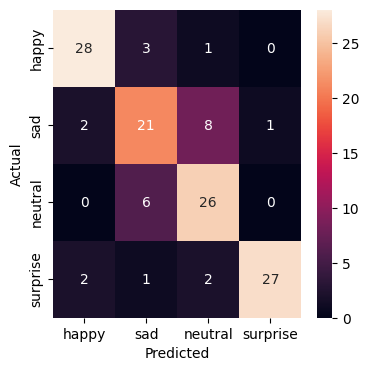

In [171]:
#plot confusion matrix from the first model
metrics_score(y_true,pred_cnn_model_5,'CNN_model_5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


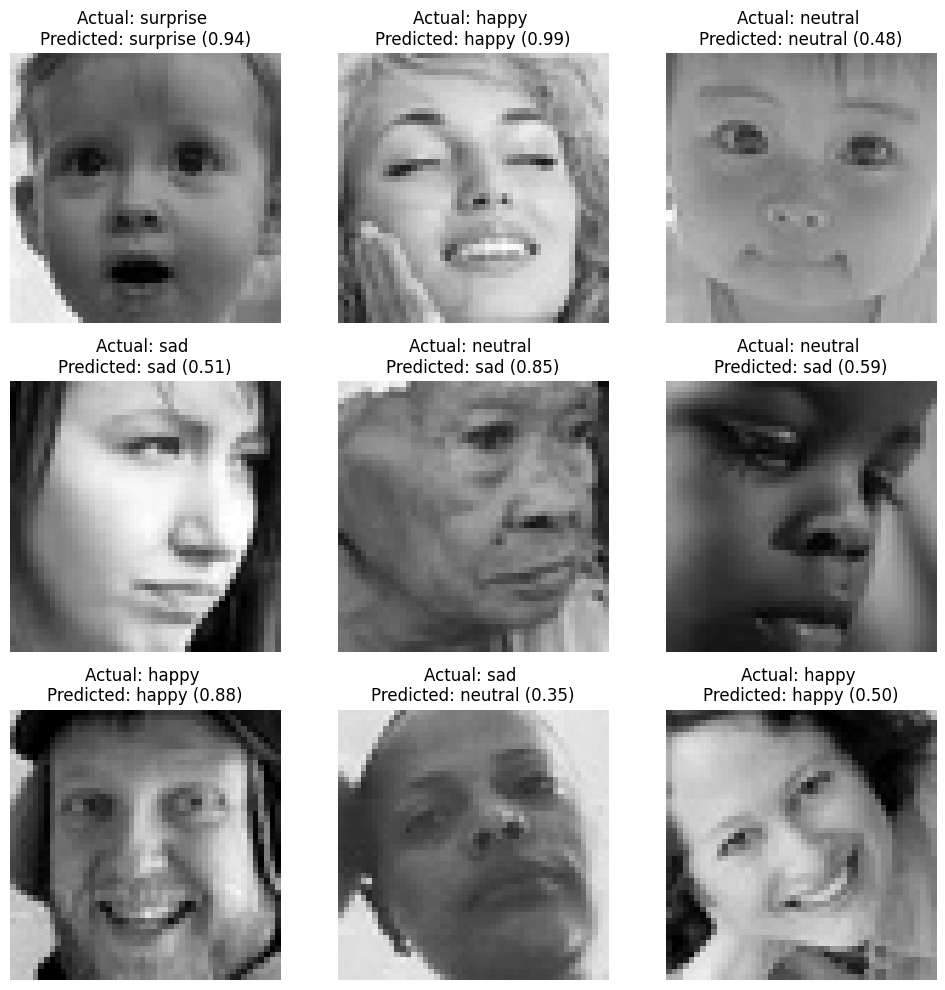

In [172]:
visualizeImages(cnn_model_5_restored,3,'CNN_Model_5')

####Observations
1. Looking at a few images and how the latest CNN model classified them, we see that the model struggles to correctly distinguish sad verses neutral faces. In the last row of images, two actual neutral faces are misclassified as sad.

2. When misclassifications occur, the assigned probability is low implying that the model can be improved to correctly classify these sad and neutral facial images.

### **Compare the various models trained**

In [180]:
#Model comparison
def CompareModels():
  from sklearn.metrics import classification_report

  cnn_model_2_restored = load_model("cnn_model_2.keras")
  vgg_model_4_restored = load_model("vgg_model_4.keras")
  vgg_model_5_restored = load_model("vgg_model_5.keras")
  Resnet_model_6_restored = load_model("Resnet_model_6.keras")
  Resnet_model_7_restored = load_model("Resnet_model_7.keras")
  EfficientNet_model_8_restored = load_model("EfficientNet_model_8.keras")
  EfficientNet_model_9_restored = load_model("EfficientNet_model_9.keras")
  cnn_model_5_restored = load_model("cnn_model_5.keras")

  pred_cnn_model_2 = cnn_model_2_restored.predict(test_images)
  pred_cnn_model_2_labels = np.argmax(pred_cnn_model_2, axis=1)
  pred_vgg_model_4 = vgg_model_4_restored.predict(test_images)
  pred_vgg_model_4_labels = np.argmax(pred_vgg_model_4, axis=1)
  pred_vgg_model_5 = vgg_model_5_restored.predict(test_images)
  pred_vgg_model_5_labels = np.argmax(pred_vgg_model_5, axis=1)
  pred_Resnet_model_6 = Resnet_model_6_restored.predict(test_images)
  pred_Resnet_model_6_labels = np.argmax(pred_Resnet_model_6, axis=1)
  pred_Resnet_model_7 = Resnet_model_7_restored.predict(test_images)
  pred_Resnet_model_7_labels = np.argmax(pred_Resnet_model_7, axis=1)
  pred_EfficientNet_model_8 = EfficientNet_model_8_restored.predict(test_images)
  pred_EfficientNet_model_8_labels = np.argmax(pred_EfficientNet_model_8, axis=1)
  pred_EfficientNet_model_9 = EfficientNet_model_9_restored.predict(test_images)
  pred_EfficientNet_model_9_labels = np.argmax(pred_EfficientNet_model_9, axis=1)
  pred_cnn_model_5 = cnn_model_5_restored.predict(test_images)
  pred_cnn_model_5_labels = np.argmax(pred_cnn_model_5, axis=1)

  actual = y_true

  #Map numeric labels to emotion names
  emotion_names = {0:"happy", 1:"sad", 2:"neutral", 3:"surprise"}
  actual_named = [emotion_names[label] for label in actual]

  reports = {}

  for model_name, (actual, predicted) in {
      "CNN_Model_1": (actual, pred_cnn_model_2_labels),
      "VGG16_Model": (actual, pred_vgg_model_4_labels),
      "Best_VGG16_Model": (actual, pred_vgg_model_5_labels),
      "Resnet_Model": (actual, pred_Resnet_model_6_labels),
      "Best_Resnet_Model": (actual, pred_Resnet_model_7_labels),
      "EfficientNet_Model": (actual, pred_EfficientNet_model_8_labels),
      "Best_EfficientNet_Model": (actual, pred_EfficientNet_model_9_labels),
      "CNN_Model_4": (actual, pred_cnn_model_5_labels)
  }.items():
    predicted_named = [emotion_names[label] for label in predicted]
    reports[model_name] = classification_report(actual_named, predicted_named, output_dict=True)

  data = []
  accuracy_data = []
  #Extract accuracy for the models
  for model_name, report in reports.items():
    accuracy = report["accuracy"]
    accuracy_data.append({
        "Model": model_name,
        "Metric":"Accuracy",
        "Value":accuracy
    })
  #Extract F1 score
  for model_name, report in reports.items():
    for emotion, metrics in report.items():
      if isinstance(metrics, dict):
        data.append({
            "Model": model_name,
            "Emotion": emotion,
            "Precision": metrics['precision'],
            "Recall": metrics['recall'],
            "F1-Score": metrics["f1-score"],
            "Support": metrics['support']
        })

  df = pd.DataFrame(data)
  df_accuracy = pd.DataFrame(accuracy_data)
  #Visualize F1 score comparision
  plt.figure(figsize=(10,6))
  sns.barplot(x="Emotion", y="F1-Score", hue="Model", data=df)
  plt.title("F1-Score Comparison Across models")
  plt.xlabel("Emotion")
  plt.xticks(rotation=45)
  plt.ylabel("F1-Score")
  plt.legend(title="Model F1-Score", bbox_to_anchor=(1.05,1), loc="upper left")
  plt.axhline(y=0.6, color='r', linestyle='--',label='60% F1-Score')
  plt.savefig('f1_Score_Model_Comparison.png', format="png", dpi=300, bbox_inches="tight")
  plt.show()

  #Visualize accuracy comparison
  plt.figure(figsize=(8,4))
  sns.barplot(x="Model", y="Value",  data=df_accuracy, hue="Model")
  plt.title("Accuracy comparison across models")
  plt.xlabel("Model")
  plt.xticks(rotation=90)
  plt.ylabel("Accuracy")
  plt.legend(title="Model Accuracy", bbox_to_anchor=(1.05,0.5), loc="lower left")
  plt.ylim(0,1)
  plt.axhline(y=0.7, color='r', linestyle='--',label='70% Accuracy')
  plt.tight_layout()
  plt.savefig('Acc_Model_Comparison.png', format="png", dpi=300, bbox_inches="tight")
  plt.show()

  df = df.drop(columns=["Support"], errors='ignore')
  print(df)
  print(df_accuracy)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


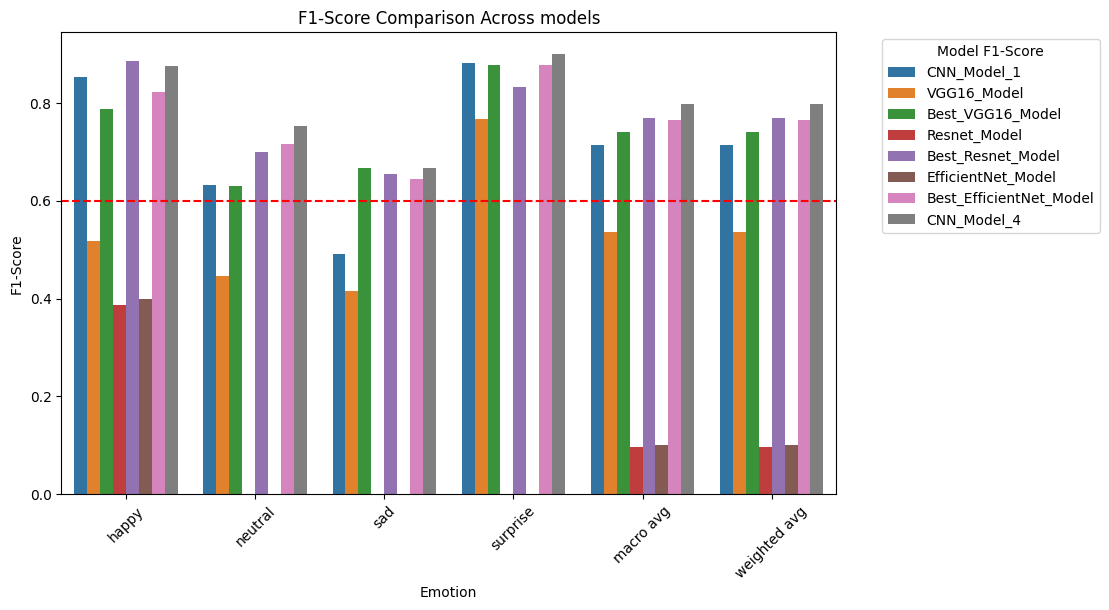

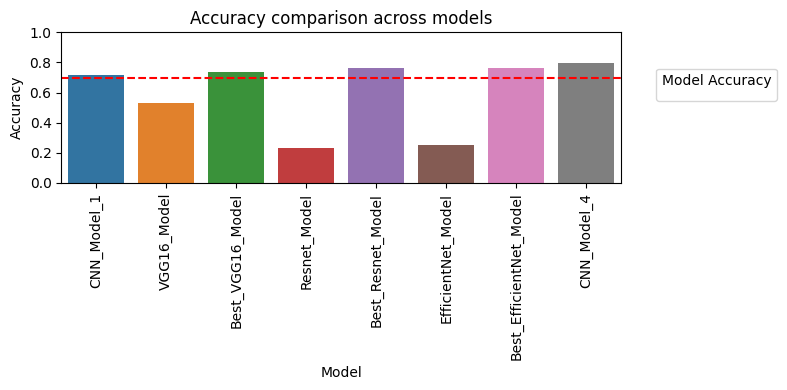

                      Model       Emotion  Precision    Recall  F1-Score
0               CNN_Model_1         happy   0.805556  0.906250  0.852941
1               CNN_Model_1       neutral   0.545455  0.750000  0.631579
2               CNN_Model_1           sad   0.619048  0.406250  0.490566
3               CNN_Model_1      surprise   0.962963  0.812500  0.881356
4               CNN_Model_1     macro avg   0.733255  0.718750  0.714111
5               CNN_Model_1  weighted avg   0.733255  0.718750  0.714111
6               VGG16_Model         happy   0.576923  0.468750  0.517241
7               VGG16_Model       neutral   0.358491  0.593750  0.447059
8               VGG16_Model           sad   0.523810  0.343750  0.415094
9               VGG16_Model      surprise   0.821429  0.718750  0.766667
10              VGG16_Model     macro avg   0.570163  0.531250  0.536515
11              VGG16_Model  weighted avg   0.570163  0.531250  0.536515
12         Best_VGG16_Model         happy   0.76470

In [181]:
CompareModels()

### **Plotting the Confusion Matrix for the chosen final model**

**Observations and Insights:__**
1. The best models are the transfer learning architectures (where we allow weights for the last 4 layers to retrain on our rgb dataset) and the last complex CNN model (CNN_model_4). They both show an f1-score > 60% for all emotion categories and the highest overall model accuracy of ~73%. Both models ran for 7 minutes on GPU. However the CNN model has 7.5 million parameters while the complex transfer learning models has >10 million parameters.

2. The selected model is CNN model 4 which is slightly simpler and yield high f1-scores of > 65% for all classification categories and a model accuracy of 79%.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.68      0.66      0.67        32
           2       0.70      0.81      0.75        32
           3       0.96      0.84      0.90        32

    accuracy                           0.80       128
   macro avg       0.80      0.80      0.80       128
weighted avg       0.80      0.80      0.80       128



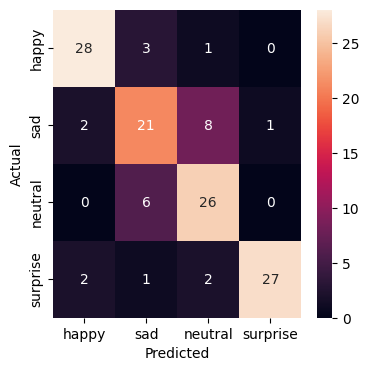

In [175]:
#The confusion matrix from the best model: CNN model 4 but trained on RGB and labeled as model 5
cnn_model_5_restored = load_model("cnn_model_5.keras")
pred_cnn_model_5 = cnn_model_5_restored.predict(test_images)
pred_cnn_model_5 = np.argmax(pred_cnn_model_5 , axis=1)
metrics_score(y_true,pred_cnn_model_5,'CNN_Model_5_Best')

## **Conclusion:____________**

1. We developed several models that take input facial images and classify the emotions displayed. 55% of human interactions is through human expressions. Efficient and accurate models for emotion detection takes us a step further in enhancing AI emotional intelligence with applications in the medical field (understanding patient experience), in the service field (to improve customer experience) and more.
2. The first models build were convolutional neural networks developed here. The models ran in ~4 minutes on GPU with an accuracy of ~70% on test data.
3. Transfer learning models showed low performance in terms of accuracy when the pre-trained weights were fixed. Accuracy was about 25% (matched to random guess approximation). Once these models trained on our data set, they showed better performance of > 70% for overall accuracy in all cases.
4. All models struggle to correctly classify sad and neutral faces. The f1 score for these emotions hover around 45 - 67 % at best. The CNN models using a silu activation function seem to give the best f1-scores
5. Some of the transfer learning models e.g. Efficient Net when trained on our data set (allowing weights to adjust based on our data set), were overfitting. Accuracy on train data was better than on validation data. These models do not generalize well to unseen data.

### **Refined insights**:
**What are the most meaningful insights from the data relevant to the problem?** <br>

1. The training dataset influences model performance significantly. CNN models developed here and trained on the data set outperform transfer learning models when we use fixed weights from the transfer models. Allowing the transfer models to train on our data set increases model perfomance although the penalty is that these complex models require long training times (factor of 2X impact in training time).

2. I did not observe a large impact when we trained with rgb verses grayscale images in terms of model accuracy. The images are grayscale and I recommend training on grayscale images.


### **Comparison of various techniques and their relative performance**:
**- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?**

1. The CNN models developed here achieve high accuracy (~79% on test data and f1-scores of >= 67% on the most challenging emotions (sad and neutral). These models run fast ~4-7 minutes on GPU.

2. The transfer learning architectures need training on our dataset to achieve high accuracy. This requires long training times and compute resources (~9-10 minutes on GPU). They seem to overfit on training data and generalize poorly on unseen data.


### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?



1. The best model to use is the last CNN model. It trains in 7 minutes. Has an accuracy of ~79% and f1-score of 67% for the sad and neutral face category which is the most difficult to classify accurately. This model matches the performance of the best transfer models for both f1-score and accuracy, yet it has fewer trainable parameters.

2. This model can be improved further by:

*   Training on larger data sets
*   Mitigating class imbalance during training and validation
*   Allowing the training to improve over more epochs
*   Hyper parameter tuning to improve accuracy and f1-score
*   Building a more complex CNN with higher accuracy and f1-score. Somehow enhancing differences between sad and neutral faces to make the model more accurate in classifying these emotions that are challenging to distinguish



In [183]:
#save the project file to HTML
!jupyter nbconvert --to html '/content/drive/MyDrive/MachineLearningCourse/CapstoneProject/Facial_Emotion_Detection_Full_Code_Moureen_Kemei_CapStoneProject.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/MachineLearningCourse/CapstoneProject/Facial_Emotion_Detection_Full_Code_Moureen_Kemei_CapStoneProject.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 88 image(s).
[NbConvertApp] Writing 7511514 bytes to /content/drive/MyDrive/MachineLearningCourse/CapstoneProject/Facial_Emotion_Detection_Full_Code_Moureen_Kemei_CapStoneProject.html
